In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Dropout

In [3]:
x_l = np.load('./data/Sign-language-digits-dataset/X.npy')
Y_l = np.load('./data/Sign-language-digits-dataset/Y.npy')

(-0.5, 63.5, 63.5, -0.5)

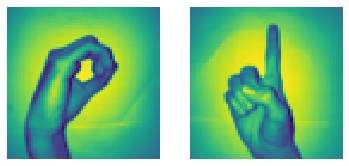

In [4]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [5]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)


X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [6]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(X_train.shape)

(348, 64, 64)


In [10]:
#flatten image data
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_flatten)
X_test = sc.transform(X_test_flatten)

In [14]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [69]:
def create_model(neurons=1,optimizer='rmsprop', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_flatten.shape[1], kernel_initializer=init, activation='linear'))
    model.add(Dropout(0.2))       
    model.add(Dense(units = 1, kernel_initializer= init, activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1)

In [70]:
model

In [71]:
neurons = [1, 5, 10, 15, 20, 25, 30]
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [10, 20, 30]
batches = [15, 20, 30]
param_grid = dict(neurons=neurons,optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)

grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

grid_result = grid.fit(X_train, Y_train)

Epoch 1/10
278/278 [==============================] - 0s 469us/step - loss: 0.3954 - accuracy: 0.7626
Epoch 2/10
278/278 [==============================] - 0s 97us/step - loss: 0.2324 - accuracy: 0.8417
Epoch 3/10
278/278 [==============================] - 0s 125us/step - loss: 0.1917 - accuracy: 0.9209
Epoch 4/10
278/278 [==============================] - 0s 111us/step - loss: 0.2004 - accuracy: 0.8777
Epoch 5/10
278/278 [==============================] - 0s 104us/step - loss: 0.1820 - accuracy: 0.9065
Epoch 6/10
278/278 [==============================] - 0s 97us/step - loss: 0.1667 - accuracy: 0.8885
Epoch 7/10
278/278 [==============================] - 0s 89us/step - loss: 0.1560 - accuracy: 0.8777
Epoch 8/10
278/278 [==============================] - 0s 115us/step - loss: 0.1367 - accuracy: 0.9209
Epoch 9/10
278/278 [==============================] - 0s 127us/step - loss: 0.1533 - accuracy: 0.8921
Epoch 10/10
70/70 [==============================] - 0s 403us/step
Epoch 1/10
278/278

278/278 [==============================] - 0s 96us/step - loss: 0.1518 - accuracy: 0.9209
Epoch 8/10
278/278 [==============================] - 0s 70us/step - loss: 0.1606 - accuracy: 0.9173
Epoch 9/10
278/278 [==============================] - 0s 84us/step - loss: 0.1361 - accuracy: 0.9173
Epoch 10/10
70/70 [==============================] - 0s 438us/step
Epoch 1/10
279/279 [==============================] - 0s 519us/step - loss: 0.5000 - accuracy: 0.7527
Epoch 2/10
279/279 [==============================] - 0s 97us/step - loss: 0.3218 - accuracy: 0.8423
Epoch 3/10
279/279 [==============================] - 0s 86us/step - loss: 0.2359 - accuracy: 0.8853
Epoch 4/10
279/279 [==============================] - 0s 83us/step - loss: 0.2189 - accuracy: 0.8889
Epoch 5/10
279/279 [==============================] - 0s 126us/step - loss: 0.1977 - accuracy: 0.8710
Epoch 6/10
279/279 [==============================] - 0s 103us/step - loss: 0.1843 - accuracy: 0.8996
Epoch 7/10
279/279 [============

278/278 [==============================] - 0s 119us/step - loss: 0.0363 - accuracy: 0.9856
Epoch 4/10
278/278 [==============================] - 0s 102us/step - loss: 0.0170 - accuracy: 0.9928
Epoch 5/10
278/278 [==============================] - 0s 91us/step - loss: 0.0348 - accuracy: 0.9892
Epoch 6/10
278/278 [==============================] - 0s 97us/step - loss: 0.0148 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 95us/step - loss: 0.0129 - accuracy: 0.9964
Epoch 8/10
278/278 [==============================] - 0s 88us/step - loss: 0.0329 - accuracy: 0.9892
Epoch 9/10
278/278 [==============================] - 0s 96us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 369us/step
Epoch 1/10
278/278 [==============================] - 0s 483us/step - loss: 0.9599 - accuracy: 0.7842
Epoch 2/10
278/278 [==============================] - 0s 94us/step - loss: 0.5696 - accuracy: 0.9209
Epoch 3/10
278/278 [============

278/278 [==============================] - 0s 96us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 431us/step
Epoch 1/10
279/279 [==============================] - 0s 577us/step - loss: 0.6893 - accuracy: 0.8746
Epoch 2/10
279/279 [==============================] - 0s 130us/step - loss: 0.1043 - accuracy: 0.9570
Epoch 3/10
279/279 [==============================] - 0s 138us/step - loss: 0.0259 - accuracy: 0.9928
Epoch 4/10
279/279 [==============================] - 0s 124us/step - loss: 0.0136 - accuracy: 0.9964
Epoch 5/10
279/279 [==============================] - 0s 132us/step - loss: 0.1253 - accuracy: 0.9642
Epoch 6/10
279/279 [==============================] - 0s 131us/step - loss: 0.1337 - accuracy: 0.9821
Epoch 7/10
279/279 [==============================] - 0s 170us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 146us/step - loss: 0.1679 - accuracy: 0.9749
Epoch 9/10
279/279 [=======

278/278 [==============================] - 0s 140us/step - loss: 0.1529 - accuracy: 0.9856
Epoch 6/10
278/278 [==============================] - 0s 116us/step - loss: 0.1079 - accuracy: 0.9784
Epoch 7/10
278/278 [==============================] - 0s 113us/step - loss: 0.0098 - accuracy: 0.9964
Epoch 8/10
278/278 [==============================] - 0s 102us/step - loss: 0.0947 - accuracy: 0.9856
Epoch 9/10
278/278 [==============================] - 0s 109us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 371us/step
Epoch 1/10
278/278 [==============================] - 0s 538us/step - loss: 0.8221 - accuracy: 0.8489
Epoch 2/10
278/278 [==============================] - 0s 127us/step - loss: 0.4277 - accuracy: 0.9281
Epoch 3/10
278/278 [==============================] - 0s 139us/step - loss: 0.1179 - accuracy: 0.9748
Epoch 4/10
278/278 [==============================] - 0s 117us/step - loss: 0.0929 - accuracy: 0.9748
Epoch 5/10
278/278 [======

70/70 [==============================] - 0s 490us/step
Epoch 1/10
279/279 [==============================] - 0s 571us/step - loss: 0.4539 - accuracy: 0.8566
Epoch 2/10
279/279 [==============================] - 0s 123us/step - loss: 0.0573 - accuracy: 0.9749
Epoch 3/10
279/279 [==============================] - 0s 119us/step - loss: 0.0286 - accuracy: 0.9892
Epoch 4/10
279/279 [==============================] - 0s 124us/step - loss: 0.1209 - accuracy: 0.9642
Epoch 5/10
279/279 [==============================] - 0s 117us/step - loss: 0.0481 - accuracy: 0.9928
Epoch 6/10
279/279 [==============================] - 0s 115us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 125us/step - loss: 0.0168 - accuracy: 0.9964
Epoch 8/10
279/279 [==============================] - 0s 106us/step - loss: 0.0238 - accuracy: 0.9964
Epoch 9/10
279/279 [==============================] - 0s 115us/step - loss: 0.0794 - accuracy: 0.9785
Epoch 10/10
69/69 [========

278/278 [==============================] - 0s 128us/step - loss: 0.0156 - accuracy: 0.9928
Epoch 7/10
278/278 [==============================] - 0s 148us/step - loss: 0.0621 - accuracy: 0.9820
Epoch 8/10
278/278 [==============================] - 0s 120us/step - loss: 0.0780 - accuracy: 0.9892
Epoch 9/10
278/278 [==============================] - 0s 122us/step - loss: 0.4831 - accuracy: 0.9532
Epoch 10/10
70/70 [==============================] - 0s 428us/step
Epoch 1/10
278/278 [==============================] - 0s 553us/step - loss: 0.7017 - accuracy: 0.8309
Epoch 2/10
278/278 [==============================] - 0s 127us/step - loss: 0.1298 - accuracy: 0.9784
Epoch 3/10
278/278 [==============================] - 0s 126us/step - loss: 0.0599 - accuracy: 0.9748
Epoch 4/10
278/278 [==============================] - 0s 130us/step - loss: 0.0632 - accuracy: 0.9892
Epoch 5/10
278/278 [==============================] - 0s 132us/step - loss: 0.0182 - accuracy: 0.9928
Epoch 6/10
278/278 [======

279/279 [==============================] - 0s 464us/step - loss: 1.3312 - accuracy: 0.8387
Epoch 2/10
279/279 [==============================] - 0s 162us/step - loss: 0.1090 - accuracy: 0.9821
Epoch 3/10
279/279 [==============================] - 0s 124us/step - loss: 0.3222 - accuracy: 0.9749
Epoch 4/10
279/279 [==============================] - 0s 124us/step - loss: 0.0190 - accuracy: 0.9892
Epoch 5/10
279/279 [==============================] - 0s 128us/step - loss: 0.1783 - accuracy: 0.9749
Epoch 6/10
279/279 [==============================] - 0s 118us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 122us/step - loss: 0.2317 - accuracy: 0.9785
Epoch 8/10
279/279 [==============================] - 0s 139us/step - loss: 0.0168 - accuracy: 0.9928
Epoch 9/10
279/279 [==============================] - 0s 117us/step - loss: 0.0268 - accuracy: 0.9892
Epoch 10/10
69/69 [==============================] - 0s 435us/step
Epoch 1/10
279/279 [======

278/278 [==============================] - 0s 135us/step - loss: 0.0672 - accuracy: 0.9856
Epoch 8/10
278/278 [==============================] - 0s 147us/step - loss: 0.0809 - accuracy: 0.9856
Epoch 9/10
278/278 [==============================] - 0s 125us/step - loss: 0.1959 - accuracy: 0.9892
Epoch 10/10
70/70 [==============================] - 0s 488us/step
Epoch 1/10
278/278 [==============================] - 0s 478us/step - loss: 1.1582 - accuracy: 0.8525
Epoch 2/10
278/278 [==============================] - 0s 163us/step - loss: 0.1668 - accuracy: 0.9676
Epoch 3/10
278/278 [==============================] - 0s 145us/step - loss: 0.0937 - accuracy: 0.9856
Epoch 4/10
278/278 [==============================] - 0s 159us/step - loss: 0.2100 - accuracy: 0.9568
Epoch 5/10
278/278 [==============================] - 0s 140us/step - loss: 0.0250 - accuracy: 0.9820
Epoch 6/10
278/278 [==============================] - 0s 136us/step - loss: 0.0348 - accuracy: 0.9820
Epoch 7/10
278/278 [======

279/279 [==============================] - 0s 155us/step - loss: 0.2697 - accuracy: 0.9498
Epoch 3/10
279/279 [==============================] - 0s 158us/step - loss: 0.0616 - accuracy: 0.9785
Epoch 4/10
279/279 [==============================] - 0s 188us/step - loss: 0.0312 - accuracy: 0.9928
Epoch 5/10
279/279 [==============================] - 0s 208us/step - loss: 9.7562e-04 - accuracy: 1.0000
Epoch 6/10
279/279 [==============================] - 0s 184us/step - loss: 8.9809e-04 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 135us/step - loss: 8.9972e-04 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 161us/step - loss: 5.6594e-04 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 136us/step - loss: 3.4649e-04 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 433us/step
Epoch 1/10
279/279 [==============================] - 0s 539us/step - loss: 1.0667 - accuracy: 0.8387
Epoch 

278/278 [==============================] - 0s 113us/step - loss: 0.1959 - accuracy: 0.8705
Epoch 9/10
278/278 [==============================] - 0s 116us/step - loss: 0.1730 - accuracy: 0.8777
Epoch 10/10
70/70 [==============================] - 0s 383us/step
Epoch 1/10
278/278 [==============================] - 0s 504us/step - loss: 0.6319 - accuracy: 0.6871
Epoch 2/10
278/278 [==============================] - 0s 97us/step - loss: 0.4736 - accuracy: 0.8309
Epoch 3/10
278/278 [==============================] - 0s 73us/step - loss: 0.3779 - accuracy: 0.8201
Epoch 4/10
278/278 [==============================] - 0s 82us/step - loss: 0.3189 - accuracy: 0.8525
Epoch 5/10
278/278 [==============================] - 0s 97us/step - loss: 0.2683 - accuracy: 0.8777
Epoch 6/10
278/278 [==============================] - 0s 102us/step - loss: 0.2443 - accuracy: 0.8633
Epoch 7/10
278/278 [==============================] - 0s 121us/step - loss: 0.1795 - accuracy: 0.9137
Epoch 8/10
278/278 [==========

279/279 [==============================] - 0s 102us/step - loss: 0.0730 - accuracy: 0.9857
Epoch 5/10
279/279 [==============================] - 0s 115us/step - loss: 0.0468 - accuracy: 0.9964
Epoch 6/10
279/279 [==============================] - 0s 105us/step - loss: 0.0259 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 100us/step - loss: 0.0157 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 96us/step - loss: 0.0122 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 91us/step - loss: 0.0087 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 419us/step
Epoch 1/10
279/279 [==============================] - 0s 507us/step - loss: 0.3887 - accuracy: 0.8495
Epoch 2/10
279/279 [==============================] - 0s 96us/step - loss: 0.1595 - accuracy: 0.9570
Epoch 3/10
279/279 [==============================] - 0s 96us/step - loss: 0.0952 - accuracy: 0.9785
Epoch 4/10
279/279 [==========

70/70 [==============================] - 0s 470us/step
Epoch 1/10
278/278 [==============================] - 0s 459us/step - loss: 0.3604 - accuracy: 0.8309
Epoch 2/10
278/278 [==============================] - 0s 104us/step - loss: 0.1580 - accuracy: 0.9388
Epoch 3/10
278/278 [==============================] - 0s 116us/step - loss: 0.0859 - accuracy: 0.9748
Epoch 4/10
278/278 [==============================] - 0s 127us/step - loss: 0.0523 - accuracy: 0.9856
Epoch 5/10
278/278 [==============================] - 0s 100us/step - loss: 0.0372 - accuracy: 0.9928
Epoch 6/10
278/278 [==============================] - 0s 115us/step - loss: 0.0174 - accuracy: 0.9964
Epoch 7/10
278/278 [==============================] - 0s 104us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 111us/step - loss: 0.0121 - accuracy: 0.9964
Epoch 9/10
278/278 [==============================] - 0s 111us/step - loss: 0.0198 - accuracy: 0.9928
Epoch 10/10
70/70 [========

279/279 [==============================] - 0s 122us/step - loss: 0.0185 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 128us/step - loss: 0.0149 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 119us/step - loss: 0.0115 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 110us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 386us/step
Epoch 1/10
279/279 [==============================] - 0s 517us/step - loss: 0.4201 - accuracy: 0.8351
Epoch 2/10
279/279 [==============================] - 0s 110us/step - loss: 0.1624 - accuracy: 0.9391
Epoch 3/10
279/279 [==============================] - 0s 104us/step - loss: 0.0955 - accuracy: 0.9606
Epoch 4/10
279/279 [==============================] - 0s 103us/step - loss: 0.0523 - accuracy: 0.9892
Epoch 5/10
279/279 [==============================] - 0s 114us/step - loss: 0.0301 - accuracy: 1.0000
Epoch 6/10
279/279 [======

278/278 [==============================] - 0s 123us/step - loss: 0.1308 - accuracy: 0.9640
Epoch 3/10
278/278 [==============================] - 0s 134us/step - loss: 0.0813 - accuracy: 0.9748
Epoch 4/10
278/278 [==============================] - 0s 129us/step - loss: 0.0435 - accuracy: 0.9892
Epoch 5/10
278/278 [==============================] - 0s 123us/step - loss: 0.0263 - accuracy: 0.9964
Epoch 6/10
278/278 [==============================] - 0s 116us/step - loss: 0.0210 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 119us/step - loss: 0.0228 - accuracy: 0.9928
Epoch 8/10
278/278 [==============================] - 0s 113us/step - loss: 0.0107 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 116us/step - loss: 0.0088 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 422us/step
Epoch 1/10
278/278 [==============================] - 0s 580us/step - loss: 0.4428 - accuracy: 0.8165
Epoch 2/10
278/278 [======

279/279 [==============================] - 0s 167us/step - loss: 0.0071 - accuracy: 0.9964
Epoch 9/10
279/279 [==============================] - 0s 142us/step - loss: 0.0200 - accuracy: 0.9964
Epoch 10/10
69/69 [==============================] - 0s 390us/step
Epoch 1/10
279/279 [==============================] - 0s 513us/step - loss: 0.3218 - accuracy: 0.8710
Epoch 2/10
279/279 [==============================] - 0s 155us/step - loss: 0.1048 - accuracy: 0.9570
Epoch 3/10
279/279 [==============================] - 0s 156us/step - loss: 0.0613 - accuracy: 0.9892
Epoch 4/10
279/279 [==============================] - 0s 127us/step - loss: 0.0403 - accuracy: 0.9892
Epoch 5/10
279/279 [==============================] - 0s 118us/step - loss: 0.0163 - accuracy: 1.0000
Epoch 6/10
279/279 [==============================] - 0s 117us/step - loss: 0.0202 - accuracy: 0.9964
Epoch 7/10
279/279 [==============================] - 0s 140us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 8/10
279/279 [======

278/278 [==============================] - 0s 149us/step - loss: 0.0311 - accuracy: 0.9928
Epoch 5/10
278/278 [==============================] - 0s 139us/step - loss: 0.0322 - accuracy: 0.9928
Epoch 6/10
278/278 [==============================] - 0s 143us/step - loss: 0.0356 - accuracy: 0.9856
Epoch 7/10
278/278 [==============================] - 0s 128us/step - loss: 0.0198 - accuracy: 0.9928
Epoch 8/10
278/278 [==============================] - 0s 161us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 136us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 555us/step
Epoch 1/10
278/278 [==============================] - 0s 504us/step - loss: 0.3201 - accuracy: 0.8921
Epoch 2/10
278/278 [==============================] - 0s 122us/step - loss: 0.0917 - accuracy: 0.9676
Epoch 3/10
278/278 [==============================] - 0s 158us/step - loss: 0.0451 - accuracy: 0.9928
Epoch 4/10
278/278 [======

69/69 [==============================] - 0s 776us/step
Epoch 1/10
279/279 [==============================] - 0s 609us/step - loss: 0.3903 - accuracy: 0.8100
Epoch 2/10
279/279 [==============================] - 0s 140us/step - loss: 0.1185 - accuracy: 0.9498
Epoch 3/10
279/279 [==============================] - 0s 137us/step - loss: 0.0652 - accuracy: 0.9749
Epoch 4/10
279/279 [==============================] - 0s 122us/step - loss: 0.0354 - accuracy: 0.9928
Epoch 5/10
279/279 [==============================] - 0s 142us/step - loss: 0.0190 - accuracy: 1.0000
Epoch 6/10
279/279 [==============================] - 0s 148us/step - loss: 0.0194 - accuracy: 0.9928
Epoch 7/10
279/279 [==============================] - 0s 158us/step - loss: 0.0131 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 139us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 148us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 10/10
69/69 [========

Epoch 6/10
278/278 [==============================] - 0s 157us/step - loss: 0.0107 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 134us/step - loss: 0.0089 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 136us/step - loss: 0.0223 - accuracy: 0.9892
Epoch 9/10
278/278 [==============================] - 0s 129us/step - loss: 0.0848 - accuracy: 0.9676
Epoch 10/10
70/70 [==============================] - 0s 395us/step
Epoch 1/10
278/278 [==============================] - 0s 602us/step - loss: 0.3681 - accuracy: 0.8489
Epoch 2/10
278/278 [==============================] - 0s 155us/step - loss: 0.1058 - accuracy: 0.9676
Epoch 3/10
278/278 [==============================] - 0s 162us/step - loss: 0.0536 - accuracy: 0.9892
Epoch 4/10
278/278 [==============================] - 0s 155us/step - loss: 0.0220 - accuracy: 0.9964
Epoch 5/10
278/278 [==============================] - 0s 160us/step - loss: 0.0146 - accuracy: 1.0000
Epoch 6/10
278/

279/279 [==============================] - 0s 80us/step - loss: 0.4347 - accuracy: 0.8208
Epoch 3/10
279/279 [==============================] - 0s 90us/step - loss: 0.3365 - accuracy: 0.8530
Epoch 4/10
279/279 [==============================] - 0s 86us/step - loss: 0.2873 - accuracy: 0.8459
Epoch 5/10
279/279 [==============================] - 0s 89us/step - loss: 0.2332 - accuracy: 0.8746
Epoch 6/10
279/279 [==============================] - 0s 79us/step - loss: 0.2149 - accuracy: 0.8530
Epoch 7/10
279/279 [==============================] - 0s 91us/step - loss: 0.1980 - accuracy: 0.8602
Epoch 8/10
279/279 [==============================] - 0s 78us/step - loss: 0.1712 - accuracy: 0.9068
Epoch 9/10
279/279 [==============================] - 0s 93us/step - loss: 0.1661 - accuracy: 0.8996
Epoch 10/10
69/69 [==============================] - ETA:  - 0s 402us/step
Epoch 1/10
278/278 [==============================] - 0s 505us/step - loss: 0.6755 - accuracy: 0.7014
Epoch 2/10
278/278 [======

Epoch 9/10
278/278 [==============================] - 0s 144us/step - loss: 0.0162 - accuracy: 0.9964
Epoch 10/10
70/70 [==============================] - 0s 453us/step
Epoch 1/10
278/278 [==============================] - 0s 463us/step - loss: 0.4182 - accuracy: 0.8381
Epoch 2/10
278/278 [==============================] - 0s 112us/step - loss: 0.1755 - accuracy: 0.9604
Epoch 3/10
278/278 [==============================] - 0s 109us/step - loss: 0.0958 - accuracy: 0.9712
Epoch 4/10
278/278 [==============================] - 0s 108us/step - loss: 0.0635 - accuracy: 0.9892
Epoch 5/10
278/278 [==============================] - 0s 105us/step - loss: 0.0374 - accuracy: 0.9964
Epoch 6/10
278/278 [==============================] - 0s 113us/step - loss: 0.0225 - accuracy: 0.9964
Epoch 7/10
278/278 [==============================] - 0s 97us/step - loss: 0.0159 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 98us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 9/10
278/27

279/279 [==============================] - 0s 106us/step - loss: 0.0547 - accuracy: 0.9928
Epoch 6/10
279/279 [==============================] - 0s 98us/step - loss: 0.0391 - accuracy: 0.9928
Epoch 7/10
279/279 [==============================] - 0s 117us/step - loss: 0.0269 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 103us/step - loss: 0.0184 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 110us/step - loss: 0.0175 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 372us/step
Epoch 1/10
278/278 [==============================] - 0s 499us/step - loss: 0.3854 - accuracy: 0.8489
Epoch 2/10
278/278 [==============================] - 0s 100us/step - loss: 0.1368 - accuracy: 0.9532
Epoch 3/10
278/278 [==============================] - 0s 119us/step - loss: 0.0858 - accuracy: 0.9748
Epoch 4/10
278/278 [==============================] - 0s 103us/step - loss: 0.0538 - accuracy: 0.9856
Epoch 5/10
278/278 [=======

278/278 [==============================] - 0s 529us/step - loss: 0.4433 - accuracy: 0.8705
Epoch 2/10
278/278 [==============================] - 0s 135us/step - loss: 0.1502 - accuracy: 0.9604
Epoch 3/10
278/278 [==============================] - 0s 104us/step - loss: 0.0662 - accuracy: 0.9856
Epoch 4/10
278/278 [==============================] - 0s 113us/step - loss: 0.0345 - accuracy: 1.0000
Epoch 5/10
278/278 [==============================] - 0s 120us/step - loss: 0.0235 - accuracy: 1.0000
Epoch 6/10
278/278 [==============================] - 0s 114us/step - loss: 0.0126 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 115us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 122us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 114us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 398us/step
Epoch 1/10
279/279 [======

279/279 [==============================] - 0s 119us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 119us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 122us/step - loss: 0.0142 - accuracy: 0.9928
Epoch 10/10
69/69 [==============================] - 0s 418us/step
Epoch 1/10
278/278 [==============================] - 0s 521us/step - loss: 0.3726 - accuracy: 0.8597
Epoch 2/10
278/278 [==============================] - 0s 112us/step - loss: 0.1214 - accuracy: 0.9568
Epoch 3/10
278/278 [==============================] - 0s 289us/step - loss: 0.0703 - accuracy: 0.9748
Epoch 4/10
278/278 [==============================] - 0s 146us/step - loss: 0.0341 - accuracy: 0.9892
Epoch 5/10
278/278 [==============================] - 0s 124us/step - loss: 0.0156 - accuracy: 1.0000
Epoch 6/10
278/278 [==============================] - 0s 172us/step - loss: 0.0120 - accuracy: 1.0000
Epoch 7/10
278/278 [======

Epoch 3/10
278/278 [==============================] - 0s 125us/step - loss: 0.0491 - accuracy: 0.9928
Epoch 4/10
278/278 [==============================] - 0s 121us/step - loss: 0.0321 - accuracy: 0.9928
Epoch 5/10
278/278 [==============================] - 0s 110us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 6/10
278/278 [==============================] - 0s 119us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 115us/step - loss: 0.0285 - accuracy: 0.9928
Epoch 8/10
278/278 [==============================] - 0s 110us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 116us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 512us/step
Epoch 1/10
279/279 [==============================] - 0s 533us/step - loss: 0.3690 - accuracy: 0.8351
Epoch 2/10
279/279 [==============================] - 0s 138us/step - loss: 0.1116 - accuracy: 0.9570
Epoch 3/10
279/

279/279 [==============================] - 0s 167us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 450us/step
Epoch 1/10
278/278 [==============================] - 0s 533us/step - loss: 0.3076 - accuracy: 0.8813
Epoch 2/10
278/278 [==============================] - 0s 136us/step - loss: 0.1124 - accuracy: 0.9568
Epoch 3/10
278/278 [==============================] - 0s 297us/step - loss: 0.0489 - accuracy: 0.9856
Epoch 4/10
278/278 [==============================] - 0s 213us/step - loss: 0.0909 - accuracy: 0.9856
Epoch 5/10
278/278 [==============================] - 0s 249us/step - loss: 0.0345 - accuracy: 0.9892
Epoch 6/10
278/278 [==============================] - 0s 222us/step - loss: 0.0203 - accuracy: 0.9928
Epoch 7/10
278/278 [==============================] - 0s 251us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 206us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 9/10
278/278 [======

278/278 [==============================] - 0s 159us/step - loss: 0.0347 - accuracy: 0.9892
Epoch 6/10
278/278 [==============================] - 0s 150us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 150us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 199us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 195us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 421us/step
Epoch 1/10
279/279 [==============================] - 0s 548us/step - loss: 0.3570 - accuracy: 0.8244
Epoch 2/10
279/279 [==============================] - 0s 138us/step - loss: 0.0775 - accuracy: 0.9749
Epoch 3/10
279/279 [==============================] - 0s 142us/step - loss: 0.0497 - accuracy: 0.9857
Epoch 4/10
279/279 [==============================] - 0s 144us/step - loss: 0.0226 - accuracy: 1.0000
Epoch 5/10
279/279 [======

69/69 [==============================] - 0s 511us/step
Epoch 1/10
278/278 [==============================] - 0s 564us/step - loss: 0.3867 - accuracy: 0.8201
Epoch 2/10
278/278 [==============================] - 0s 136us/step - loss: 0.0933 - accuracy: 0.9676
Epoch 3/10
278/278 [==============================] - 0s 148us/step - loss: 0.0618 - accuracy: 0.9820
Epoch 4/10
278/278 [==============================] - 0s 139us/step - loss: 0.0312 - accuracy: 0.9964
Epoch 5/10
278/278 [==============================] - 0s 146us/step - loss: 0.0179 - accuracy: 1.0000
Epoch 6/10
278/278 [==============================] - 0s 135us/step - loss: 0.0150 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 151us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 146us/step - loss: 0.0076 - accuracy: 0.9964
Epoch 9/10
278/278 [==============================] - 0s 133us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 10/10
70/70 [========

278/278 [==============================] - 0s 75us/step - loss: 0.1900 - accuracy: 0.8849
Epoch 8/20
278/278 [==============================] - 0s 79us/step - loss: 0.1262 - accuracy: 0.9137
Epoch 9/20
278/278 [==============================] - 0s 98us/step - loss: 0.1481 - accuracy: 0.8849
Epoch 10/20
278/278 [==============================] - 0s 75us/step - loss: 0.1526 - accuracy: 0.8813
Epoch 11/20
278/278 [==============================] - 0s 77us/step - loss: 0.1819 - accuracy: 0.9353
Epoch 12/20
278/278 [==============================] - 0s 85us/step - loss: 0.1565 - accuracy: 0.8777
Epoch 13/20
278/278 [==============================] - 0s 74us/step - loss: 0.1477 - accuracy: 0.8525
Epoch 14/20
278/278 [==============================] - 0s 88us/step - loss: 0.1474 - accuracy: 0.9065
Epoch 15/20
278/278 [==============================] - 0s 77us/step - loss: 0.1424 - accuracy: 0.8921
Epoch 16/20
278/278 [==============================] - 0s 105us/step - loss: 0.1799 - accuracy: 

278/278 [==============================] - 0s 87us/step - loss: 0.1416 - accuracy: 0.9137
Epoch 6/20
278/278 [==============================] - 0s 93us/step - loss: 0.2002 - accuracy: 0.8741
Epoch 7/20
278/278 [==============================] - 0s 84us/step - loss: 0.1512 - accuracy: 0.9137
Epoch 8/20
278/278 [==============================] - 0s 85us/step - loss: 0.1285 - accuracy: 0.9173
Epoch 9/20
278/278 [==============================] - 0s 84us/step - loss: 0.1517 - accuracy: 0.8885
Epoch 10/20
278/278 [==============================] - 0s 76us/step - loss: 0.1279 - accuracy: 0.8957
Epoch 11/20
278/278 [==============================] - 0s 81us/step - loss: 0.1319 - accuracy: 0.8921
Epoch 12/20
278/278 [==============================] - 0s 231us/step - loss: 0.1194 - accuracy: 0.9101
Epoch 13/20
278/278 [==============================] - 0s 140us/step - loss: 0.1042 - accuracy: 0.9317
Epoch 14/20
278/278 [==============================] - 0s 93us/step - loss: 0.1461 - accuracy: 0

279/279 [==============================] - 0s 85us/step - loss: 0.2385 - accuracy: 0.8889
Epoch 4/20
279/279 [==============================] - 0s 80us/step - loss: 0.1831 - accuracy: 0.9176
Epoch 5/20
279/279 [==============================] - 0s 92us/step - loss: 0.2000 - accuracy: 0.8817
Epoch 6/20
279/279 [==============================] - 0s 82us/step - loss: 0.1484 - accuracy: 0.9140
Epoch 7/20
279/279 [==============================] - 0s 78us/step - loss: 0.1733 - accuracy: 0.8996
Epoch 8/20
279/279 [==============================] - 0s 74us/step - loss: 0.1617 - accuracy: 0.9032
Epoch 9/20
279/279 [==============================] - 0s 94us/step - loss: 0.1424 - accuracy: 0.9068
Epoch 10/20
279/279 [==============================] - 0s 83us/step - loss: 0.1566 - accuracy: 0.8817
Epoch 11/20
279/279 [==============================] - 0s 85us/step - loss: 0.1495 - accuracy: 0.9104
Epoch 12/20
279/279 [==============================] - 0s 77us/step - loss: 0.1701 - accuracy: 0.903

279/279 [==============================] - 0s 441us/step - loss: 0.3463 - accuracy: 0.8746
Epoch 2/20
279/279 [==============================] - 0s 105us/step - loss: 0.1079 - accuracy: 0.9713
Epoch 3/20
279/279 [==============================] - 0s 84us/step - loss: 0.0974 - accuracy: 0.9821
Epoch 4/20
279/279 [==============================] - 0s 105us/step - loss: 0.0441 - accuracy: 0.9892
Epoch 5/20
279/279 [==============================] - 0s 90us/step - loss: 0.0252 - accuracy: 0.9964
Epoch 6/20
279/279 [==============================] - 0s 97us/step - loss: 0.0317 - accuracy: 0.9964
Epoch 7/20
279/279 [==============================] - 0s 92us/step - loss: 0.0135 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 89us/step - loss: 0.0439 - accuracy: 0.9821
Epoch 9/20
279/279 [==============================] - 0s 94us/step - loss: 0.0151 - accuracy: 0.9928
Epoch 10/20
279/279 [==============================] - 0s 90us/step - loss: 0.0043 - accuracy: 1.00

278/278 [==============================] - 0s 97us/step - loss: 0.0093 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 363us/step
Epoch 1/20
278/278 [==============================] - 0s 513us/step - loss: 0.7742 - accuracy: 0.8058
Epoch 2/20
278/278 [==============================] - 0s 98us/step - loss: 0.1821 - accuracy: 0.9496
Epoch 3/20
278/278 [==============================] - 0s 92us/step - loss: 0.0493 - accuracy: 0.9784
Epoch 4/20
278/278 [==============================] - 0s 110us/step - loss: 0.0282 - accuracy: 0.9964
Epoch 5/20
278/278 [==============================] - 0s 104us/step - loss: 0.0113 - accuracy: 1.0000
Epoch 6/20
278/278 [==============================] - 0s 103us/step - loss: 0.0182 - accuracy: 0.9856
Epoch 7/20
278/278 [==============================] - 0s 88us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 98us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 9/20
278/278 [===========

278/278 [==============================] - 0s 111us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 105us/step - loss: 4.2152e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 96us/step - loss: 0.0722 - accuracy: 0.9964
Epoch 20/20
70/70 [==============================] - 0s 370us/step
Epoch 1/20
278/278 [==============================] - 0s 458us/step - loss: 0.6696 - accuracy: 0.8561
Epoch 2/20
278/278 [==============================] - 0s 108us/step - loss: 0.1420 - accuracy: 0.9532
Epoch 3/20
278/278 [==============================] - 0s 102us/step - loss: 0.0991 - accuracy: 0.9712
Epoch 4/20
278/278 [==============================] - 0s 99us/step - loss: 0.1068 - accuracy: 0.9820
Epoch 5/20
278/278 [==============================] - 0s 106us/step - loss: 0.0675 - accuracy: 0.9856
Epoch 6/20
278/278 [==============================] - 0s 100us/step - loss: 0.0664 - accuracy: 0.9820
Epoch 7/20
278/278 [==

279/279 [==============================] - 0s 103us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 94us/step - loss: 4.6276e-04 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 102us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 104us/step - loss: 0.0419 - accuracy: 0.9964
Epoch 18/20
279/279 [==============================] - 0s 98us/step - loss: 6.3106e-04 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 99us/step - loss: 9.0440e-05 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 403us/step
Epoch 1/20
278/278 [==============================] - 0s 511us/step - loss: 0.3454 - accuracy: 0.8957
Epoch 2/20
278/278 [==============================] - 0s 100us/step - loss: 0.0927 - accuracy: 0.9676
Epoch 3/20
278/278 [==============================] - 0s 101us/step - loss: 0.0355 - accuracy: 0.9820
Epoch 4/20
2

279/279 [==============================] - 0s 114us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 114us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 105us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 106us/step - loss: 9.7676e-04 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 108us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 95us/step - loss: 5.0246e-04 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 97us/step - loss: 3.3765e-04 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 113us/step - loss: 8.5266e-04 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 101us/step - loss: 3.6878e-04 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 415us/step


278/278 [==============================] - 0s 106us/step - loss: 1.5571e-04 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 116us/step - loss: 0.0921 - accuracy: 0.9748
Epoch 10/20
278/278 [==============================] - 0s 96us/step - loss: 0.0077 - accuracy: 0.9964
Epoch 11/20
278/278 [==============================] - 0s 106us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 116us/step - loss: 0.0557 - accuracy: 0.9928
Epoch 13/20
278/278 [==============================] - 0s 109us/step - loss: 0.0303 - accuracy: 0.9856
Epoch 14/20
278/278 [==============================] - 0s 99us/step - loss: 0.0275 - accuracy: 0.9928
Epoch 15/20
278/278 [==============================] - 0s 104us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 107us/step - loss: 0.0253 - accuracy: 0.9892
Epoch 17/20
278/278 [==============================] - 0s 102us/step - loss: 9.1859e

278/278 [==============================] - 0s 117us/step - loss: 0.0418 - accuracy: 0.9856
Epoch 6/20
278/278 [==============================] - 0s 111us/step - loss: 0.0241 - accuracy: 0.9892
Epoch 7/20
278/278 [==============================] - 0s 118us/step - loss: 0.0111 - accuracy: 0.9964
Epoch 8/20
278/278 [==============================] - 0s 110us/step - loss: 8.2496e-04 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 123us/step - loss: 9.8624e-04 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 120us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 113us/step - loss: 4.5720e-04 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 106us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 113us/step - loss: 3.2687e-04 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 113us/step - lo

278/278 [==============================] - 0s 486us/step - loss: 1.2528 - accuracy: 0.8309
Epoch 2/20
278/278 [==============================] - 0s 117us/step - loss: 0.4317 - accuracy: 0.9353
Epoch 3/20
278/278 [==============================] - 0s 116us/step - loss: 0.2606 - accuracy: 0.9676
Epoch 4/20
278/278 [==============================] - 0s 119us/step - loss: 0.2412 - accuracy: 0.9568
Epoch 5/20
278/278 [==============================] - 0s 110us/step - loss: 0.1902 - accuracy: 0.9748
Epoch 6/20
278/278 [==============================] - 0s 110us/step - loss: 0.0062 - accuracy: 0.9964
Epoch 7/20
278/278 [==============================] - 0s 120us/step - loss: 0.1000 - accuracy: 0.9820
Epoch 8/20
278/278 [==============================] - 0s 111us/step - loss: 0.0191 - accuracy: 0.9964
Epoch 9/20
278/278 [==============================] - 0s 113us/step - loss: 0.2437 - accuracy: 0.9892
Epoch 10/20
278/278 [==============================] - 0s 119us/step - loss: 0.0203 - accurac

279/279 [==============================] - 0s 169us/step - loss: 0.0682 - accuracy: 0.9892
Epoch 18/20
279/279 [==============================] - 0s 178us/step - loss: 0.0063 - accuracy: 0.9964
Epoch 19/20
279/279 [==============================] - 0s 116us/step - loss: 0.0404 - accuracy: 0.9964
Epoch 20/20
69/69 [==============================] - 0s 404us/step
Epoch 1/20
279/279 [==============================] - 0s 484us/step - loss: 0.9267 - accuracy: 0.8674
Epoch 2/20
279/279 [==============================] - 0s 115us/step - loss: 0.0650 - accuracy: 0.9749
Epoch 3/20
279/279 [==============================] - 0s 110us/step - loss: 0.3835 - accuracy: 0.9606
Epoch 4/20
279/279 [==============================] - 0s 117us/step - loss: 0.4073 - accuracy: 0.9749
Epoch 5/20
279/279 [==============================] - 0s 110us/step - loss: 0.0402 - accuracy: 0.9821
Epoch 6/20
279/279 [==============================] - 0s 116us/step - loss: 0.0040 - accuracy: 0.9964
Epoch 7/20
279/279 [====

278/278 [==============================] - 0s 114us/step - loss: 0.0071 - accuracy: 0.9964
Epoch 15/20
278/278 [==============================] - 0s 124us/step - loss: 0.0175 - accuracy: 0.9928
Epoch 16/20
278/278 [==============================] - 0s 122us/step - loss: 0.0081 - accuracy: 0.9964
Epoch 17/20
278/278 [==============================] - 0s 115us/step - loss: 0.1060 - accuracy: 0.9892
Epoch 18/20
278/278 [==============================] - 0s 115us/step - loss: 0.1036 - accuracy: 0.9856
Epoch 19/20
278/278 [==============================] - 0s 116us/step - loss: 0.0631 - accuracy: 0.9784
Epoch 20/20
70/70 [==============================] - 0s 397us/step
Epoch 1/20
279/279 [==============================] - 0s 525us/step - loss: 0.9411 - accuracy: 0.8351
Epoch 2/20
279/279 [==============================] - 0s 121us/step - loss: 0.1235 - accuracy: 0.9749
Epoch 3/20
279/279 [==============================] - 0s 113us/step - loss: 0.0162 - accuracy: 0.9964
Epoch 4/20
279/279 [=

278/278 [==============================] - 0s 126us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 132us/step - loss: 4.1392e-04 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 127us/step - loss: 0.1332 - accuracy: 0.9820
Epoch 14/20
278/278 [==============================] - 0s 121us/step - loss: 6.4238e-04 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 127us/step - loss: 7.1026e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 129us/step - loss: 6.7868e-05 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 125us/step - loss: 0.0508 - accuracy: 0.9892
Epoch 18/20
278/278 [==============================] - 0s 126us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 120us/step - loss: 0.0861 - accuracy: 0.9892
Epoch 20/20
70/70 [==============================] - 0s 406us/step
Ep

Epoch 8/20
278/278 [==============================] - 0s 122us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 128us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 133us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 131us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 130us/step - loss: 0.0224 - accuracy: 0.9928
Epoch 13/20
278/278 [==============================] - 0s 135us/step - loss: 0.0074 - accuracy: 0.9964
Epoch 14/20
278/278 [==============================] - 0s 134us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 155us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 149us/step - loss: 8.9343e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 136us/step - 

279/279 [==============================] - 0s 137us/step - loss: 0.0072 - accuracy: 0.9964
Epoch 5/20
279/279 [==============================] - 0s 153us/step - loss: 0.0106 - accuracy: 0.9964
Epoch 6/20
279/279 [==============================] - 0s 127us/step - loss: 0.0217 - accuracy: 0.9892
Epoch 7/20
279/279 [==============================] - 0s 145us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 134us/step - loss: 8.4929e-04 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 132us/step - loss: 3.9487e-04 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 130us/step - loss: 4.3150e-04 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 131us/step - loss: 2.6992e-04 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 137us/step - loss: 3.7223e-04 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 127us/step -

70/70 [==============================] - 0s 383us/step
Epoch 1/20
279/279 [==============================] - 0s 491us/step - loss: 1.2386 - accuracy: 0.8638
Epoch 2/20
279/279 [==============================] - 0s 118us/step - loss: 0.1990 - accuracy: 0.9355
Epoch 3/20
279/279 [==============================] - 0s 131us/step - loss: 0.1768 - accuracy: 0.9857
Epoch 4/20
279/279 [==============================] - 0s 130us/step - loss: 0.1243 - accuracy: 0.9785
Epoch 5/20
279/279 [==============================] - 0s 134us/step - loss: 0.3622 - accuracy: 0.9785
Epoch 6/20
279/279 [==============================] - 0s 136us/step - loss: 0.0107 - accuracy: 0.9964
Epoch 7/20
279/279 [==============================] - 0s 122us/step - loss: 7.1113e-04 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 136us/step - loss: 0.1915 - accuracy: 0.9857
Epoch 9/20
279/279 [==============================] - 0s 122us/step - loss: 0.0230 - accuracy: 0.9964
Epoch 10/20
279/279 [==

278/278 [==============================] - 0s 138us/step - loss: 6.7357e-05 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 137us/step - loss: 1.6599e-05 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 139us/step - loss: 3.1534e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 554us/step
Epoch 1/20
278/278 [==============================] - 0s 556us/step - loss: 0.6201 - accuracy: 0.8273
Epoch 2/20
278/278 [==============================] - 0s 156us/step - loss: 0.1322 - accuracy: 0.9748
Epoch 3/20
278/278 [==============================] - 0s 147us/step - loss: 0.0233 - accuracy: 0.9892
Epoch 4/20
278/278 [==============================] - 0s 154us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5/20
278/278 [==============================] - 0s 153us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 6/20
278/278 [==============================] - 0s 145us/step - loss: 7.5152e-04 - accuracy: 1.0000
Epoch 7/

278/278 [==============================] - 0s 64us/step - loss: 0.1304 - accuracy: 0.8885
Epoch 14/20
278/278 [==============================] - 0s 70us/step - loss: 0.1388 - accuracy: 0.8921
Epoch 15/20
278/278 [==============================] - 0s 63us/step - loss: 0.1211 - accuracy: 0.9065
Epoch 16/20
278/278 [==============================] - 0s 61us/step - loss: 0.1651 - accuracy: 0.9101
Epoch 17/20
278/278 [==============================] - 0s 63us/step - loss: 0.1485 - accuracy: 0.8993
Epoch 18/20
278/278 [==============================] - 0s 65us/step - loss: 0.1267 - accuracy: 0.9101
Epoch 19/20
278/278 [==============================] - 0s 69us/step - loss: 0.1256 - accuracy: 0.9101
Epoch 20/20
70/70 [==============================] - 0s 545us/step
Epoch 1/20
278/278 [==============================] - 0s 495us/step - loss: 0.6487 - accuracy: 0.7086
Epoch 2/20
278/278 [==============================] - 0s 75us/step - loss: 0.4975 - accuracy: 0.8237
Epoch 3/20
278/278 [========

279/279 [==============================] - 0s 97us/step - loss: 0.1645 - accuracy: 0.8781
Epoch 12/20
279/279 [==============================] - 0s 84us/step - loss: 0.1434 - accuracy: 0.8961
Epoch 13/20
279/279 [==============================] - 0s 78us/step - loss: 0.1276 - accuracy: 0.9176
Epoch 14/20
279/279 [==============================] - 0s 74us/step - loss: 0.1276 - accuracy: 0.9032
Epoch 15/20
279/279 [==============================] - 0s 89us/step - loss: 0.1572 - accuracy: 0.8961
Epoch 16/20
279/279 [==============================] - 0s 90us/step - loss: 0.1469 - accuracy: 0.9032
Epoch 17/20
279/279 [==============================] - 0s 102us/step - loss: 0.1609 - accuracy: 0.8746
Epoch 18/20
279/279 [==============================] - 0s 87us/step - loss: 0.1580 - accuracy: 0.8781
Epoch 19/20
279/279 [==============================] - 0s 94us/step - loss: 0.1350 - accuracy: 0.9104
Epoch 20/20
69/69 [==============================] - 0s 504us/step
Epoch 1/20
278/278 [======

279/279 [==============================] - 0s 85us/step - loss: 0.1926 - accuracy: 0.8889
Epoch 10/20
279/279 [==============================] - 0s 87us/step - loss: 0.1824 - accuracy: 0.8889
Epoch 11/20
279/279 [==============================] - 0s 79us/step - loss: 0.1951 - accuracy: 0.8746
Epoch 12/20
279/279 [==============================] - 0s 87us/step - loss: 0.1591 - accuracy: 0.9176
Epoch 13/20
279/279 [==============================] - 0s 80us/step - loss: 0.1708 - accuracy: 0.8889
Epoch 14/20
279/279 [==============================] - 0s 88us/step - loss: 0.1204 - accuracy: 0.9176
Epoch 15/20
279/279 [==============================] - 0s 81us/step - loss: 0.1511 - accuracy: 0.8817
Epoch 16/20
279/279 [==============================] - 0s 100us/step - loss: 0.1719 - accuracy: 0.8961
Epoch 17/20
279/279 [==============================] - 0s 81us/step - loss: 0.1279 - accuracy: 0.9140
Epoch 18/20
279/279 [==============================] - 0s 86us/step - loss: 0.1444 - accuracy

278/278 [==============================] - 0s 87us/step - loss: 0.0180 - accuracy: 0.9964
Epoch 8/20
278/278 [==============================] - 0s 88us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 100us/step - loss: 0.0124 - accuracy: 0.9964
Epoch 10/20
278/278 [==============================] - 0s 95us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 91us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 110us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 95us/step - loss: 0.0121 - accuracy: 0.9964
Epoch 14/20
278/278 [==============================] - 0s 94us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 88us/step - loss: 0.0066 - accuracy: 0.9964
Epoch 16/20
278/278 [==============================] - 0s 99us/step - loss: 0.0034 - accuracy:

278/278 [==============================] - 0s 104us/step - loss: 0.0681 - accuracy: 0.9784
Epoch 6/20
278/278 [==============================] - 0s 98us/step - loss: 0.0452 - accuracy: 0.9892
Epoch 7/20
278/278 [==============================] - 0s 96us/step - loss: 0.0324 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 93us/step - loss: 0.0319 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 90us/step - loss: 0.0196 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 102us/step - loss: 0.0136 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 94us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 99us/step - loss: 0.0131 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 86us/step - loss: 0.0153 - accuracy: 0.9964
Epoch 14/20
278/278 [==============================] - 0s 100us/step - loss: 0.0145 - accuracy: 

278/278 [==============================] - 0s 104us/step - loss: 0.0767 - accuracy: 0.9784
Epoch 4/20
278/278 [==============================] - 0s 92us/step - loss: 0.0383 - accuracy: 0.9892
Epoch 5/20
278/278 [==============================] - 0s 106us/step - loss: 0.0276 - accuracy: 0.9892
Epoch 6/20
278/278 [==============================] - 0s 99us/step - loss: 0.0240 - accuracy: 0.9892
Epoch 7/20
278/278 [==============================] - 0s 103us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 101us/step - loss: 0.0128 - accuracy: 0.9964
Epoch 9/20
278/278 [==============================] - 0s 104us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 106us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 97us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 102us/step - loss: 0.0115 - accuracy

69/69 [==============================] - 0s 387us/step
Epoch 1/20
279/279 [==============================] - 0s 455us/step - loss: 0.3281 - accuracy: 0.8746
Epoch 2/20
279/279 [==============================] - 0s 101us/step - loss: 0.1109 - accuracy: 0.9749
Epoch 3/20
279/279 [==============================] - 0s 111us/step - loss: 0.0660 - accuracy: 0.9857
Epoch 4/20
279/279 [==============================] - 0s 108us/step - loss: 0.0403 - accuracy: 0.9928
Epoch 5/20
279/279 [==============================] - 0s 110us/step - loss: 0.0228 - accuracy: 0.9928
Epoch 6/20
279/279 [==============================] - 0s 97us/step - loss: 0.0105 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 97us/step - loss: 0.0114 - accuracy: 0.9964
Epoch 8/20
279/279 [==============================] - 0s 103us/step - loss: 0.0156 - accuracy: 0.9892
Epoch 9/20
279/279 [==============================] - 0s 96us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 10/20
279/279 [=========

278/278 [==============================] - 0s 114us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 97us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 99us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 371us/step
Epoch 1/20
279/279 [==============================] - 0s 526us/step - loss: 0.4296 - accuracy: 0.8244
Epoch 2/20
279/279 [==============================] - 0s 116us/step - loss: 0.1601 - accuracy: 0.9391
Epoch 3/20
279/279 [==============================] - 0s 111us/step - loss: 0.0827 - accuracy: 0.9821
Epoch 4/20
279/279 [==============================] - 0s 122us/step - loss: 0.0530 - accuracy: 0.9928
Epoch 5/20
279/279 [==============================] - 0s 91us/step - loss: 0.0366 - accuracy: 0.9964
Epoch 6/20
279/279 [==============================] - 0s 102us/step - loss: 0.0261 - accuracy: 0.9964
Epoch 7/20
279/279 [=======

278/278 [==============================] - 0s 117us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 110us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 115us/step - loss: 2.8299e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 108us/step - loss: 0.0055 - accuracy: 0.9964
Epoch 18/20
278/278 [==============================] - 0s 99us/step - loss: 0.0048 - accuracy: 0.9964
Epoch 19/20
278/278 [==============================] - 0s 122us/step - loss: 0.0054 - accuracy: 0.9964
Epoch 20/20
70/70 [==============================] - 0s 400us/step
Epoch 1/20
278/278 [==============================] - 0s 452us/step - loss: 0.3172 - accuracy: 0.8849
Epoch 2/20
278/278 [==============================] - 0s 115us/step - loss: 0.1119 - accuracy: 0.9568
Epoch 3/20
278/278 [==============================] - 0s 116us/step - loss: 0.0494 - accuracy: 0.9928
Epoch 4/20
278/278

Epoch 11/20
278/278 [==============================] - 0s 114us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 114us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 109us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 123us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 112us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 104us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 104us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 120us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 110us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 433us/step
Epoch 

279/279 [==============================] - 0s 123us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 116us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 112us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 114us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 117us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 112us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 126us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 105us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 117us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 120us/step - loss: 0.0015 - 

279/279 [==============================] - 0s 118us/step - loss: 0.0378 - accuracy: 0.9892
Epoch 5/20
279/279 [==============================] - 0s 114us/step - loss: 0.0271 - accuracy: 0.9928
Epoch 6/20
279/279 [==============================] - 0s 116us/step - loss: 0.0401 - accuracy: 0.9892
Epoch 7/20
279/279 [==============================] - 0s 117us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 122us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 119us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 112us/step - loss: 5.6701e-04 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 110us/step - loss: 0.0056 - accuracy: 0.9964
Epoch 12/20
279/279 [==============================] - 0s 113us/step - loss: 3.6007e-04 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 103us/step - loss: 3.680

278/278 [==============================] - 0s 549us/step - loss: 0.3236 - accuracy: 0.8489
Epoch 2/20
278/278 [==============================] - 0s 131us/step - loss: 0.0772 - accuracy: 0.9820
Epoch 3/20
278/278 [==============================] - 0s 127us/step - loss: 0.1047 - accuracy: 0.9640
Epoch 4/20
278/278 [==============================] - 0s 133us/step - loss: 0.0521 - accuracy: 0.9784
Epoch 5/20
278/278 [==============================] - 0s 129us/step - loss: 0.0193 - accuracy: 1.0000
Epoch 6/20
278/278 [==============================] - 0s 115us/step - loss: 0.0126 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 120us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 109us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 117us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 122us/step - loss: 0.0054 - accurac

278/278 [==============================] - 0s 127us/step - loss: 1.7407e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 580us/step
Epoch 1/20
278/278 [==============================] - 0s 483us/step - loss: 0.3116 - accuracy: 0.8777
Epoch 2/20
278/278 [==============================] - 0s 109us/step - loss: 0.1080 - accuracy: 0.9712
Epoch 3/20
278/278 [==============================] - 0s 115us/step - loss: 0.0739 - accuracy: 0.9784
Epoch 4/20
278/278 [==============================] - 0s 122us/step - loss: 0.0216 - accuracy: 1.0000
Epoch 5/20
278/278 [==============================] - 0s 116us/step - loss: 0.0132 - accuracy: 0.9964
Epoch 6/20
278/278 [==============================] - 0s 133us/step - loss: 0.0235 - accuracy: 0.9892
Epoch 7/20
278/278 [==============================] - 0s 123us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 121us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 9/20
278/278 [==

279/279 [==============================] - 0s 125us/step - loss: 4.3873e-04 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 115us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 119us/step - loss: 2.8916e-04 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 114us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 121us/step - loss: 7.0854e-04 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 380us/step
Epoch 1/20
278/278 [==============================] - 0s 540us/step - loss: 0.4333 - accuracy: 0.8058
Epoch 2/20
278/278 [==============================] - 0s 125us/step - loss: 0.1240 - accuracy: 0.9496
Epoch 3/20
278/278 [==============================] - 0s 128us/step - loss: 0.0609 - accuracy: 0.9820
Epoch 4/20
278/278 [==============================] - 0s 131us/step - loss: 0.0353 - accuracy: 0.9928
Epoch 5/20

279/279 [==============================] - 0s 136us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 122us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 124us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 129us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 122us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 120us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 130us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 131us/step - loss: 7.6772e-04 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 384us/step
Epoch 1/20
279/279 [==============================] - 0s 541us/step - loss: 0.4300 - accuracy: 0.7957
Epoch 2/20
279/

278/278 [==============================] - 0s 128us/step - loss: 0.0117 - accuracy: 0.9964
Epoch 10/20
278/278 [==============================] - 0s 124us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 127us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 128us/step - loss: 3.4070e-04 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 133us/step - loss: 3.2323e-04 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 128us/step - loss: 0.0298 - accuracy: 0.9964
Epoch 15/20
278/278 [==============================] - 0s 134us/step - loss: 0.0098 - accuracy: 0.9928
Epoch 16/20
278/278 [==============================] - 0s 144us/step - loss: 3.1913e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 128us/step - loss: 1.8871e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 160us/step 

278/278 [==============================] - 0s 150us/step - loss: 0.0106 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 140us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 137us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 165us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 140us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 142us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 137us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 133us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 149us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 130us/step - loss: 0.0014 - ac

278/278 [==============================] - 0s 75us/step - loss: 0.3645 - accuracy: 0.8417
Epoch 4/20
278/278 [==============================] - 0s 88us/step - loss: 0.2818 - accuracy: 0.8633
Epoch 5/20
278/278 [==============================] - 0s 80us/step - loss: 0.2560 - accuracy: 0.8813
Epoch 6/20
278/278 [==============================] - 0s 88us/step - loss: 0.2005 - accuracy: 0.8849
Epoch 7/20
278/278 [==============================] - 0s 79us/step - loss: 0.2388 - accuracy: 0.8489
Epoch 8/20
278/278 [==============================] - 0s 87us/step - loss: 0.1896 - accuracy: 0.8849
Epoch 9/20
278/278 [==============================] - 0s 77us/step - loss: 0.1711 - accuracy: 0.9173
Epoch 10/20
278/278 [==============================] - 0s 78us/step - loss: 0.1825 - accuracy: 0.8849
Epoch 11/20
278/278 [==============================] - 0s 78us/step - loss: 0.1480 - accuracy: 0.8993
Epoch 12/20
278/278 [==============================] - 0s 85us/step - loss: 0.1405 - accuracy: 0.917

279/279 [==============================] - 0s 437us/step - loss: 0.6059 - accuracy: 0.7563
Epoch 2/20
279/279 [==============================] - 0s 91us/step - loss: 0.4373 - accuracy: 0.8100
Epoch 3/20
279/279 [==============================] - 0s 70us/step - loss: 0.3434 - accuracy: 0.8710
Epoch 4/20
279/279 [==============================] - 0s 87us/step - loss: 0.3005 - accuracy: 0.8423
Epoch 5/20
279/279 [==============================] - 0s 85us/step - loss: 0.2304 - accuracy: 0.8602
Epoch 6/20
279/279 [==============================] - 0s 82us/step - loss: 0.2175 - accuracy: 0.8889
Epoch 7/20
279/279 [==============================] - 0s 81us/step - loss: 0.2043 - accuracy: 0.8817
Epoch 8/20
279/279 [==============================] - 0s 75us/step - loss: 0.2228 - accuracy: 0.8495
Epoch 9/20
279/279 [==============================] - 0s 96us/step - loss: 0.1424 - accuracy: 0.9211
Epoch 10/20
279/279 [==============================] - 0s 79us/step - loss: 0.1502 - accuracy: 0.9068

70/70 [==============================] - 0s 402us/step
Epoch 1/20
279/279 [==============================] - 0s 510us/step - loss: 0.6491 - accuracy: 0.7670
Epoch 2/20
279/279 [==============================] - 0s 289us/step - loss: 0.5315 - accuracy: 0.7885
Epoch 3/20
279/279 [==============================] - 0s 93us/step - loss: 0.3739 - accuracy: 0.8244
Epoch 4/20
279/279 [==============================] - 0s 88us/step - loss: 0.3016 - accuracy: 0.8674
Epoch 5/20
279/279 [==============================] - 0s 100us/step - loss: 0.2456 - accuracy: 0.8674
Epoch 6/20
279/279 [==============================] - 0s 102us/step - loss: 0.2280 - accuracy: 0.8925
Epoch 7/20
279/279 [==============================] - 0s 113us/step - loss: 0.1878 - accuracy: 0.8961
Epoch 8/20
279/279 [==============================] - 0s 104us/step - loss: 0.1585 - accuracy: 0.9319
Epoch 9/20
279/279 [==============================] - 0s 82us/step - loss: 0.1851 - accuracy: 0.8961
Epoch 10/20
279/279 [=========

278/278 [==============================] - 0s 100us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 92us/step - loss: 7.2079e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 418us/step
Epoch 1/20
278/278 [==============================] - 0s 442us/step - loss: 0.3910 - accuracy: 0.9065
Epoch 2/20
278/278 [==============================] - 0s 106us/step - loss: 0.1757 - accuracy: 0.9532
Epoch 3/20
278/278 [==============================] - 0s 93us/step - loss: 0.1000 - accuracy: 0.9820
Epoch 4/20
278/278 [==============================] - 0s 86us/step - loss: 0.0633 - accuracy: 0.9892
Epoch 5/20
278/278 [==============================] - 0s 94us/step - loss: 0.0441 - accuracy: 0.9928
Epoch 6/20
278/278 [==============================] - 0s 86us/step - loss: 0.0195 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 95us/step - loss: 0.0180 - accuracy: 1.0000
Epoch 8/20
278/278 [=======

278/278 [==============================] - 0s 86us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 106us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 90us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 96us/step - loss: 0.0062 - accuracy: 0.9964
Epoch 20/20
70/70 [==============================] - 0s 364us/step
Epoch 1/20
278/278 [==============================] - 0s 500us/step - loss: 0.5688 - accuracy: 0.7626
Epoch 2/20
278/278 [==============================] - 0s 106us/step - loss: 0.2880 - accuracy: 0.9173
Epoch 3/20
278/278 [==============================] - 0s 104us/step - loss: 0.1442 - accuracy: 0.9568
Epoch 4/20
278/278 [==============================] - 0s 97us/step - loss: 0.0862 - accuracy: 0.9748
Epoch 5/20
278/278 [==============================] - 0s 92us/step - loss: 0.0674 - accuracy: 0.9820
Epoch 6/20
278/278 [========

279/279 [==============================] - 0s 88us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 94us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 91us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 91us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 92us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 97us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 397us/step
Epoch 1/20
278/278 [==============================] - 0s 444us/step - loss: 0.3770 - accuracy: 0.8525
Epoch 2/20
278/278 [==============================] - 0s 124us/step - loss: 0.1365 - accuracy: 0.9568
Epoch 3/20
278/278 [==============================] - 0s 93us/step - loss: 0.0770 - accuracy: 0.9784
Epoch 4/20
278/278 [========

279/279 [==============================] - 0s 87us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 114us/step - loss: 5.1069e-04 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 102us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 109us/step - loss: 6.2449e-04 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 95us/step - loss: 2.4586e-04 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 100us/step - loss: 1.8131e-04 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 106us/step - loss: 1.0473e-04 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 100us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 96us/step - loss: 0.0200 - accuracy: 0.9928
Epoch 20/20
69/69 [==============================] - 0s 400us/step
E

278/278 [==============================] - 0s 111us/step - loss: 0.0091 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 109us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 118us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 114us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 114us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 113us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 114us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 113us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 112us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 104us/step - loss: 0.0020 - 

278/278 [==============================] - 0s 110us/step - loss: 0.0556 - accuracy: 0.9856
Epoch 6/20
278/278 [==============================] - 0s 113us/step - loss: 0.0131 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 103us/step - loss: 0.0101 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 102us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 105us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 90us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 102us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 106us/step - loss: 0.0199 - accuracy: 0.9964
Epoch 13/20
278/278 [==============================] - 0s 117us/step - loss: 4.5335e-04 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 108us/step - loss: 0.0473 - 

278/278 [==============================] - 0s 526us/step - loss: 0.3991 - accuracy: 0.8129
Epoch 2/20
278/278 [==============================] - 0s 131us/step - loss: 0.1148 - accuracy: 0.9640
Epoch 3/20
278/278 [==============================] - 0s 107us/step - loss: 0.0622 - accuracy: 0.9856
Epoch 4/20
278/278 [==============================] - 0s 104us/step - loss: 0.0323 - accuracy: 0.9928
Epoch 5/20
278/278 [==============================] - 0s 119us/step - loss: 0.0210 - accuracy: 1.0000
Epoch 6/20
278/278 [==============================] - 0s 113us/step - loss: 0.0138 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 116us/step - loss: 0.0117 - accuracy: 0.9964
Epoch 8/20
278/278 [==============================] - 0s 121us/step - loss: 0.0342 - accuracy: 0.9928
Epoch 9/20
278/278 [==============================] - 0s 116us/step - loss: 0.0114 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 108us/step - loss: 0.0058 - accurac

279/279 [==============================] - 0s 120us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 407us/step
Epoch 1/20
279/279 [==============================] - 0s 523us/step - loss: 0.4201 - accuracy: 0.8029
Epoch 2/20
279/279 [==============================] - 0s 109us/step - loss: 0.1210 - accuracy: 0.9606
Epoch 3/20
279/279 [==============================] - 0s 117us/step - loss: 0.0617 - accuracy: 0.9785
Epoch 4/20
279/279 [==============================] - 0s 112us/step - loss: 0.0335 - accuracy: 0.9964
Epoch 5/20
279/279 [==============================] - 0s 113us/step - loss: 0.0182 - accuracy: 1.0000
Epoch 6/20
279/279 [==============================] - 0s 117us/step - loss: 0.0117 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 104us/step - loss: 0.0106 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 114us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 9/20
279/279 [======

278/278 [==============================] - 0s 116us/step - loss: 1.0242e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 110us/step - loss: 1.6545e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 107us/step - loss: 1.5965e-05 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 104us/step - loss: 1.2367e-05 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 394us/step
Epoch 1/20
279/279 [==============================] - 0s 479us/step - loss: 0.3273 - accuracy: 0.8817
Epoch 2/20
279/279 [==============================] - 0s 123us/step - loss: 0.1178 - accuracy: 0.9642
Epoch 3/20
279/279 [==============================] - 0s 111us/step - loss: 0.0514 - accuracy: 0.9892
Epoch 4/20
279/279 [==============================] - 0s 114us/step - loss: 0.0350 - accuracy: 0.9928
Epoch 5/20
279/279 [==============================] - 0s 115us/step - loss: 0.0177 - accuracy: 0.9964
Epoch 6

278/278 [==============================] - 0s 123us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 119us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 131us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 111us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 117us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 117us/step - loss: 0.0458 - accuracy: 0.9928
Epoch 19/20
278/278 [==============================] - 0s 118us/step - loss: 0.0160 - accuracy: 0.9964
Epoch 20/20
70/70 [==============================] - 0s 374us/step
Epoch 1/20
278/278 [==============================] - 0s 554us/step - loss: 0.4479 - accuracy: 0.8489
Epoch 2/20
278/278 [==============================] - 0s 122us/step - loss: 0.1382 - accuracy: 0.9568
Epoch 3/20
278/278 [

278/278 [==============================] - 0s 132us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 131us/step - loss: 8.1802e-04 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 128us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 119us/step - loss: 0.0221 - accuracy: 0.9928
Epoch 14/20
278/278 [==============================] - 0s 121us/step - loss: 5.5151e-04 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 128us/step - loss: 2.0644e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 129us/step - loss: 2.5693e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 127us/step - loss: 9.6341e-05 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 127us/step - loss: 0.0417 - accuracy: 0.9928
Epoch 19/20
278/278 [==============================] - 0s 123us/s

279/279 [==============================] - 0s 116us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 124us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 121us/step - loss: 0.0101 - accuracy: 0.9964
Epoch 9/20
279/279 [==============================] - 0s 136us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 122us/step - loss: 5.5213e-04 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 119us/step - loss: 4.3576e-04 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 118us/step - loss: 0.0471 - accuracy: 0.9964
Epoch 13/20
279/279 [==============================] - 0s 108us/step - loss: 2.0702e-04 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 123us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 119us/step - loss:

279/279 [==============================] - 0s 145us/step - loss: 0.0487 - accuracy: 0.9821
Epoch 4/20
279/279 [==============================] - 0s 148us/step - loss: 0.0239 - accuracy: 0.9964
Epoch 5/20
279/279 [==============================] - 0s 138us/step - loss: 0.0151 - accuracy: 1.0000
Epoch 6/20
279/279 [==============================] - 0s 135us/step - loss: 0.0147 - accuracy: 0.9964
Epoch 7/20
279/279 [==============================] - 0s 135us/step - loss: 0.0812 - accuracy: 0.9785
Epoch 8/20
279/279 [==============================] - 0s 129us/step - loss: 0.1569 - accuracy: 0.9785
Epoch 9/20
279/279 [==============================] - 0s 139us/step - loss: 0.0339 - accuracy: 0.9928
Epoch 10/20
279/279 [==============================] - 0s 126us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 125us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 129us/step - loss: 0.0033 - accur

70/70 [==============================] - 0s 412us/step
Epoch 1/20
278/278 [==============================] - 0s 507us/step - loss: 0.3107 - accuracy: 0.8921
Epoch 2/20
278/278 [==============================] - 0s 128us/step - loss: 0.0883 - accuracy: 0.9820
Epoch 3/20
278/278 [==============================] - 0s 132us/step - loss: 0.0287 - accuracy: 0.9964
Epoch 4/20
278/278 [==============================] - 0s 136us/step - loss: 0.0131 - accuracy: 1.0000
Epoch 5/20
278/278 [==============================] - 0s 125us/step - loss: 0.0817 - accuracy: 0.9784
Epoch 6/20
278/278 [==============================] - 0s 133us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 137us/step - loss: 0.0263 - accuracy: 0.9964
Epoch 8/20
278/278 [==============================] - 0s 125us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 129us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/20
278/278 [======

278/278 [==============================] - 0s 168us/step - loss: 8.3015e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 146us/step - loss: 9.2564e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 146us/step - loss: 7.9819e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 132us/step - loss: 6.0347e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 381us/step
Epoch 1/20
278/278 [==============================] - 0s 555us/step - loss: 0.3466 - accuracy: 0.8453
Epoch 2/20
278/278 [==============================] - 0s 136us/step - loss: 0.1073 - accuracy: 0.9532
Epoch 3/20
278/278 [==============================] - 0s 137us/step - loss: 0.0517 - accuracy: 0.9856
Epoch 4/20
278/278 [==============================] - 0s 136us/step - loss: 0.0269 - accuracy: 0.9964
Epoch 5/20
278/278 [==============================] - 0s 144us/step - loss: 0.0156 - accuracy: 1.0000
Epoch 6

279/279 [==============================] - 0s 144us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 127us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 129us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 128us/step - loss: 9.9850e-04 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 140us/step - loss: 7.5628e-04 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 137us/step - loss: 7.6414e-04 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 131us/step - loss: 6.5044e-04 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 376us/step
Epoch 1/30
278/278 [==============================] - 0s 431us/step - loss: 0.5985 - accuracy: 0.7950
Epoch 2/30
278/278 [==============================] - 0s 88us/step - loss: 0.3220 - accuracy: 0.8129
Epoch

278/278 [==============================] - 0s 77us/step - loss: 0.1877 - accuracy: 0.8777
Epoch 12/30
278/278 [==============================] - 0s 90us/step - loss: 0.1354 - accuracy: 0.8813
Epoch 13/30
278/278 [==============================] - 0s 77us/step - loss: 0.1551 - accuracy: 0.9065
Epoch 14/30
278/278 [==============================] - 0s 76us/step - loss: 0.1177 - accuracy: 0.9101
Epoch 15/30
278/278 [==============================] - 0s 76us/step - loss: 0.1524 - accuracy: 0.8849
Epoch 16/30
278/278 [==============================] - 0s 78us/step - loss: 0.1399 - accuracy: 0.8993
Epoch 17/30
278/278 [==============================] - 0s 88us/step - loss: 0.1540 - accuracy: 0.8849
Epoch 18/30
278/278 [==============================] - 0s 76us/step - loss: 0.1347 - accuracy: 0.9209
Epoch 19/30
278/278 [==============================] - 0s 84us/step - loss: 0.1572 - accuracy: 0.8849
Epoch 20/30
278/278 [==============================] - 0s 73us/step - loss: 0.1498 - accuracy:

69/69 [==============================] - 0s 395us/step
Epoch 1/30
278/278 [==============================] - 0s 488us/step - loss: 0.5855 - accuracy: 0.7158
Epoch 2/30
278/278 [==============================] - 0s 95us/step - loss: 0.4160 - accuracy: 0.8165
Epoch 3/30
278/278 [==============================] - 0s 88us/step - loss: 0.2763 - accuracy: 0.8741
Epoch 4/30
278/278 [==============================] - 0s 83us/step - loss: 0.2641 - accuracy: 0.8669
Epoch 5/30
278/278 [==============================] - 0s 87us/step - loss: 0.1909 - accuracy: 0.9065
Epoch 6/30
278/278 [==============================] - 0s 78us/step - loss: 0.2012 - accuracy: 0.8849
Epoch 7/30
278/278 [==============================] - 0s 83us/step - loss: 0.2340 - accuracy: 0.8813
Epoch 8/30
278/278 [==============================] - 0s 77us/step - loss: 0.1773 - accuracy: 0.8993
Epoch 9/30
278/278 [==============================] - 0s 87us/step - loss: 0.1832 - accuracy: 0.8849
Epoch 10/30
278/278 [==============

278/278 [==============================] - 0s 99us/step - loss: 0.1420 - accuracy: 0.9173
Epoch 20/30
278/278 [==============================] - 0s 90us/step - loss: 0.1360 - accuracy: 0.9317
Epoch 21/30
278/278 [==============================] - 0s 86us/step - loss: 0.1535 - accuracy: 0.9101
Epoch 22/30
278/278 [==============================] - 0s 79us/step - loss: 0.1594 - accuracy: 0.8705
Epoch 23/30
278/278 [==============================] - 0s 84us/step - loss: 0.1618 - accuracy: 0.8777
Epoch 24/30
278/278 [==============================] - 0s 91us/step - loss: 0.1388 - accuracy: 0.9029
Epoch 25/30
278/278 [==============================] - 0s 84us/step - loss: 0.1439 - accuracy: 0.8957
Epoch 26/30
278/278 [==============================] - 0s 80us/step - loss: 0.1811 - accuracy: 0.8669
Epoch 27/30
278/278 [==============================] - 0s 88us/step - loss: 0.1429 - accuracy: 0.9137
Epoch 28/30
278/278 [==============================] - 0s 90us/step - loss: 0.1308 - accuracy:

278/278 [==============================] - 0s 82us/step - loss: 0.0687 - accuracy: 0.9856
Epoch 9/30
278/278 [==============================] - 0s 97us/step - loss: 0.0719 - accuracy: 0.9892
Epoch 10/30
278/278 [==============================] - 0s 88us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 99us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 86us/step - loss: 0.0176 - accuracy: 0.9928
Epoch 13/30
278/278 [==============================] - 0s 86us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 91us/step - loss: 0.0156 - accuracy: 0.9892
Epoch 15/30
278/278 [==============================] - 0s 107us/step - loss: 0.0531 - accuracy: 0.9928
Epoch 16/30
278/278 [==============================] - 0s 90us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 84us/step - loss: 3.8273e-04 - accur

278/278 [==============================] - 0s 90us/step - loss: 7.7581e-06 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 96us/step - loss: 0.0097 - accuracy: 0.9964
Epoch 28/30
278/278 [==============================] - 0s 94us/step - loss: 0.0043 - accuracy: 0.9964
Epoch 29/30
278/278 [==============================] - 0s 94us/step - loss: 0.0027 - accuracy: 0.9964
Epoch 30/30
70/70 [==============================] - 0s 380us/step
Epoch 1/30
279/279 [==============================] - 0s 458us/step - loss: 0.7524 - accuracy: 0.8602
Epoch 2/30
279/279 [==============================] - 0s 98us/step - loss: 0.0411 - accuracy: 0.9857
Epoch 3/30
279/279 [==============================] - 0s 104us/step - loss: 0.1795 - accuracy: 0.9713
Epoch 4/30
279/279 [==============================] - 0s 100us/step - loss: 0.0299 - accuracy: 0.9857
Epoch 5/30
279/279 [==============================] - 0s 92us/step - loss: 0.1222 - accuracy: 0.9821
Epoch 6/30
279/279 [=====

278/278 [==============================] - 0s 165us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.00 - 0s 153us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 202us/step - loss: 0.0082 - accuracy: 0.9964
Epoch 17/30
278/278 [==============================] - 0s 181us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 146us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 106us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 141us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 109us/step - loss: 0.0075 - accuracy: 0.9964
Epoch 22/30
278/278 [==============================] - 0s 106us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 23/30
278/278 [======================

279/279 [==============================] - 0s 520us/step - loss: 0.4460 - accuracy: 0.8208
Epoch 2/30
279/279 [==============================] - 0s 105us/step - loss: 0.2482 - accuracy: 0.9355
Epoch 3/30
279/279 [==============================] - 0s 164us/step - loss: 0.0793 - accuracy: 0.9785
Epoch 4/30
279/279 [==============================] - 0s 133us/step - loss: 0.0354 - accuracy: 0.9964
Epoch 5/30
279/279 [==============================] - 0s 128us/step - loss: 0.0272 - accuracy: 1.0000
Epoch 6/30
279/279 [==============================] - 0s 146us/step - loss: 0.0172 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 136us/step - loss: 0.0202 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 113us/step - loss: 0.0113 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 115us/step - loss: 0.0187 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 117us/step - loss: 0.0088 - accurac

278/278 [==============================] - 0s 105us/step - loss: 0.0457 - accuracy: 0.9892
Epoch 20/30
278/278 [==============================] - 0s 117us/step - loss: 0.0249 - accuracy: 0.9892
Epoch 21/30
278/278 [==============================] - 0s 97us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 104us/step - loss: 5.1567e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 108us/step - loss: 6.8866e-05 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 115us/step - loss: 1.3904e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 109us/step - loss: 0.0252 - accuracy: 0.9928
Epoch 26/30
278/278 [==============================] - 0s 101us/step - loss: 1.6781e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 104us/step - loss: 1.2181e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 99us/ste

279/279 [==============================] - 0s 108us/step - loss: 0.0506 - accuracy: 0.9892
Epoch 7/30
279/279 [==============================] - 0s 103us/step - loss: 0.0706 - accuracy: 0.9785
Epoch 8/30
279/279 [==============================] - 0s 101us/step - loss: 0.1309 - accuracy: 0.9857
Epoch 9/30
279/279 [==============================] - 0s 97us/step - loss: 0.0264 - accuracy: 0.9928
Epoch 10/30
279/279 [==============================] - 0s 96us/step - loss: 0.0180 - accuracy: 0.9964
Epoch 11/30
279/279 [==============================] - 0s 108us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 108us/step - loss: 2.7755e-04 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 111us/step - loss: 7.1023e-05 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 124us/step - loss: 0.0172 - accuracy: 0.9964
Epoch 15/30
279/279 [==============================] - 0s 106us/step - loss: 0.002

278/278 [==============================] - 0s 109us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 119us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 116us/step - loss: 7.2234e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 107us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 104us/step - loss: 5.6834e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 110us/step - loss: 6.0192e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 413us/step
Epoch 1/30
278/278 [==============================] - 0s 517us/step - loss: 0.4531 - accuracy: 0.8381
Epoch 2/30
278/278 [==============================] - 0s 117us/step - loss: 0.1153 - accuracy: 0.9604
Epoch 3/30
278/278 [==============================] - 0s 119us/step - loss: 0.0787 - accuracy: 0.9784
Epoch 4/3

279/279 [==============================] - 0s 109us/step - loss: 0.0224 - accuracy: 0.9928
Epoch 12/30
279/279 [==============================] - 0s 109us/step - loss: 4.8258e-04 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 104us/step - loss: 0.0073 - accuracy: 0.9964
Epoch 14/30
279/279 [==============================] - 0s 99us/step - loss: 4.4309e-04 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 105us/step - loss: 5.8548e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 107us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 95us/step - loss: 2.8234e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 112us/step - loss: 1.7386e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 107us/step - loss: 8.9869e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 114us

278/278 [==============================] - 0s 99us/step - loss: 2.3212e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 104us/step - loss: 4.2098e-05 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 367us/step
Epoch 1/30
278/278 [==============================] - 0s 454us/step - loss: 0.9185 - accuracy: 0.8129
Epoch 2/30
278/278 [==============================] - 0s 118us/step - loss: 0.1964 - accuracy: 0.9640
Epoch 3/30
278/278 [==============================] - 0s 126us/step - loss: 0.0851 - accuracy: 0.9712
Epoch 4/30
278/278 [==============================] - 0s 113us/step - loss: 0.1530 - accuracy: 0.9640
Epoch 5/30
278/278 [==============================] - 0s 107us/step - loss: 0.1953 - accuracy: 0.9568
Epoch 6/30
278/278 [==============================] - 0s 124us/step - loss: 0.0130 - accuracy: 0.9928
Epoch 7/30
278/278 [==============================] - 0s 108us/step - loss: 0.0377 - accuracy: 0.9892
Epoch 8/30
278/278

279/279 [==============================] - 0s 108us/step - loss: 4.5970e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 109us/step - loss: 9.4801e-05 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 108us/step - loss: 1.1835e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 108us/step - loss: 6.4154e-05 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 103us/step - loss: 1.1802e-05 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 103us/step - loss: 9.0613e-06 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 92us/step - loss: 4.0371e-06 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 113us/step - loss: 3.4213e-05 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 109us/step - loss: 0.0887 - accuracy: 0.9928
Epoch 24/30
279/279 [==============================] -

278/278 [==============================] - 0s 543us/step - loss: 0.5953 - accuracy: 0.8561
Epoch 2/30
278/278 [==============================] - 0s 116us/step - loss: 0.0965 - accuracy: 0.9784
Epoch 3/30
278/278 [==============================] - 0s 116us/step - loss: 0.0586 - accuracy: 0.9784
Epoch 4/30
278/278 [==============================] - 0s 119us/step - loss: 0.0250 - accuracy: 0.9964
Epoch 5/30
278/278 [==============================] - 0s 117us/step - loss: 0.0102 - accuracy: 0.9964
Epoch 6/30
278/278 [==============================] - 0s 113us/step - loss: 0.0522 - accuracy: 0.9892
Epoch 7/30
278/278 [==============================] - 0s 118us/step - loss: 0.2433 - accuracy: 0.9712
Epoch 8/30
278/278 [==============================] - 0s 117us/step - loss: 0.0489 - accuracy: 0.9892
Epoch 9/30
278/278 [==============================] - 0s 104us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 115us/step - loss: 0.0031 - accurac

279/279 [==============================] - 0s 109us/step - loss: 3.6013e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 119us/step - loss: 8.5086e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 118us/step - loss: 5.7825e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 109us/step - loss: 3.6475e-04 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 119us/step - loss: 4.2284e-04 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 109us/step - loss: 8.4778e-04 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 113us/step - loss: 0.0066 - accuracy: 0.9964
Epoch 25/30
279/279 [==============================] - 0s 118us/step - loss: 0.0244 - accuracy: 0.9928
Epoch 26/30
279/279 [==============================] - 0s 106us/step - loss: 0.0959 - accuracy: 0.9713
Epoch 27/30
279/279 [==============================] - 0s 117

278/278 [==============================] - 0s 135us/step - loss: 0.1009 - accuracy: 0.9928
Epoch 6/30
278/278 [==============================] - 0s 124us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 114us/step - loss: 0.1990 - accuracy: 0.9676
Epoch 8/30
278/278 [==============================] - 0s 121us/step - loss: 0.2331 - accuracy: 0.9604
Epoch 9/30
278/278 [==============================] - 0s 115us/step - loss: 0.0251 - accuracy: 0.9928
Epoch 10/30
278/278 [==============================] - 0s 112us/step - loss: 4.7003e-04 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 114us/step - loss: 7.7884e-05 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 119us/step - loss: 0.1107 - accuracy: 0.9892
Epoch 13/30
278/278 [==============================] - 0s 116us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 126us/step - loss: 0.00

279/279 [==============================] - 0s 108us/step - loss: 0.0531 - accuracy: 0.9928
Epoch 23/30
279/279 [==============================] - 0s 107us/step - loss: 2.6858e-04 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 132us/step - loss: 1.6768e-05 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 103us/step - loss: 5.1873e-05 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 115us/step - loss: 4.5580e-06 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 120us/step - loss: 7.3050e-06 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 116us/step - loss: 0.0083 - accuracy: 0.9928
Epoch 29/30
279/279 [==============================] - 0s 124us/step - loss: 2.1940e-05 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 408us/step
Epoch 1/30
279/279 [==============================] - 0s 498us/step - loss: 1.0529 - accuracy: 0.

278/278 [==============================] - 0s 122us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 150us/step - loss: 0.0093 - accuracy: 0.9964
Epoch 10/30
278/278 [==============================] - 0s 107us/step - loss: 0.0972 - accuracy: 0.9748
Epoch 11/30
278/278 [==============================] - 0s 129us/step - loss: 0.0372 - accuracy: 0.9928
Epoch 12/30
278/278 [==============================] - 0s 132us/step - loss: 0.0129 - accuracy: 0.9964
Epoch 13/30
278/278 [==============================] - 0s 120us/step - loss: 0.0762 - accuracy: 0.9748
Epoch 14/30
278/278 [==============================] - 0s 115us/step - loss: 2.5166e-04 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 115us/step - loss: 5.4412e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 110us/step - loss: 0.0849 - accuracy: 0.9964
Epoch 17/30
278/278 [==============================] - 0s 125us/step - loss: 0

279/279 [==============================] - 0s 125us/step - loss: 0.0039 - accuracy: 0.9964
Epoch 26/30
279/279 [==============================] - 0s 132us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 190us/step - loss: 7.0260e-05 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 111us/step - loss: 1.7505e-05 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 111us/step - loss: 1.3267e-05 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 383us/step
Epoch 1/30
279/279 [==============================] - 0s 554us/step - loss: 0.5117 - accuracy: 0.8638
Epoch 2/30
279/279 [==============================] - 0s 130us/step - loss: 0.0875 - accuracy: 0.9857
Epoch 3/30
279/279 [==============================] - 0s 131us/step - loss: 0.0172 - accuracy: 0.9928
Epoch 4/30
279/279 [==============================] - 0s 120us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 5/30

278/278 [==============================] - 0s 149us/step - loss: 0.0595 - accuracy: 0.9928
Epoch 13/30
278/278 [==============================] - 0s 147us/step - loss: 0.0400 - accuracy: 0.9892
Epoch 14/30
278/278 [==============================] - 0s 140us/step - loss: 4.3904e-04 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 128us/step - loss: 3.6470e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 132us/step - loss: 1.1218e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 134us/step - loss: 0.0612 - accuracy: 0.9964
Epoch 18/30
278/278 [==============================] - 0s 133us/step - loss: 3.2020e-04 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 122us/step - loss: 1.5141e-04 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 139us/step - loss: 0.1353 - accuracy: 0.9856
Epoch 21/30
278/278 [==============================] - 0s 158us/s

279/279 [==============================] - 0s 133us/step - loss: 2.2762e-04 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 378us/step
Epoch 1/30
279/279 [==============================] - 0s 478us/step - loss: 0.9002 - accuracy: 0.8602
Epoch 2/30
279/279 [==============================] - 0s 128us/step - loss: 0.0649 - accuracy: 0.9749
Epoch 3/30
279/279 [==============================] - 0s 134us/step - loss: 0.4111 - accuracy: 0.9391
Epoch 4/30
279/279 [==============================] - 0s 128us/step - loss: 0.0211 - accuracy: 0.9928
Epoch 5/30
279/279 [==============================] - 0s 117us/step - loss: 0.0301 - accuracy: 0.9821
Epoch 6/30
279/279 [==============================] - 0s 129us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 130us/step - loss: 0.0073 - accuracy: 0.9964
Epoch 8/30
279/279 [==============================] - 0s 127us/step - loss: 0.0286 - accuracy: 0.9928
Epoch 9/30
279/279 [==

278/278 [==============================] - 0s 144us/step - loss: 0.0048 - accuracy: 0.9964
Epoch 16/30
278/278 [==============================] - 0s 137us/step - loss: 0.0056 - accuracy: 0.9964
Epoch 17/30
278/278 [==============================] - 0s 133us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 134us/step - loss: 0.0048 - accuracy: 0.9964
Epoch 19/30
278/278 [==============================] - 0s 141us/step - loss: 2.7729e-04 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 141us/step - loss: 1.0969e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 138us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 139us/step - loss: 1.9765e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 158us/step - loss: 1.1744e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 123us/step 

279/279 [==============================] - 0s 531us/step - loss: 0.4591 - accuracy: 0.8674
Epoch 2/30
279/279 [==============================] - 0s 121us/step - loss: 0.1194 - accuracy: 0.9642
Epoch 3/30
279/279 [==============================] - 0s 128us/step - loss: 0.0202 - accuracy: 0.9857
Epoch 4/30
279/279 [==============================] - 0s 142us/step - loss: 0.0403 - accuracy: 0.9857
Epoch 5/30
279/279 [==============================] - 0s 127us/step - loss: 0.0244 - accuracy: 0.9892
Epoch 6/30
279/279 [==============================] - 0s 131us/step - loss: 0.0231 - accuracy: 0.9964
Epoch 7/30
279/279 [==============================] - 0s 136us/step - loss: 0.0104 - accuracy: 0.9964
Epoch 8/30
279/279 [==============================] - 0s 136us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 134us/step - loss: 3.3129e-04 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 133us/step - loss: 0.1226 - acc

278/278 [==============================] - 0s 144us/step - loss: 1.5961e-04 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 146us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 131us/step - loss: 0.0278 - accuracy: 0.9928
Epoch 21/30
278/278 [==============================] - 0s 122us/step - loss: 0.1138 - accuracy: 0.9928
Epoch 22/30
278/278 [==============================] - 0s 163us/step - loss: 9.5535e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 127us/step - loss: 3.3846e-06 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 138us/step - loss: 1.6095e-05 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 138us/step - loss: 0.0178 - accuracy: 0.9928
Epoch 26/30
278/278 [==============================] - 0s 129us/step - loss: 0.0054 - accuracy: 0.9964
Epoch 27/30
278/278 [==============================] - 0s 139us/step 

279/279 [==============================] - 0s 139us/step - loss: 0.0070 - accuracy: 0.9964
Epoch 5/30
279/279 [==============================] - 0s 135us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 6/30
279/279 [==============================] - 0s 140us/step - loss: 0.3037 - accuracy: 0.9498
Epoch 7/30
279/279 [==============================] - 0s 135us/step - loss: 0.0127 - accuracy: 0.9928
Epoch 8/30
279/279 [==============================] - 0s 136us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 145us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 130us/step - loss: 0.0328 - accuracy: 0.9857
Epoch 11/30
279/279 [==============================] - 0s 127us/step - loss: 0.0734 - accuracy: 0.9964
Epoch 12/30
279/279 [==============================] - 0s 114us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 131us/step - loss: 8.2399e-04 - 

278/278 [==============================] - 0s 149us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 150us/step - loss: 3.0909e-05 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 140us/step - loss: 2.4140e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 133us/step - loss: 3.1952e-05 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 123us/step - loss: 1.2439e-05 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 121us/step - loss: 9.3311e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 138us/step - loss: 5.1843e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 127us/step - loss: 2.0500e-05 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 136us/step - loss: 2.6285e-05 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 

279/279 [==============================] - 0s 151us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 139us/step - loss: 0.0031 - accuracy: 0.9964
Epoch 9/30
279/279 [==============================] - 0s 148us/step - loss: 6.1818e-04 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 136us/step - loss: 0.0428 - accuracy: 0.9964
Epoch 11/30
279/279 [==============================] - 0s 136us/step - loss: 0.0320 - accuracy: 0.9892
Epoch 12/30
279/279 [==============================] - 0s 143us/step - loss: 0.1648 - accuracy: 0.9857
Epoch 13/30
279/279 [==============================] - 0s 129us/step - loss: 0.0039 - accuracy: 0.9964
Epoch 14/30
279/279 [==============================] - 0s 159us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 125us/step - loss: 0.0745 - accuracy: 0.9928
Epoch 16/30
279/279 [==============================] - 0s 136us/step - loss: 0.0058

278/278 [==============================] - 0s 80us/step - loss: 0.1375 - accuracy: 0.8813
Epoch 26/30
278/278 [==============================] - 0s 91us/step - loss: 0.1397 - accuracy: 0.9173
Epoch 27/30
278/278 [==============================] - 0s 83us/step - loss: 0.1523 - accuracy: 0.8813
Epoch 28/30
278/278 [==============================] - 0s 78us/step - loss: 0.1646 - accuracy: 0.8921
Epoch 29/30
278/278 [==============================] - 0s 81us/step - loss: 0.1420 - accuracy: 0.9137
Epoch 30/30
70/70 [==============================] - 0s 397us/step
Epoch 1/30
278/278 [==============================] - 0s 435us/step - loss: 0.6281 - accuracy: 0.7626
Epoch 2/30
278/278 [==============================] - 0s 97us/step - loss: 0.4607 - accuracy: 0.7950
Epoch 3/30
278/278 [==============================] - 0s 79us/step - loss: 0.3451 - accuracy: 0.8633
Epoch 4/30
278/278 [==============================] - 0s 84us/step - loss: 0.2795 - accuracy: 0.8633
Epoch 5/30
278/278 [==========

279/279 [==============================] - 0s 83us/step - loss: 0.1239 - accuracy: 0.9283
Epoch 15/30
279/279 [==============================] - 0s 79us/step - loss: 0.1335 - accuracy: 0.9032
Epoch 16/30
279/279 [==============================] - 0s 81us/step - loss: 0.1698 - accuracy: 0.8817
Epoch 17/30
279/279 [==============================] - 0s 76us/step - loss: 0.1493 - accuracy: 0.8996
Epoch 18/30
279/279 [==============================] - 0s 73us/step - loss: 0.1382 - accuracy: 0.8746
Epoch 19/30
279/279 [==============================] - 0s 73us/step - loss: 0.1380 - accuracy: 0.9104
Epoch 20/30
279/279 [==============================] - 0s 75us/step - loss: 0.1522 - accuracy: 0.8889
Epoch 21/30
279/279 [==============================] - 0s 73us/step - loss: 0.1345 - accuracy: 0.9355
Epoch 22/30
279/279 [==============================] - 0s 81us/step - loss: 0.1467 - accuracy: 0.9140
Epoch 23/30
279/279 [==============================] - 0s 79us/step - loss: 0.1423 - accuracy:

Epoch 3/30
278/278 [==============================] - 0s 99us/step - loss: 0.3481 - accuracy: 0.8669
Epoch 4/30
278/278 [==============================] - 0s 88us/step - loss: 0.2649 - accuracy: 0.8921
Epoch 5/30
278/278 [==============================] - 0s 79us/step - loss: 0.2472 - accuracy: 0.8777
Epoch 6/30
278/278 [==============================] - 0s 87us/step - loss: 0.2154 - accuracy: 0.9065
Epoch 7/30
278/278 [==============================] - 0s 82us/step - loss: 0.1921 - accuracy: 0.8957
Epoch 8/30
278/278 [==============================] - 0s 78us/step - loss: 0.1805 - accuracy: 0.9101
Epoch 9/30
278/278 [==============================] - 0s 77us/step - loss: 0.1753 - accuracy: 0.8993
Epoch 10/30
278/278 [==============================] - 0s 85us/step - loss: 0.1590 - accuracy: 0.9137
Epoch 11/30
278/278 [==============================] - 0s 77us/step - loss: 0.1612 - accuracy: 0.8813
Epoch 12/30
278/278 [==============================] - 0s 89us/step - loss: 0.1702 - accu

279/279 [==============================] - 0s 75us/step - loss: 0.1467 - accuracy: 0.8853
Epoch 23/30
279/279 [==============================] - 0s 79us/step - loss: 0.1464 - accuracy: 0.9032
Epoch 24/30
279/279 [==============================] - 0s 86us/step - loss: 0.1373 - accuracy: 0.8996
Epoch 25/30
279/279 [==============================] - 0s 87us/step - loss: 0.1374 - accuracy: 0.8996
Epoch 26/30
279/279 [==============================] - 0s 83us/step - loss: 0.1569 - accuracy: 0.8889
Epoch 27/30
279/279 [==============================] - 0s 81us/step - loss: 0.1601 - accuracy: 0.8710
Epoch 28/30
279/279 [==============================] - 0s 85us/step - loss: 0.1552 - accuracy: 0.8961
Epoch 29/30
279/279 [==============================] - 0s 89us/step - loss: 0.1577 - accuracy: 0.8817
Epoch 30/30
69/69 [==============================] - 0s 402us/step
Epoch 1/30
278/278 [==============================] - 0s 445us/step - loss: 0.3933 - accuracy: 0.8525
Epoch 2/30
278/278 [=======

278/278 [==============================] - 0s 97us/step - loss: 0.0100 - accuracy: 0.9964
Epoch 11/30
278/278 [==============================] - 0s 92us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 82us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 91us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 95us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 93us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 93us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 88us/step - loss: 8.9378e-04 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 92us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 90us/step - loss: 5.9082e-04 - a

279/279 [==============================] - 0s 88us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 87us/step - loss: 8.8232e-05 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 391us/step
Epoch 1/30
278/278 [==============================] - 0s 503us/step - loss: 0.6076 - accuracy: 0.7590
Epoch 2/30
278/278 [==============================] - 0s 115us/step - loss: 0.3368 - accuracy: 0.9137
Epoch 3/30
278/278 [==============================] - 0s 89us/step - loss: 0.1579 - accuracy: 0.9424
Epoch 4/30
278/278 [==============================] - 0s 100us/step - loss: 0.1080 - accuracy: 0.9676
Epoch 5/30
278/278 [==============================] - 0s 85us/step - loss: 0.0688 - accuracy: 0.9820
Epoch 6/30
278/278 [==============================] - 0s 109us/step - loss: 0.0436 - accuracy: 0.9892
Epoch 7/30
278/278 [==============================] - 0s 92us/step - loss: 0.0372 - accuracy: 0.9964
Epoch 8/30
278/278 [======

278/278 [==============================] - 0s 103us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 85us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 98us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 94us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 89us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 97us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 101us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 90us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 96us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 98us/step - loss: 0.0024 - accurac

278/278 [==============================] - 0s 120us/step - loss: 0.0528 - accuracy: 0.9820
Epoch 5/30
278/278 [==============================] - 0s 113us/step - loss: 0.0274 - accuracy: 0.9964
Epoch 6/30
278/278 [==============================] - 0s 108us/step - loss: 0.0146 - accuracy: 0.9964
Epoch 7/30
278/278 [==============================] - 0s 107us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 94us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 103us/step - loss: 0.0145 - accuracy: 0.9928
Epoch 10/30
278/278 [==============================] - 0s 103us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 116us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 106us/step - loss: 0.0074 - accuracy: 0.9964
Epoch 13/30
278/278 [==============================] - 0s 110us/step - loss: 0.0051 - accur

278/278 [==============================] - 0s 106us/step - loss: 1.9484e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 124us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 101us/step - loss: 1.2638e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 95us/step - loss: 1.5250e-05 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 106us/step - loss: 1.0296e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 104us/step - loss: 1.6886e-05 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 99us/step - loss: 2.4409e-05 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 108us/step - loss: 2.3658e-05 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 108us/step - loss: 1.3422e-05 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s

278/278 [==============================] - 0s 119us/step - loss: 0.0180 - accuracy: 0.9964
Epoch 8/30
278/278 [==============================] - 0s 95us/step - loss: 0.0195 - accuracy: 0.9964
Epoch 9/30
278/278 [==============================] - 0s 108us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 104us/step - loss: 0.0086 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 115us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 102us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 107us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 111us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 104us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 109us/step - loss: 0.0025 - ac

278/278 [==============================] - 0s 107us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 113us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 114us/step - loss: 9.5370e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 107us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 107us/step - loss: 9.8636e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 375us/step
Epoch 1/30
279/279 [==============================] - 0s 519us/step - loss: 0.4352 - accuracy: 0.7814
Epoch 2/30
279/279 [==============================] - 0s 113us/step - loss: 0.1477 - accuracy: 0.9427
Epoch 3/30
279/279 [==============================] - 0s 105us/step - loss: 0.0767 - accuracy: 0.9821
Epoch 4/30
279/279 [==============================] - 0s 115us/step - loss: 0.0514 - accuracy: 0.9857
Epoch 5/30
279

Epoch 13/30
278/278 [==============================] - 0s 95us/step - loss: 8.0545e-04 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 112us/step - loss: 9.1960e-04 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 99us/step - loss: 7.3180e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 105us/step - loss: 9.1478e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 101us/step - loss: 0.0169 - accuracy: 0.9964
Epoch 18/30
278/278 [==============================] - 0s 106us/step - loss: 1.7975e-04 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 116us/step - loss: 2.3242e-04 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 106us/step - loss: 2.2963e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 106us/step - loss: 1.2716e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [======================

278/278 [==============================] - 0s 105us/step - loss: 1.2613e-05 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 458us/step
Epoch 1/30
279/279 [==============================] - 0s 476us/step - loss: 0.3365 - accuracy: 0.8674
Epoch 2/30
279/279 [==============================] - 0s 122us/step - loss: 0.0979 - accuracy: 0.9713
Epoch 3/30
279/279 [==============================] - 0s 97us/step - loss: 0.0984 - accuracy: 0.9713
Epoch 4/30
279/279 [==============================] - 0s 106us/step - loss: 0.0257 - accuracy: 1.0000
Epoch 5/30
279/279 [==============================] - 0s 114us/step - loss: 0.0147 - accuracy: 1.0000
Epoch 6/30
279/279 [==============================] - 0s 112us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 96us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 118us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 9/30
279/279 [====

278/278 [==============================] - 0s 114us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 124us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 116us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 115us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 109us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 117us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 115us/step - loss: 9.9661e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 105us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 120us/step - loss: 9.5641e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 118us/step - loss: 

279/279 [==============================] - 0s 98us/step - loss: 0.1539 - accuracy: 0.9570
Epoch 3/30
279/279 [==============================] - 0s 95us/step - loss: 0.0635 - accuracy: 0.9821
Epoch 4/30
279/279 [==============================] - 0s 126us/step - loss: 0.0418 - accuracy: 0.9928
Epoch 5/30
279/279 [==============================] - 0s 106us/step - loss: 0.0205 - accuracy: 1.0000
Epoch 6/30
279/279 [==============================] - 0s 120us/step - loss: 0.0155 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 121us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 116us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 113us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 112us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 116us/step - loss: 0.0036 - accuracy

Epoch 20/30
278/278 [==============================] - 0s 107us/step - loss: 6.6818e-05 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 109us/step - loss: 1.3741e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 115us/step - loss: 1.9502e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 104us/step - loss: 4.3548e-05 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 118us/step - loss: 7.2463e-05 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 119us/step - loss: 5.7007e-05 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 104us/step - loss: 2.0588e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 120us/step - loss: 1.8455e-05 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 109us/step - loss: 0.0081 - accuracy: 0.9964
Epoch 29/30
278/278 [====================

279/279 [==============================] - 0s 104us/step - loss: 0.0086 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 125us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 110us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 111us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 129us/step - loss: 6.5608e-04 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 120us/step - loss: 5.7109e-04 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 110us/step - loss: 4.6617e-04 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 137us/step - loss: 0.0322 - accuracy: 0.9892
Epoch 14/30
279/279 [==============================] - 0s 120us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 121us/step - loss:

278/278 [==============================] - 0s 121us/step - loss: 7.6330e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 111us/step - loss: 9.1012e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 119us/step - loss: 7.7885e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 113us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 122us/step - loss: 7.3554e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 118us/step - loss: 7.2690e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 122us/step - loss: 7.0438e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 376us/step
Epoch 1/30
278/278 [==============================] - 0s 527us/step - loss: 0.3334 - accuracy: 0.8525
Epoch 2/30
278/278 [==============================] - 0s 116us/step - loss: 0.0897 - accuracy: 0.9

279/279 [==============================] - 0s 120us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 138us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 122us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 132us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 130us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 123us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 120us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 130us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 126us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 118us/step - loss: 0.0011 -

278/278 [==============================] - 0s 128us/step - loss: 2.6997e-06 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 127us/step - loss: 1.8170e-06 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 127us/step - loss: 1.1150e-06 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 400us/step
Epoch 1/30
278/278 [==============================] - 0s 452us/step - loss: 0.2977 - accuracy: 0.8741
Epoch 2/30
278/278 [==============================] - 0s 132us/step - loss: 0.1444 - accuracy: 0.9460
Epoch 3/30
278/278 [==============================] - 0s 132us/step - loss: 0.0678 - accuracy: 0.9712
Epoch 4/30
278/278 [==============================] - 0s 126us/step - loss: 0.0315 - accuracy: 0.9892
Epoch 5/30
278/278 [==============================] - 0s 135us/step - loss: 0.0423 - accuracy: 0.9856
Epoch 6/30
278/278 [==============================] - 0s 130us/step - loss: 0.0130 - accuracy: 1.0000
Epoch 7/30
2

279/279 [==============================] - 0s 114us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 138us/step - loss: 0.0692 - accuracy: 0.9928
Epoch 15/30
279/279 [==============================] - 0s 122us/step - loss: 1.4603e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 116us/step - loss: 1.0583e-04 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 123us/step - loss: 0.0457 - accuracy: 0.9892
Epoch 18/30
279/279 [==============================] - 0s 127us/step - loss: 0.0134 - accuracy: 0.9964
Epoch 19/30
279/279 [==============================] - 0s 119us/step - loss: 7.3489e-05 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 125us/step - loss: 1.8862e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 139us/step - loss: 4.9098e-05 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 132us/s

70/70 [==============================] - 0s 388us/step
Epoch 1/30
278/278 [==============================] - 0s 530us/step - loss: 0.4317 - accuracy: 0.7950
Epoch 2/30
278/278 [==============================] - 0s 137us/step - loss: 0.1097 - accuracy: 0.9604
Epoch 3/30
278/278 [==============================] - 0s 136us/step - loss: 0.0570 - accuracy: 0.9820
Epoch 4/30
278/278 [==============================] - 0s 141us/step - loss: 0.0328 - accuracy: 0.9892
Epoch 5/30
278/278 [==============================] - 0s 139us/step - loss: 0.0261 - accuracy: 0.9964
Epoch 6/30
278/278 [==============================] - 0s 140us/step - loss: 0.0363 - accuracy: 0.9856
Epoch 7/30
278/278 [==============================] - 0s 233us/step - loss: 0.0380 - accuracy: 0.9964
Epoch 8/30
278/278 [==============================] - 0s 127us/step - loss: 0.0115 - accuracy: 0.9964
Epoch 9/30
278/278 [==============================] - 0s 136us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 10/30
278/278 [======

279/279 [==============================] - 0s 139us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 141us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 141us/step - loss: 7.8852e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 128us/step - loss: 5.1717e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 135us/step - loss: 5.6075e-04 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 158us/step - loss: 5.7925e-04 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 141us/step - loss: 3.3078e-04 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 141us/step - loss: 3.6017e-04 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 140us/step - loss: 4.1750e-04 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s

278/278 [==============================] - 0s 133us/step - loss: 0.0654 - accuracy: 0.9748
Epoch 4/30
278/278 [==============================] - 0s 119us/step - loss: 0.0684 - accuracy: 0.9892
Epoch 5/30
278/278 [==============================] - 0s 134us/step - loss: 0.0268 - accuracy: 0.9892
Epoch 6/30
278/278 [==============================] - 0s 140us/step - loss: 0.0252 - accuracy: 0.9928
Epoch 7/30
278/278 [==============================] - 0s 140us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 122us/step - loss: 0.0488 - accuracy: 0.9964
Epoch 9/30
278/278 [==============================] - 0s 116us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 190us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 146us/step - loss: 6.9664e-04 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 286us/step - loss: 0.0061 - a

279/279 [==============================] - 0s 146us/step - loss: 1.4398e-05 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 137us/step - loss: 1.4686e-05 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 133us/step - loss: 5.9940e-05 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 139us/step - loss: 5.2426e-06 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 139us/step - loss: 3.9087e-06 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 136us/step - loss: 2.0305e-06 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 128us/step - loss: 2.9080e-06 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 114us/step - loss: 3.6850e-05 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 131us/step - loss: 1.3399e-06 - accuracy: 1.0000
Epoch 29/30
279/279 [============================

278/278 [==============================] - 0s 152us/step - loss: 0.0171 - accuracy: 0.9964
Epoch 7/30
278/278 [==============================] - 0s 150us/step - loss: 0.0169 - accuracy: 0.9964
Epoch 8/30
278/278 [==============================] - 0s 141us/step - loss: 0.0105 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 141us/step - loss: 0.0131 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 144us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 142us/step - loss: 0.0106 - accuracy: 0.9964
Epoch 12/30
278/278 [==============================] - 0s 143us/step - loss: 0.0136 - accuracy: 0.9928
Epoch 13/30
278/278 [==============================] - 0s 141us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 143us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 142us/step - loss: 0.0024 - ac

279/279 [==============================] - 0s 146us/step - loss: 8.6632e-04 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 150us/step - loss: 6.1228e-04 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 255us/step - loss: 6.9388e-04 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 223us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 251us/step - loss: 5.3396e-04 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 214us/step - loss: 4.9641e-04 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 403us/step
Epoch 1/30
279/279 [==============================] - 0s 529us/step - loss: 0.3996 - accuracy: 0.7993
Epoch 2/30
279/279 [==============================] - 0s 130us/step - loss: 0.1039 - accuracy: 0.9642
Epoch 3/30
279/279 [==============================] - 0s 144us/step - loss: 0.0420 - accuracy: 0.9892
E

278/278 [==============================] - 0s 80us/step - loss: 0.1212 - accuracy: 0.9245
Epoch 12/30
278/278 [==============================] - 0s 88us/step - loss: 0.1649 - accuracy: 0.9101
Epoch 13/30
278/278 [==============================] - 0s 88us/step - loss: 0.1478 - accuracy: 0.9101
Epoch 14/30
278/278 [==============================] - 0s 79us/step - loss: 0.1637 - accuracy: 0.8993
Epoch 15/30
278/278 [==============================] - 0s 73us/step - loss: 0.1380 - accuracy: 0.9173
Epoch 16/30
278/278 [==============================] - 0s 80us/step - loss: 0.1216 - accuracy: 0.9245
Epoch 17/30
278/278 [==============================] - 0s 86us/step - loss: 0.1254 - accuracy: 0.9173
Epoch 18/30
278/278 [==============================] - 0s 85us/step - loss: 0.1544 - accuracy: 0.8921
Epoch 19/30
278/278 [==============================] - 0s 79us/step - loss: 0.1160 - accuracy: 0.9317
Epoch 20/30
278/278 [==============================] - 0s 81us/step - loss: 0.1438 - accuracy:

69/69 [==============================] - 0s 382us/step
Epoch 1/30
279/279 [==============================] - 0s 435us/step - loss: 0.5964 - accuracy: 0.7921
Epoch 2/30
279/279 [==============================] - 0s 72us/step - loss: 0.4335 - accuracy: 0.8244
Epoch 3/30
279/279 [==============================] - 0s 73us/step - loss: 0.3386 - accuracy: 0.8674
Epoch 4/30
279/279 [==============================] - 0s 79us/step - loss: 0.2809 - accuracy: 0.8710
Epoch 5/30
279/279 [==============================] - 0s 82us/step - loss: 0.2166 - accuracy: 0.8996
Epoch 6/30
279/279 [==============================] - 0s 82us/step - loss: 0.2269 - accuracy: 0.8530
Epoch 7/30
279/279 [==============================] - 0s 101us/step - loss: 0.1967 - accuracy: 0.8638
Epoch 8/30
279/279 [==============================] - 0s 77us/step - loss: 0.1941 - accuracy: 0.8746
Epoch 9/30
279/279 [==============================] - 0s 69us/step - loss: 0.1872 - accuracy: 0.8530
Epoch 10/30
279/279 [=============

278/278 [==============================] - 0s 79us/step - loss: 0.1510 - accuracy: 0.9065
Epoch 20/30
278/278 [==============================] - 0s 77us/step - loss: 0.1523 - accuracy: 0.9101
Epoch 21/30
278/278 [==============================] - 0s 86us/step - loss: 0.1442 - accuracy: 0.8849
Epoch 22/30
278/278 [==============================] - 0s 95us/step - loss: 0.1614 - accuracy: 0.8885
Epoch 23/30
278/278 [==============================] - 0s 70us/step - loss: 0.1330 - accuracy: 0.9281
Epoch 24/30
278/278 [==============================] - 0s 83us/step - loss: 0.1271 - accuracy: 0.9245
Epoch 25/30
278/278 [==============================] - 0s 74us/step - loss: 0.1269 - accuracy: 0.9209
Epoch 26/30
278/278 [==============================] - 0s 83us/step - loss: 0.1377 - accuracy: 0.8777
Epoch 27/30
278/278 [==============================] - 0s 78us/step - loss: 0.1485 - accuracy: 0.9101
Epoch 28/30
278/278 [==============================] - 0s 92us/step - loss: 0.1434 - accuracy:

279/279 [==============================] - 0s 88us/step - loss: 0.1902 - accuracy: 0.8817
Epoch 9/30
279/279 [==============================] - 0s 94us/step - loss: 0.1780 - accuracy: 0.8996
Epoch 10/30
279/279 [==============================] - 0s 75us/step - loss: 0.1978 - accuracy: 0.8674
Epoch 11/30
279/279 [==============================] - 0s 89us/step - loss: 0.1371 - accuracy: 0.9176
Epoch 12/30
279/279 [==============================] - 0s 81us/step - loss: 0.1609 - accuracy: 0.8925
Epoch 13/30
279/279 [==============================] - 0s 101us/step - loss: 0.1448 - accuracy: 0.9319
Epoch 14/30
279/279 [==============================] - 0s 85us/step - loss: 0.1531 - accuracy: 0.9068
Epoch 15/30
279/279 [==============================] - 0s 81us/step - loss: 0.1471 - accuracy: 0.8996
Epoch 16/30
279/279 [==============================] - 0s 76us/step - loss: 0.1620 - accuracy: 0.8746
Epoch 17/30
279/279 [==============================] - 0s 84us/step - loss: 0.1482 - accuracy:

278/278 [==============================] - 0s 101us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 89us/step - loss: 6.5742e-05 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 87us/step - loss: 2.7609e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 88us/step - loss: 1.9654e-05 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 377us/step
Epoch 1/30
278/278 [==============================] - 0s 433us/step - loss: 0.4220 - accuracy: 0.8453
Epoch 2/30
278/278 [==============================] - 0s 89us/step - loss: 0.1847 - accuracy: 0.9568
Epoch 3/30
278/278 [==============================] - 0s 131us/step - loss: 0.1117 - accuracy: 0.9748
Epoch 4/30
278/278 [==============================] - 0s 88us/step - loss: 0.0666 - accuracy: 0.9856
Epoch 5/30
278/278 [==============================] - 0s 95us/step - loss: 0.0373 - accuracy: 0.9964
Epoch 6/30
278/27

279/279 [==============================] - 0s 92us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 119us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 83us/step - loss: 5.2921e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 86us/step - loss: 4.3250e-04 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 102us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 91us/step - loss: 3.0170e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 89us/step - loss: 7.4423e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 103us/step - loss: 2.2366e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 103us/step - loss: 7.6428e-04 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 100us/st

278/278 [==============================] - 0s 517us/step - loss: 0.5599 - accuracy: 0.8129
Epoch 2/30
278/278 [==============================] - 0s 114us/step - loss: 0.2675 - accuracy: 0.9245
Epoch 3/30
278/278 [==============================] - 0s 92us/step - loss: 0.1271 - accuracy: 0.9604
Epoch 4/30
278/278 [==============================] - 0s 111us/step - loss: 0.0728 - accuracy: 0.9892
Epoch 5/30
278/278 [==============================] - 0s 111us/step - loss: 0.0487 - accuracy: 0.9964
Epoch 6/30
278/278 [==============================] - 0s 100us/step - loss: 0.0325 - accuracy: 0.9928
Epoch 7/30
278/278 [==============================] - 0s 86us/step - loss: 0.0237 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 94us/step - loss: 0.0171 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 106us/step - loss: 0.0149 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 87us/step - loss: 0.0138 - accuracy: 0

279/279 [==============================] - 0s 78us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 85us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 107us/step - loss: 0.0052 - accuracy: 0.9964
Epoch 23/30
279/279 [==============================] - 0s 99us/step - loss: 0.0065 - accuracy: 0.9964
Epoch 24/30
279/279 [==============================] - 0s 101us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 86us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 104us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 86us/step - loss: 0.0047 - accuracy: 0.9964
Epoch 28/30
279/279 [==============================] - 0s 86us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 97us/step - loss: 0.0021 - accura

278/278 [==============================] - 0s 95us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 108us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 117us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 108us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 108us/step - loss: 8.1672e-04 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 101us/step - loss: 8.9407e-04 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 88us/step - loss: 2.1022e-04 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 106us/step - loss: 0.0054 - accuracy: 0.9964
Epoch 15/30
278/278 [==============================] - 0s 116us/step - loss: 4.7905e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 102us/step - lo

279/279 [==============================] - 0s 111us/step - loss: 4.7885e-05 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 116us/step - loss: 4.7718e-05 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 109us/step - loss: 7.5433e-05 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 100us/step - loss: 1.4073e-05 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 92us/step - loss: 1.1152e-05 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 106us/step - loss: 1.5639e-05 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 381us/step
Epoch 1/30
278/278 [==============================] - 0s 507us/step - loss: 0.4311 - accuracy: 0.8705
Epoch 2/30
278/278 [==============================] - 0s 118us/step - loss: 0.1608 - accuracy: 0.9424
Epoch 3/30
278/278 [==============================] - 0s 118us/step - loss: 0.0764 - accuracy: 0.978

278/278 [==============================] - 0s 120us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 129us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 95us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 118us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 110us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 108us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 116us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 114us/step - loss: 0.0080 - accuracy: 0.9964
Epoch 19/30
278/278 [==============================] - 0s 110us/step - loss: 0.0102 - accuracy: 0.9964
Epoch 20/30
278/278 [==============================] - 0s 112us/step - loss: 0.0060 - 

279/279 [==============================] - 0s 110us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 380us/step
Epoch 1/30
278/278 [==============================] - 0s 443us/step - loss: 0.3244 - accuracy: 0.8633
Epoch 2/30
278/278 [==============================] - 0s 115us/step - loss: 0.1166 - accuracy: 0.9568
Epoch 3/30
278/278 [==============================] - 0s 124us/step - loss: 0.0822 - accuracy: 0.9676
Epoch 4/30
278/278 [==============================] - 0s 165us/step - loss: 0.0340 - accuracy: 1.0000
Epoch 5/30
278/278 [==============================] - 0s 150us/step - loss: 0.0744 - accuracy: 0.9712
Epoch 6/30
278/278 [==============================] - 0s 120us/step - loss: 0.0126 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 116us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 115us/step - loss: 0.0426 - accuracy: 0.9892
Epoch 9/30
278/278 [======

278/278 [==============================] - 0s 113us/step - loss: 2.1724e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 121us/step - loss: 4.1206e-05 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 105us/step - loss: 3.8609e-05 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 112us/step - loss: 9.9963e-05 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 109us/step - loss: 2.6878e-05 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 115us/step - loss: 2.1918e-05 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 107us/step - loss: 1.2641e-05 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 101us/step - loss: 0.0099 - accuracy: 0.9964
Epoch 24/30
278/278 [==============================] - 0s 107us/step - loss: 4.3767e-05 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] 

278/278 [==============================] - 0s 125us/step - loss: 0.1310 - accuracy: 0.9424
Epoch 3/30
278/278 [==============================] - 0s 130us/step - loss: 0.0596 - accuracy: 0.9784
Epoch 4/30
278/278 [==============================] - 0s 118us/step - loss: 0.0457 - accuracy: 0.9856
Epoch 5/30
278/278 [==============================] - 0s 119us/step - loss: 0.0246 - accuracy: 1.0000
Epoch 6/30
278/278 [==============================] - 0s 99us/step - loss: 0.0202 - accuracy: 0.9964
Epoch 7/30
278/278 [==============================] - 0s 122us/step - loss: 0.0162 - accuracy: 0.9964
Epoch 8/30
278/278 [==============================] - 0s 106us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 111us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 123us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 121us/step - loss: 0.0032 - accurac

278/278 [==============================] - 0s 121us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 110us/step - loss: 6.1536e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 116us/step - loss: 4.7787e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 115us/step - loss: 7.6398e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 109us/step - loss: 5.6679e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 116us/step - loss: 7.4753e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 119us/step - loss: 4.5514e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 110us/step - loss: 5.1979e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 118us/step - loss: 5.7487e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] 

278/278 [==============================] - 0s 128us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 153us/step - loss: 0.0098 - accuracy: 0.9964
Epoch 9/30
278/278 [==============================] - 0s 119us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 116us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 125us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 115us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 120us/step - loss: 2.9896e-04 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 115us/step - loss: 3.3629e-04 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 112us/step - loss: 0.0081 - accuracy: 0.9964
Epoch 16/30
278/278 [==============================] - 0s 105us/step - loss: 0.

278/278 [==============================] - 0s 130us/step - loss: 8.5550e-06 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 147us/step - loss: 1.5415e-05 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 125us/step - loss: 7.3738e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 117us/step - loss: 4.4476e-06 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 122us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 118us/step - loss: 1.1859e-05 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 388us/step
Epoch 1/30
279/279 [==============================] - 0s 452us/step - loss: 0.2709 - accuracy: 0.8996
Epoch 2/30
279/279 [==============================] - 0s 122us/step - loss: 0.1031 - accuracy: 0.9677
Epoch 3/30
279/279 [==============================] - 0s 134us/step - loss: 0.0469 - accuracy: 0.9857
E

278/278 [==============================] - 0s 127us/step - loss: 0.0086 - accuracy: 0.9964
Epoch 11/30
278/278 [==============================] - 0s 112us/step - loss: 0.0084 - accuracy: 0.9964
Epoch 12/30
278/278 [==============================] - 0s 127us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 128us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 127us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 125us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 118us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 122us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 128us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 120us/step - loss: 9.5066e-

278/278 [==============================] - 0s 123us/step - loss: 3.4122e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 151us/step - loss: 3.3498e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 155us/step - loss: 3.0198e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 410us/step
Epoch 1/30
279/279 [==============================] - 0s 518us/step - loss: 0.3278 - accuracy: 0.8889
Epoch 2/30
279/279 [==============================] - 0s 130us/step - loss: 0.0851 - accuracy: 0.9713
Epoch 3/30
279/279 [==============================] - 0s 132us/step - loss: 0.0446 - accuracy: 0.9892
Epoch 4/30
279/279 [==============================] - 0s 130us/step - loss: 0.0441 - accuracy: 0.9928
Epoch 5/30
279/279 [==============================] - 0s 124us/step - loss: 0.0174 - accuracy: 0.9964
Epoch 6/30
279/279 [==============================] - 0s 117us/step - loss: 0.0107 - accuracy: 1.0000
Epoch 7/30
2

278/278 [==============================] - 0s 115us/step - loss: 0.0388 - accuracy: 0.9892
Epoch 14/30
278/278 [==============================] - 0s 140us/step - loss: 7.5089e-04 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 125us/step - loss: 2.9760e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 132us/step - loss: 2.4405e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 131us/step - loss: 1.3087e-04 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 115us/step - loss: 0.0247 - accuracy: 0.9928
Epoch 19/30
278/278 [==============================] - 0s 134us/step - loss: 2.4159e-04 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 128us/step - loss: 1.3171e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 131us/step - loss: 2.1218e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s

70/70 [==============================] - 0s 381us/step
Epoch 1/30
279/279 [==============================] - 0s 479us/step - loss: 0.3194 - accuracy: 0.8674
Epoch 2/30
279/279 [==============================] - 0s 126us/step - loss: 0.1147 - accuracy: 0.9606
Epoch 3/30
279/279 [==============================] - 0s 132us/step - loss: 0.0439 - accuracy: 0.9892
Epoch 4/30
279/279 [==============================] - 0s 133us/step - loss: 0.0392 - accuracy: 0.9857
Epoch 5/30
279/279 [==============================] - 0s 141us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 6/30
279/279 [==============================] - 0s 209us/step - loss: 0.0454 - accuracy: 0.9928
Epoch 7/30
279/279 [==============================] - 0s 331us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 174us/step - loss: 0.0162 - accuracy: 0.9964
Epoch 9/30
279/279 [==============================] - 0s 139us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/30
279/279 [======

278/278 [==============================] - 0s 156us/step - loss: 0.0078 - accuracy: 0.9964
Epoch 18/30
278/278 [==============================] - 0s 135us/step - loss: 0.0080 - accuracy: 0.9964
Epoch 19/30
278/278 [==============================] - 0s 131us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 159us/step - loss: 8.4320e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 139us/step - loss: 7.6486e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 139us/step - loss: 8.1038e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 138us/step - loss: 8.4440e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 143us/step - loss: 5.8231e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 131us/step - loss: 6.0415e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 135

279/279 [==============================] - 0s 167us/step - loss: 0.0376 - accuracy: 0.9928
Epoch 4/30
279/279 [==============================] - 0s 178us/step - loss: 0.0567 - accuracy: 0.9821
Epoch 5/30
279/279 [==============================] - 0s 150us/step - loss: 0.0155 - accuracy: 0.9964
Epoch 6/30
279/279 [==============================] - 0s 180us/step - loss: 0.0087 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 169us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 156us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 180us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 175us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 168us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 174us/step - loss: 0.0019 - accur

278/278 [==============================] - 0s 129us/step - loss: 1.4343e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 157us/step - loss: 1.4899e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 148us/step - loss: 4.6409e-05 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 224us/step - loss: 3.1927e-05 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 198us/step - loss: 8.2310e-06 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 166us/step - loss: 1.2830e-05 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 170us/step - loss: 4.3658e-06 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 188us/step - loss: 0.0074 - accuracy: 0.9964
Epoch 28/30
278/278 [==============================] - 0s 183us/step - loss: 1.3443e-05 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] 

279/279 [==============================] - 0s 153us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 153us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 125us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 169us/step - loss: 8.1991e-04 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 120us/step - loss: 2.9789e-04 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 132us/step - loss: 9.2925e-04 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 164us/step - loss: 0.0488 - accuracy: 0.9892
Epoch 13/30
279/279 [==============================] - 0s 137us/step - loss: 0.0177 - accuracy: 0.9928
Epoch 14/30
279/279 [==============================] - 0s 135us/step - loss: 8.1959e-04 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 148us/step - l

278/278 [==============================] - 0s 219us/step - loss: 4.4256e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 173us/step - loss: 3.6023e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 149us/step - loss: 3.9053e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 156us/step - loss: 3.3301e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 147us/step - loss: 3.8863e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 151us/step - loss: 2.8651e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 150us/step - loss: 3.9532e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 423us/step
Epoch 1/30
278/278 [==============================] - 0s 589us/step - loss: 0.3845 - accuracy: 0.8417
Epoch 2/30
278/278 [==============================] - 0s 152us/step - loss: 0.1050 - accuracy:

Epoch 10/30
279/279 [==============================] - 0s 158us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 146us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 141us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 142us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 150us/step - loss: 9.2234e-04 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 151us/step - loss: 8.9126e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 145us/step - loss: 7.3209e-04 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 144us/step - loss: 8.4693e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 138us/step - loss: 8.2003e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] 

278/278 [==============================] - 0s 63us/step - loss: 0.1348 - accuracy: 0.9388
Epoch 7/10
278/278 [==============================] - 0s 66us/step - loss: 0.1519 - accuracy: 0.9137
Epoch 8/10
278/278 [==============================] - 0s 68us/step - loss: 0.1422 - accuracy: 0.9029
Epoch 9/10
278/278 [==============================] - 0s 65us/step - loss: 0.1844 - accuracy: 0.8957
Epoch 10/10
70/70 [==============================] - 0s 374us/step
Epoch 1/10
279/279 [==============================] - 0s 402us/step - loss: 0.5067 - accuracy: 0.7993
Epoch 2/10
279/279 [==============================] - 0s 52us/step - loss: 0.2811 - accuracy: 0.8710
Epoch 3/10
279/279 [==============================] - 0s 63us/step - loss: 0.2197 - accuracy: 0.8889
Epoch 4/10
279/279 [==============================] - 0s 64us/step - loss: 0.1942 - accuracy: 0.8961
Epoch 5/10
279/279 [==============================] - 0s 69us/step - loss: 0.1974 - accuracy: 0.8889
Epoch 6/10
279/279 [==============

278/278 [==============================] - 0s 81us/step - loss: 0.0994 - accuracy: 0.9640
Epoch 3/10
278/278 [==============================] - 0s 94us/step - loss: 0.1039 - accuracy: 0.9676
Epoch 4/10
278/278 [==============================] - 0s 83us/step - loss: 0.0391 - accuracy: 0.9928
Epoch 5/10
278/278 [==============================] - 0s 89us/step - loss: 0.1377 - accuracy: 0.9784
Epoch 6/10
278/278 [==============================] - 0s 92us/step - loss: 0.0201 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 77us/step - loss: 0.0163 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 83us/step - loss: 0.0688 - accuracy: 0.9928
Epoch 9/10
278/278 [==============================] - 0s 81us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 365us/step
Epoch 1/10
278/278 [==============================] - 0s 432us/step - loss: 0.5664 - accuracy: 0.8489
Epoch 2/10
278/278 [==============

278/278 [==============================] - 0s 90us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 367us/step
Epoch 1/10
279/279 [==============================] - 0s 462us/step - loss: 0.5436 - accuracy: 0.8100
Epoch 2/10
279/279 [==============================] - 0s 93us/step - loss: 0.1048 - accuracy: 0.9570
Epoch 3/10
279/279 [==============================] - 0s 82us/step - loss: 0.0594 - accuracy: 0.9821
Epoch 4/10
279/279 [==============================] - 0s 88us/step - loss: 0.0327 - accuracy: 0.9892
Epoch 5/10
279/279 [==============================] - 0s 82us/step - loss: 0.1691 - accuracy: 0.9606
Epoch 6/10
279/279 [==============================] - 0s 96us/step - loss: 0.1031 - accuracy: 0.9713
Epoch 7/10
279/279 [==============================] - 0s 78us/step - loss: 0.1054 - accuracy: 0.9857
Epoch 8/10
279/279 [==============================] - 0s 90us/step - loss: 0.0141 - accuracy: 0.9964
Epoch 9/10
279/279 [==============

278/278 [==============================] - 0s 129us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 6/10
278/278 [==============================] - 0s 102us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 84us/step - loss: 0.0079 - accuracy: 0.9964
Epoch 8/10
278/278 [==============================] - 0s 96us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 84us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 407us/step
Epoch 1/10
278/278 [==============================] - 0s 504us/step - loss: 0.4320 - accuracy: 0.8489
Epoch 2/10
278/278 [==============================] - 0s 96us/step - loss: 0.2265 - accuracy: 0.9424
Epoch 3/10
278/278 [==============================] - 0s 85us/step - loss: 0.1389 - accuracy: 0.9712
Epoch 4/10
278/278 [==============================] - 0s 100us/step - loss: 0.1259 - accuracy: 0.9712
Epoch 5/10
278/278 [===========

279/279 [==============================] - 0s 422us/step - loss: 0.6257 - accuracy: 0.8638
Epoch 2/10
279/279 [==============================] - 0s 85us/step - loss: 0.0932 - accuracy: 0.9606
Epoch 3/10
279/279 [==============================] - 0s 93us/step - loss: 0.1700 - accuracy: 0.9749
Epoch 4/10
279/279 [==============================] - 0s 89us/step - loss: 0.0168 - accuracy: 0.9964
Epoch 5/10
279/279 [==============================] - 0s 98us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 6/10
279/279 [==============================] - 0s 91us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 93us/step - loss: 0.0500 - accuracy: 0.9857
Epoch 8/10
279/279 [==============================] - 0s 88us/step - loss: 0.0536 - accuracy: 0.9892
Epoch 9/10
279/279 [==============================] - 0s 87us/step - loss: 0.0826 - accuracy: 0.9785
Epoch 10/10
69/69 [==============================] - 0s 377us/step
Epoch 1/10
279/279 [==============

278/278 [==============================] - 0s 90us/step - loss: 0.0085 - accuracy: 0.9964
Epoch 8/10
278/278 [==============================] - 0s 84us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 102us/step - loss: 0.0051 - accuracy: 0.9964
Epoch 10/10
70/70 [==============================] - 0s 369us/step
Epoch 1/10
278/278 [==============================] - 0s 429us/step - loss: 1.0654 - accuracy: 0.8453
Epoch 2/10
278/278 [==============================] - 0s 111us/step - loss: 0.4740 - accuracy: 0.9209
Epoch 3/10
278/278 [==============================] - 0s 100us/step - loss: 0.0354 - accuracy: 0.9856
Epoch 4/10
278/278 [==============================] - 0s 96us/step - loss: 0.1406 - accuracy: 0.9784
Epoch 5/10
278/278 [==============================] - 0s 98us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 6/10
278/278 [==============================] - 0s 98us/step - loss: 0.4157 - accuracy: 0.9496
Epoch 7/10
278/278 [===========

Epoch 3/10
279/279 [==============================] - 0s 99us/step - loss: 0.1053 - accuracy: 0.9821
Epoch 4/10
279/279 [==============================] - 0s 109us/step - loss: 0.0157 - accuracy: 0.9964
Epoch 5/10
279/279 [==============================] - 0s 95us/step - loss: 0.0254 - accuracy: 0.9928
Epoch 6/10
279/279 [==============================] - 0s 106us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 89us/step - loss: 4.0994e-04 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 104us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 101us/step - loss: 0.0047 - accuracy: 0.9964
Epoch 10/10
69/69 [==============================] - 0s 374us/step
Epoch 1/10
279/279 [==============================] - 0s 490us/step - loss: 0.4401 - accuracy: 0.8638
Epoch 2/10
279/279 [==============================] - 0s 111us/step - loss: 0.1732 - accuracy: 0.9570
Epoch 3/10
279

278/278 [==============================] - 0s 100us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 419us/step
Epoch 1/10
278/278 [==============================] - 0s 533us/step - loss: 0.7286 - accuracy: 0.7950
Epoch 2/10
278/278 [==============================] - 0s 101us/step - loss: 0.2755 - accuracy: 0.9424
Epoch 3/10
278/278 [==============================] - 0s 109us/step - loss: 0.0476 - accuracy: 0.9856
Epoch 4/10
278/278 [==============================] - 0s 112us/step - loss: 0.0312 - accuracy: 0.9892
Epoch 5/10
278/278 [==============================] - 0s 119us/step - loss: 0.0614 - accuracy: 0.9892
Epoch 6/10
278/278 [==============================] - 0s 126us/step - loss: 0.0072 - accuracy: 0.9964
Epoch 7/10
278/278 [==============================] - 0s 103us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 124us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9/10
278/278 [======

279/279 [==============================] - 0s 124us/step - loss: 0.0278 - accuracy: 0.9821
Epoch 5/10
279/279 [==============================] - 0s 97us/step - loss: 0.0265 - accuracy: 0.9928
Epoch 6/10
279/279 [==============================] - 0s 127us/step - loss: 0.1477 - accuracy: 0.9821
Epoch 7/10
279/279 [==============================] - 0s 113us/step - loss: 0.3053 - accuracy: 0.9642
Epoch 8/10
279/279 [==============================] - 0s 97us/step - loss: 0.0601 - accuracy: 0.9928
Epoch 9/10
279/279 [==============================] - 0s 120us/step - loss: 6.6342e-04 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 387us/step
Epoch 1/10
279/279 [==============================] - 0s 444us/step - loss: 0.8601 - accuracy: 0.8387
Epoch 2/10
279/279 [==============================] - 0s 122us/step - loss: 0.5805 - accuracy: 0.9283
Epoch 3/10
279/279 [==============================] - 0s 90us/step - loss: 0.1795 - accuracy: 0.9642
Epoch 4/10
279/279 [=====

70/70 [==============================] - 0s 392us/step
Epoch 1/10
278/278 [==============================] - 0s 404us/step - loss: 0.6079 - accuracy: 0.7050
Epoch 2/10
278/278 [==============================] - 0s 65us/step - loss: 0.4565 - accuracy: 0.7986
Epoch 3/10
278/278 [==============================] - 0s 63us/step - loss: 0.3619 - accuracy: 0.8561
Epoch 4/10
278/278 [==============================] - 0s 71us/step - loss: 0.2889 - accuracy: 0.8633
Epoch 5/10
278/278 [==============================] - 0s 62us/step - loss: 0.2574 - accuracy: 0.8597
Epoch 6/10
278/278 [==============================] - 0s 64us/step - loss: 0.2383 - accuracy: 0.8741
Epoch 7/10
278/278 [==============================] - 0s 66us/step - loss: 0.2235 - accuracy: 0.8777
Epoch 8/10
278/278 [==============================] - 0s 73us/step - loss: 0.1743 - accuracy: 0.9101
Epoch 9/10
278/278 [==============================] - 0s 69us/step - loss: 0.1857 - accuracy: 0.9029
Epoch 10/10
70/70 [================

279/279 [==============================] - 0s 74us/step - loss: 0.2638 - accuracy: 0.8530
Epoch 7/10
279/279 [==============================] - 0s 68us/step - loss: 0.2464 - accuracy: 0.8638
Epoch 8/10
279/279 [==============================] - 0s 53us/step - loss: 0.1953 - accuracy: 0.9211
Epoch 9/10
279/279 [==============================] - 0s 63us/step - loss: 0.2034 - accuracy: 0.8853
Epoch 10/10
69/69 [==============================] - 0s 363us/step
Epoch 1/10
279/279 [==============================] - 0s 452us/step - loss: 0.6891 - accuracy: 0.5986
Epoch 2/10
279/279 [==============================] - 0s 72us/step - loss: 0.6366 - accuracy: 0.7706
Epoch 3/10
279/279 [==============================] - 0s 71us/step - loss: 0.5176 - accuracy: 0.8315
Epoch 4/10
279/279 [==============================] - 0s 68us/step - loss: 0.4122 - accuracy: 0.8244
Epoch 5/10
279/279 [==============================] - 0s 76us/step - loss: 0.3439 - accuracy: 0.8136
Epoch 6/10
279/279 [==============

278/278 [==============================] - 0s 100us/step - loss: 0.2708 - accuracy: 0.9209
Epoch 3/10
278/278 [==============================] - 0s 74us/step - loss: 0.1494 - accuracy: 0.9532
Epoch 4/10
278/278 [==============================] - 0s 88us/step - loss: 0.1081 - accuracy: 0.9640
Epoch 5/10
278/278 [==============================] - 0s 86us/step - loss: 0.0764 - accuracy: 0.9748
Epoch 6/10
278/278 [==============================] - 0s 87us/step - loss: 0.0543 - accuracy: 0.9928
Epoch 7/10
278/278 [==============================] - 0s 104us/step - loss: 0.0349 - accuracy: 0.9928
Epoch 8/10
278/278 [==============================] - 0s 80us/step - loss: 0.0302 - accuracy: 0.9964
Epoch 9/10
278/278 [==============================] - 0s 95us/step - loss: 0.0284 - accuracy: 0.9964
Epoch 10/10
70/70 [==============================] - 0s 399us/step
Epoch 1/10
278/278 [==============================] - 0s 483us/step - loss: 0.5410 - accuracy: 0.7806
Epoch 2/10
278/278 [============

279/279 [==============================] - 0s 81us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 363us/step
Epoch 1/10
279/279 [==============================] - 0s 418us/step - loss: 0.3811 - accuracy: 0.8172
Epoch 2/10
279/279 [==============================] - 0s 81us/step - loss: 0.1417 - accuracy: 0.9534
Epoch 3/10
279/279 [==============================] - 0s 86us/step - loss: 0.0908 - accuracy: 0.9785
Epoch 4/10
279/279 [==============================] - 0s 82us/step - loss: 0.0582 - accuracy: 0.9857
Epoch 5/10
279/279 [==============================] - 0s 89us/step - loss: 0.0286 - accuracy: 1.0000
Epoch 6/10
279/279 [==============================] - 0s 91us/step - loss: 0.0217 - accuracy: 0.9928
Epoch 7/10
279/279 [==============================] - 0s 91us/step - loss: 0.0091 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 78us/step - loss: 0.0266 - accuracy: 0.9928
Epoch 9/10
279/279 [==============

278/278 [==============================] - 0s 75us/step - loss: 0.0683 - accuracy: 0.9784
Epoch 6/10
278/278 [==============================] - 0s 75us/step - loss: 0.0227 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 80us/step - loss: 0.0176 - accuracy: 0.9964
Epoch 8/10
278/278 [==============================] - 0s 78us/step - loss: 0.0095 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 110us/step - loss: 0.0157 - accuracy: 0.9964
Epoch 10/10
70/70 [==============================] - 0s 393us/step
Epoch 1/10
278/278 [==============================] - 0s 430us/step - loss: 0.3355 - accuracy: 0.8885
Epoch 2/10
278/278 [==============================] - 0s 91us/step - loss: 0.1135 - accuracy: 0.9712
Epoch 3/10
278/278 [==============================] - 0s 95us/step - loss: 0.0650 - accuracy: 0.9856
Epoch 4/10
278/278 [==============================] - 0s 91us/step - loss: 0.0318 - accuracy: 0.9964
Epoch 5/10
278/278 [=============

279/279 [==============================] - 0s 469us/step - loss: 0.4757 - accuracy: 0.7563
Epoch 2/10
279/279 [==============================] - 0s 112us/step - loss: 0.1679 - accuracy: 0.9462
Epoch 3/10
279/279 [==============================] - 0s 114us/step - loss: 0.0903 - accuracy: 0.9749
Epoch 4/10
279/279 [==============================] - 0s 88us/step - loss: 0.0521 - accuracy: 0.9821
Epoch 5/10
279/279 [==============================] - 0s 82us/step - loss: 0.0337 - accuracy: 0.9964
Epoch 6/10
279/279 [==============================] - 0s 94us/step - loss: 0.0234 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 92us/step - loss: 0.0169 - accuracy: 0.9964
Epoch 8/10
279/279 [==============================] - 0s 91us/step - loss: 0.0106 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 87us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 368us/step
Epoch 1/10
278/278 [============

Epoch 8/10
278/278 [==============================] - 0s 116us/step - loss: 0.0145 - accuracy: 0.9964
Epoch 9/10
278/278 [==============================] - 0s 103us/step - loss: 0.0105 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 364us/step
Epoch 1/10
278/278 [==============================] - 0s 495us/step - loss: 0.3461 - accuracy: 0.8525
Epoch 2/10
278/278 [==============================] - 0s 111us/step - loss: 0.1013 - accuracy: 0.9676
Epoch 3/10
278/278 [==============================] - 0s 87us/step - loss: 0.0469 - accuracy: 0.9892
Epoch 4/10
278/278 [==============================] - 0s 108us/step - loss: 0.0287 - accuracy: 0.9964
Epoch 5/10
278/278 [==============================] - 0s 110us/step - loss: 0.0213 - accuracy: 1.0000
Epoch 6/10
278/278 [==============================] - 0s 114us/step - loss: 0.0116 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 108us/step - loss: 0.0090 - accuracy: 1.0000
Epoch 8/10
278/2

279/279 [==============================] - 0s 100us/step - loss: 0.0256 - accuracy: 1.0000
Epoch 5/10
279/279 [==============================] - 0s 85us/step - loss: 0.0565 - accuracy: 0.9857
Epoch 6/10
279/279 [==============================] - 0s 91us/step - loss: 0.0149 - accuracy: 0.9964
Epoch 7/10
279/279 [==============================] - 0s 89us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 102us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 100us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 378us/step
Epoch 1/10
278/278 [==============================] - 0s 502us/step - loss: 0.4281 - accuracy: 0.7950
Epoch 2/10
278/278 [==============================] - 0s 123us/step - loss: 0.1077 - accuracy: 0.9568
Epoch 3/10
278/278 [==============================] - 0s 111us/step - loss: 0.0620 - accuracy: 0.9784
Epoch 4/10
278/278 [=========

70/70 [==============================] - 0s 370us/step
Epoch 1/10
278/278 [==============================] - 0s 453us/step - loss: 0.4105 - accuracy: 0.8525
Epoch 2/10
278/278 [==============================] - 0s 110us/step - loss: 0.0987 - accuracy: 0.9712
Epoch 3/10
278/278 [==============================] - 0s 104us/step - loss: 0.0564 - accuracy: 0.9820
Epoch 4/10
278/278 [==============================] - 0s 109us/step - loss: 0.0620 - accuracy: 0.9964
Epoch 5/10
278/278 [==============================] - 0s 105us/step - loss: 0.0450 - accuracy: 0.9928
Epoch 6/10
278/278 [==============================] - 0s 108us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 109us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 104us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 90us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/10
70/70 [=========

279/279 [==============================] - 0s 151us/step - loss: 0.0182 - accuracy: 0.9964
Epoch 7/10
279/279 [==============================] - 0s 116us/step - loss: 0.0112 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 118us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 117us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 436us/step
Epoch 1/10
278/278 [==============================] - 0s 402us/step - loss: 0.6541 - accuracy: 0.7302
Epoch 2/10
278/278 [==============================] - 0s 64us/step - loss: 0.5182 - accuracy: 0.8345
Epoch 3/10
278/278 [==============================] - 0s 61us/step - loss: 0.4036 - accuracy: 0.8273
Epoch 4/10
278/278 [==============================] - 0s 79us/step - loss: 0.3366 - accuracy: 0.8741
Epoch 5/10
278/278 [==============================] - 0s 76us/step - loss: 0.2689 - accuracy: 0.8633
Epoch 6/10
278/278 [==========

278/278 [==============================] - 0s 62us/step - loss: 0.5151 - accuracy: 0.8237
Epoch 3/10
278/278 [==============================] - 0s 64us/step - loss: 0.4120 - accuracy: 0.8489
Epoch 4/10
278/278 [==============================] - 0s 63us/step - loss: 0.3200 - accuracy: 0.8489
Epoch 5/10
278/278 [==============================] - 0s 69us/step - loss: 0.2830 - accuracy: 0.8525
Epoch 6/10
278/278 [==============================] - 0s 66us/step - loss: 0.2260 - accuracy: 0.8885
Epoch 7/10
278/278 [==============================] - 0s 75us/step - loss: 0.2239 - accuracy: 0.8633
Epoch 8/10
278/278 [==============================] - 0s 79us/step - loss: 0.2147 - accuracy: 0.8885
Epoch 9/10
278/278 [==============================] - 0s 72us/step - loss: 0.1799 - accuracy: 0.8885
Epoch 10/10
70/70 [==============================] - 0s 511us/step
Epoch 1/10
279/279 [==============================] - 0s 453us/step - loss: 0.6765 - accuracy: 0.7276
Epoch 2/10
279/279 [==============

279/279 [==============================] - 0s 77us/step - loss: 0.0149 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 402us/step
Epoch 1/10
278/278 [==============================] - 0s 478us/step - loss: 0.6213 - accuracy: 0.7482
Epoch 2/10
278/278 [==============================] - 0s 84us/step - loss: 0.3693 - accuracy: 0.9137
Epoch 3/10
278/278 [==============================] - 0s 84us/step - loss: 0.2074 - accuracy: 0.9245
Epoch 4/10
278/278 [==============================] - 0s 89us/step - loss: 0.1365 - accuracy: 0.9532
Epoch 5/10
278/278 [==============================] - 0s 79us/step - loss: 0.0840 - accuracy: 0.9748
Epoch 6/10
278/278 [==============================] - 0s 91us/step - loss: 0.0669 - accuracy: 0.9892
Epoch 7/10
278/278 [==============================] - 0s 88us/step - loss: 0.0517 - accuracy: 0.9928
Epoch 8/10
278/278 [==============================] - 0s 84us/step - loss: 0.0381 - accuracy: 0.9964
Epoch 9/10
278/278 [==============

278/278 [==============================] - 0s 81us/step - loss: 0.0244 - accuracy: 1.0000
Epoch 6/10
278/278 [==============================] - 0s 79us/step - loss: 0.0131 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 79us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 101us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 97us/step - loss: 0.0106 - accuracy: 0.9964
Epoch 10/10
70/70 [==============================] - 0s 404us/step
Epoch 1/10
279/279 [==============================] - 0s 429us/step - loss: 0.4035 - accuracy: 0.8495
Epoch 2/10
279/279 [==============================] - 0s 82us/step - loss: 0.1639 - accuracy: 0.9642
Epoch 3/10
279/279 [==============================] - 0s 95us/step - loss: 0.0933 - accuracy: 0.9785
Epoch 4/10
279/279 [==============================] - 0s 91us/step - loss: 0.0596 - accuracy: 0.9928
Epoch 5/10
279/279 [=============

278/278 [==============================] - 0s 426us/step - loss: 0.3455 - accuracy: 0.8669
Epoch 2/10
278/278 [==============================] - 0s 104us/step - loss: 0.1259 - accuracy: 0.9568
Epoch 3/10
278/278 [==============================] - 0s 108us/step - loss: 0.0870 - accuracy: 0.9748
Epoch 4/10
278/278 [==============================] - 0s 94us/step - loss: 0.0523 - accuracy: 0.9820
Epoch 5/10
278/278 [==============================] - 0s 76us/step - loss: 0.0452 - accuracy: 0.9856
Epoch 6/10
278/278 [==============================] - 0s 89us/step - loss: 0.0162 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 90us/step - loss: 0.0133 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 84us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 87us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 364us/step
Epoch 1/10
278/278 [============

278/278 [==============================] - 0s 107us/step - loss: 0.0143 - accuracy: 0.9964
Epoch 9/10
278/278 [==============================] - 0s 111us/step - loss: 0.0155 - accuracy: 0.9964
Epoch 10/10
70/70 [==============================] - 0s 378us/step
Epoch 1/10
279/279 [==============================] - 0s 486us/step - loss: 0.4496 - accuracy: 0.8065
Epoch 2/10
279/279 [==============================] - 0s 100us/step - loss: 0.1671 - accuracy: 0.9462
Epoch 3/10
279/279 [==============================] - 0s 85us/step - loss: 0.0905 - accuracy: 0.9677
Epoch 4/10
279/279 [==============================] - 0s 89us/step - loss: 0.0455 - accuracy: 0.9892
Epoch 5/10
279/279 [==============================] - 0s 100us/step - loss: 0.0287 - accuracy: 0.9964
Epoch 6/10
279/279 [==============================] - 0s 98us/step - loss: 0.0185 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 108us/step - loss: 0.0118 - accuracy: 1.0000
Epoch 8/10
279/279 [=========

278/278 [==============================] - 0s 115us/step - loss: 0.0298 - accuracy: 1.0000
Epoch 5/10
278/278 [==============================] - 0s 114us/step - loss: 0.0203 - accuracy: 1.0000
Epoch 6/10
278/278 [==============================] - 0s 124us/step - loss: 0.0137 - accuracy: 0.9964
Epoch 7/10
278/278 [==============================] - 0s 112us/step - loss: 0.0310 - accuracy: 0.9928
Epoch 8/10
278/278 [==============================] - 0s 111us/step - loss: 0.0164 - accuracy: 0.9964
Epoch 9/10
278/278 [==============================] - 0s 110us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 394us/step
Epoch 1/10
278/278 [==============================] - 0s 506us/step - loss: 0.4046 - accuracy: 0.8201
Epoch 2/10
278/278 [==============================] - 0s 106us/step - loss: 0.1279 - accuracy: 0.9496
Epoch 3/10
278/278 [==============================] - 0s 99us/step - loss: 0.0787 - accuracy: 0.9748
Epoch 4/10
278/278 [=======

70/70 [==============================] - 0s 364us/step
Epoch 1/10
279/279 [==============================] - 0s 471us/step - loss: 0.3549 - accuracy: 0.8889
Epoch 2/10
279/279 [==============================] - 0s 129us/step - loss: 0.1191 - accuracy: 0.9677
Epoch 3/10
279/279 [==============================] - 0s 92us/step - loss: 0.0591 - accuracy: 0.9892
Epoch 4/10
279/279 [==============================] - 0s 110us/step - loss: 0.0382 - accuracy: 0.9892
Epoch 5/10
279/279 [==============================] - 0s 117us/step - loss: 0.0362 - accuracy: 0.9892
Epoch 6/10
279/279 [==============================] - 0s 108us/step - loss: 0.0101 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 111us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 118us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 106us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 10/10
69/69 [=========

278/278 [==============================] - 0s 89us/step - loss: 0.0187 - accuracy: 0.9928
Epoch 7/10
278/278 [==============================] - 0s 118us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 115us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 110us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 364us/step
Epoch 1/10
278/278 [==============================] - 0s 592us/step - loss: 0.3285 - accuracy: 0.8345
Epoch 2/10
278/278 [==============================] - 0s 120us/step - loss: 0.1525 - accuracy: 0.9496
Epoch 3/10
278/278 [==============================] - 0s 121us/step - loss: 0.0564 - accuracy: 0.9820
Epoch 4/10
278/278 [==============================] - 0s 137us/step - loss: 0.0315 - accuracy: 0.9928
Epoch 5/10
278/278 [==============================] - 0s 104us/step - loss: 0.0734 - accuracy: 0.9712
Epoch 6/10
278/278 [=======

279/279 [==============================] - 0s 108us/step - loss: 0.0882 - accuracy: 0.9677
Epoch 3/10
279/279 [==============================] - 0s 106us/step - loss: 0.0367 - accuracy: 0.9928
Epoch 4/10
279/279 [==============================] - 0s 99us/step - loss: 0.0259 - accuracy: 0.9928
Epoch 5/10
279/279 [==============================] - 0s 105us/step - loss: 0.0179 - accuracy: 0.9964
Epoch 6/10
279/279 [==============================] - 0s 112us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 120us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 125us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 134us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 381us/step
Epoch 1/10
279/279 [==============================] - 0s 518us/step - loss: 0.4025 - accuracy: 0.8100
Epoch 2/10
279/279 [=======

70/70 [==============================] - 0s 373us/step
Epoch 1/20
279/279 [==============================] - 0s 397us/step - loss: 0.4698 - accuracy: 0.7563
Epoch 2/20
279/279 [==============================] - 0s 66us/step - loss: 0.2000 - accuracy: 0.8674
Epoch 3/20
279/279 [==============================] - 0s 63us/step - loss: 0.2258 - accuracy: 0.8746
Epoch 4/20
279/279 [==============================] - 0s 92us/step - loss: 0.2032 - accuracy: 0.8710
Epoch 5/20
279/279 [==============================] - 0s 70us/step - loss: 0.1538 - accuracy: 0.8925
Epoch 6/20
279/279 [==============================] - 0s 65us/step - loss: 0.2084 - accuracy: 0.8602
Epoch 7/20
279/279 [==============================] - 0s 88us/step - loss: 0.1837 - accuracy: 0.8530
Epoch 8/20
279/279 [==============================] - 0s 55us/step - loss: 0.1394 - accuracy: 0.8925
Epoch 9/20
279/279 [==============================] - 0s 73us/step - loss: 0.1087 - accuracy: 0.9427
Epoch 10/20
279/279 [==============

278/278 [==============================] - 0s 66us/step - loss: 0.1429 - accuracy: 0.9137
Epoch 19/20
278/278 [==============================] - 0s 71us/step - loss: 0.1650 - accuracy: 0.8921
Epoch 20/20
70/70 [==============================] - 0s 379us/step
Epoch 1/20
278/278 [==============================] - 0s 469us/step - loss: 0.4950 - accuracy: 0.7914
Epoch 2/20
278/278 [==============================] - 0s 63us/step - loss: 0.3311 - accuracy: 0.8237
Epoch 3/20
278/278 [==============================] - 0s 65us/step - loss: 0.2560 - accuracy: 0.8633
Epoch 4/20
278/278 [==============================] - 0s 77us/step - loss: 0.1988 - accuracy: 0.8993
Epoch 5/20
278/278 [==============================] - 0s 67us/step - loss: 0.1866 - accuracy: 0.9173
Epoch 6/20
278/278 [==============================] - 0s 89us/step - loss: 0.1651 - accuracy: 0.9281
Epoch 7/20
278/278 [==============================] - 0s 69us/step - loss: 0.1763 - accuracy: 0.9101
Epoch 8/20
278/278 [=============

278/278 [==============================] - 0s 89us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 88us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 80us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 73us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 376us/step
Epoch 1/20
278/278 [==============================] - 0s 412us/step - loss: 0.5305 - accuracy: 0.8525
Epoch 2/20
278/278 [==============================] - 0s 84us/step - loss: 0.1011 - accuracy: 0.9712
Epoch 3/20
278/278 [==============================] - 0s 78us/step - loss: 0.1676 - accuracy: 0.9496
Epoch 4/20
278/278 [==============================] - 0s 83us/step - loss: 0.0401 - accuracy: 0.9892
Epoch 5/20
278/278 [==============================] - 0s 94us/step - loss: 0.0296 - accuracy: 0.9892
Epoch 6/20
278/278 [===========

279/279 [==============================] - 0s 93us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 79us/step - loss: 7.7126e-04 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 79us/step - loss: 0.0059 - accuracy: 0.9964
Epoch 17/20
279/279 [==============================] - 0s 73us/step - loss: 0.0748 - accuracy: 0.9857
Epoch 18/20
279/279 [==============================] - 0s 79us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 71us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 374us/step
Epoch 1/20
278/278 [==============================] - 0s 468us/step - loss: 0.4590 - accuracy: 0.8022
Epoch 2/20
278/278 [==============================] - 0s 89us/step - loss: 0.2092 - accuracy: 0.9460
Epoch 3/20
278/278 [==============================] - 0s 85us/step - loss: 0.0352 - accuracy: 0.9892
Epoch 4/20
278/278 [=====

279/279 [==============================] - 0s 89us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 88us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 76us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 75us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 79us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 83us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 90us/step - loss: 0.0078 - accuracy: 0.9964
Epoch 19/20
279/279 [==============================] - 0s 90us/step - loss: 0.0046 - accuracy: 0.9964
Epoch 20/20
69/69 [==============================] - 0s 421us/step
Epoch 1/20
279/279 [==============================] - 0s 464us/step - loss: 0.3660 - accuracy: 0.8387
Epoch 2/20
279/279 [=======

278/278 [==============================] - 0s 83us/step - loss: 0.1182 - accuracy: 0.9820
Epoch 11/20
278/278 [==============================] - 0s 94us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 77us/step - loss: 8.5070e-04 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 89us/step - loss: 8.3603e-04 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 86us/step - loss: 3.4689e-04 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 92us/step - loss: 4.4081e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 87us/step - loss: 6.3640e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 83us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 88us/step - loss: 5.3644e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 90us/step - 

278/278 [==============================] - 0s 77us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 93us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 80us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 87us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 83us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 95us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 93us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 93us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 86us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 96us/step - loss: 0.0032 - accuracy: 1

278/278 [==============================] - 0s 98us/step - loss: 0.1262 - accuracy: 0.9820
Epoch 6/20
278/278 [==============================] - 0s 100us/step - loss: 0.0062 - accuracy: 0.9964
Epoch 7/20
278/278 [==============================] - 0s 215us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 172us/step - loss: 7.0983e-04 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 93us/step - loss: 3.6679e-04 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 102us/step - loss: 0.1302 - accuracy: 0.9856
Epoch 11/20
278/278 [==============================] - 0s 84us/step - loss: 0.0623 - accuracy: 0.9820
Epoch 12/20
278/278 [==============================] - 0s 100us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 98us/step - loss: 3.2667e-04 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 103us/step - loss: 1.53

279/279 [==============================] - 0s 428us/step - loss: 0.8743 - accuracy: 0.8387
Epoch 2/20
279/279 [==============================] - 0s 102us/step - loss: 0.1522 - accuracy: 0.9713
Epoch 3/20
279/279 [==============================] - 0s 78us/step - loss: 0.5308 - accuracy: 0.9391
Epoch 4/20
279/279 [==============================] - 0s 89us/step - loss: 0.0149 - accuracy: 0.9964
Epoch 5/20
279/279 [==============================] - 0s 104us/step - loss: 0.1150 - accuracy: 0.9785
Epoch 6/20
279/279 [==============================] - 0s 102us/step - loss: 0.0354 - accuracy: 0.9857
Epoch 7/20
279/279 [==============================] - 0s 93us/step - loss: 0.0120 - accuracy: 0.9928
Epoch 8/20
279/279 [==============================] - 0s 94us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 103us/step - loss: 8.6041e-04 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 75us/step - loss: 0.0012 - accuracy

278/278 [==============================] - 0s 81us/step - loss: 3.6394e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 369us/step
Epoch 1/20
279/279 [==============================] - 0s 474us/step - loss: 0.5662 - accuracy: 0.8566
Epoch 2/20
279/279 [==============================] - 0s 92us/step - loss: 0.2701 - accuracy: 0.9570
Epoch 3/20
279/279 [==============================] - 0s 99us/step - loss: 0.0717 - accuracy: 0.9821
Epoch 4/20
279/279 [==============================] - 0s 97us/step - loss: 0.0602 - accuracy: 0.9857
Epoch 5/20
279/279 [==============================] - 0s 100us/step - loss: 0.0404 - accuracy: 0.9785
Epoch 6/20
279/279 [==============================] - 0s 102us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 107us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 87us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 9/20
279/279 [=======

278/278 [==============================] - 0s 91us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 89us/step - loss: 9.3630e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 96us/step - loss: 8.0723e-05 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 106us/step - loss: 6.1813e-05 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 378us/step
Epoch 1/20
278/278 [==============================] - 0s 456us/step - loss: 1.1092 - accuracy: 0.8417
Epoch 2/20
278/278 [==============================] - 0s 106us/step - loss: 0.1647 - accuracy: 0.9676
Epoch 3/20
278/278 [==============================] - 0s 86us/step - loss: 0.0722 - accuracy: 0.9748
Epoch 4/20
278/278 [==============================] - 0s 105us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 5/20
278/278 [==============================] - 0s 104us/step - loss: 0.0119 - accuracy: 0.9928
Epoch 6/20
278/

278/278 [==============================] - 0s 84us/step - loss: 7.3318e-04 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 95us/step - loss: 6.6652e-04 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 89us/step - loss: 3.8962e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 105us/step - loss: 8.1723e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 77us/step - loss: 3.4066e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 98us/step - loss: 3.5147e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 86us/step - loss: 4.5310e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 372us/step
Epoch 1/20
278/278 [==============================] - 0s 481us/step - loss: 0.5824 - accuracy: 0.8489
Epoch 2/20
278/278 [==============================] - 0s 115us/step - loss: 0.3274 - accuracy: 0.946

279/279 [==============================] - 0s 114us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 111us/step - loss: 0.0578 - accuracy: 0.9928
Epoch 12/20
279/279 [==============================] - 0s 120us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 124us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 106us/step - loss: 8.8989e-04 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 118us/step - loss: 6.5868e-04 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 148us/step - loss: 4.6598e-04 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 106us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 122us/step - loss: 2.6807e-04 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 109us/step 

279/279 [==============================] - 0s 87us/step - loss: 0.2061 - accuracy: 0.9821
Epoch 8/20
279/279 [==============================] - 0s 123us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 130us/step - loss: 2.0962e-04 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 112us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 132us/step - loss: 2.1000e-04 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 101us/step - loss: 3.9825e-05 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 158us/step - loss: 2.1182e-05 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 142us/step - loss: 2.6623e-05 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 134us/step - loss: 0.1489 - accuracy: 0.9821
Epoch 16/20
279/279 [==============================] - 0s 103us/step

Epoch 4/20
278/278 [==============================] - 0s 106us/step - loss: 0.0777 - accuracy: 0.9856
Epoch 5/20
278/278 [==============================] - 0s 103us/step - loss: 0.0963 - accuracy: 0.9820
Epoch 6/20
278/278 [==============================] - 0s 96us/step - loss: 0.0123 - accuracy: 0.9964
Epoch 7/20
278/278 [==============================] - 0s 128us/step - loss: 0.0611 - accuracy: 0.9964
Epoch 8/20
278/278 [==============================] - 0s 138us/step - loss: 0.0821 - accuracy: 0.9892
Epoch 9/20
278/278 [==============================] - 0s 126us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 103us/step - loss: 0.0040 - accuracy: 0.9964
Epoch 11/20
278/278 [==============================] - 0s 118us/step - loss: 8.2437e-04 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 118us/step - loss: 8.7859e-04 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 122us/step - l

70/70 [==============================] - 0s 379us/step
Epoch 1/20
278/278 [==============================] - 0s 440us/step - loss: 1.2990 - accuracy: 0.8489
Epoch 2/20
278/278 [==============================] - 0s 113us/step - loss: 0.5257 - accuracy: 0.9317
Epoch 3/20
278/278 [==============================] - 0s 119us/step - loss: 0.0806 - accuracy: 0.9784
Epoch 4/20
278/278 [==============================] - 0s 111us/step - loss: 0.0429 - accuracy: 0.9856
Epoch 5/20
278/278 [==============================] - 0s 114us/step - loss: 0.6345 - accuracy: 0.9496
Epoch 6/20
278/278 [==============================] - 0s 110us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 114us/step - loss: 0.0037 - accuracy: 0.9964
Epoch 8/20
278/278 [==============================] - 0s 121us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 116us/step - loss: 5.7776e-04 - accuracy: 1.0000
Epoch 10/20
278/278 [==

279/279 [==============================] - 0s 125us/step - loss: 2.3125e-04 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 138us/step - loss: 0.3501 - accuracy: 0.9857
Epoch 18/20
279/279 [==============================] - 0s 99us/step - loss: 1.2266e-04 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 91us/step - loss: 3.2204e-05 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 378us/step
Epoch 1/20
278/278 [==============================] - 0s 496us/step - loss: 0.4671 - accuracy: 0.8777
Epoch 2/20
278/278 [==============================] - 0s 127us/step - loss: 0.1566 - accuracy: 0.9460
Epoch 3/20
278/278 [==============================] - 0s 112us/step - loss: 0.0518 - accuracy: 0.9820
Epoch 4/20
278/278 [==============================] - 0s 116us/step - loss: 0.0306 - accuracy: 0.9928
Epoch 5/20
278/278 [==============================] - 0s 122us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 6/20
27

Epoch 13/20
279/279 [==============================] - 0s 145us/step - loss: 1.0300e-04 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 115us/step - loss: 1.3917e-04 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 120us/step - loss: 3.6386e-05 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 124us/step - loss: 9.1216e-05 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 115us/step - loss: 5.0572e-05 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 116us/step - loss: 0.0118 - accuracy: 0.9964
Epoch 19/20
279/279 [==============================] - 0s 123us/step - loss: 0.0854 - accuracy: 0.9821
Epoch 20/20
69/69 [==============================] - 0s 402us/step
Epoch 1/20
279/279 [==============================] - 0s 523us/step - loss: 1.4027 - accuracy: 0.7993
Epoch 2/20
279/279 [==============================] - 0s 127us/step - loss: 0.6315 - accur

278/278 [==============================] - 0s 64us/step - loss: 0.1807 - accuracy: 0.8705
Epoch 11/20
278/278 [==============================] - 0s 84us/step - loss: 0.1783 - accuracy: 0.8741
Epoch 12/20
278/278 [==============================] - 0s 67us/step - loss: 0.1592 - accuracy: 0.9101
Epoch 13/20
278/278 [==============================] - 0s 67us/step - loss: 0.1376 - accuracy: 0.8993
Epoch 14/20
278/278 [==============================] - 0s 67us/step - loss: 0.1443 - accuracy: 0.9065
Epoch 15/20
278/278 [==============================] - 0s 62us/step - loss: 0.1774 - accuracy: 0.8597
Epoch 16/20
278/278 [==============================] - 0s 66us/step - loss: 0.1240 - accuracy: 0.9029
Epoch 17/20
278/278 [==============================] - 0s 80us/step - loss: 0.1272 - accuracy: 0.9137
Epoch 18/20
278/278 [==============================] - 0s 71us/step - loss: 0.1368 - accuracy: 0.9065
Epoch 19/20
278/278 [==============================] - 0s 63us/step - loss: 0.1264 - accuracy:

278/278 [==============================] - 0s 69us/step - loss: 0.1959 - accuracy: 0.9101
Epoch 9/20
278/278 [==============================] - 0s 69us/step - loss: 0.1922 - accuracy: 0.9029
Epoch 10/20
278/278 [==============================] - 0s 79us/step - loss: 0.1654 - accuracy: 0.8993
Epoch 11/20
278/278 [==============================] - 0s 66us/step - loss: 0.1649 - accuracy: 0.9173
Epoch 12/20
278/278 [==============================] - 0s 63us/step - loss: 0.1603 - accuracy: 0.9101
Epoch 13/20
278/278 [==============================] - 0s 78us/step - loss: 0.1922 - accuracy: 0.8921
Epoch 14/20
278/278 [==============================] - 0s 72us/step - loss: 0.1544 - accuracy: 0.8849
Epoch 15/20
278/278 [==============================] - 0s 74us/step - loss: 0.1527 - accuracy: 0.8885
Epoch 16/20
278/278 [==============================] - 0s 80us/step - loss: 0.1529 - accuracy: 0.9101
Epoch 17/20
278/278 [==============================] - 0s 73us/step - loss: 0.1494 - accuracy: 

278/278 [==============================] - 0s 66us/step - loss: 0.0470 - accuracy: 0.9928
Epoch 7/20
278/278 [==============================] - 0s 95us/step - loss: 0.0313 - accuracy: 0.9964
Epoch 8/20
278/278 [==============================] - 0s 85us/step - loss: 0.0240 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 81us/step - loss: 0.0172 - accuracy: 0.9964
Epoch 10/20
278/278 [==============================] - 0s 83us/step - loss: 0.0117 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 87us/step - loss: 0.0107 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 108us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 75us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 90us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 78us/step - loss: 0.0027 - accuracy: 1

279/279 [==============================] - 0s 97us/step - loss: 0.1473 - accuracy: 0.9606
Epoch 4/20
279/279 [==============================] - 0s 92us/step - loss: 0.0930 - accuracy: 0.9892
Epoch 5/20
279/279 [==============================] - 0s 86us/step - loss: 0.0626 - accuracy: 0.9892
Epoch 6/20
279/279 [==============================] - 0s 67us/step - loss: 0.0361 - accuracy: 0.9964
Epoch 7/20
279/279 [==============================] - 0s 83us/step - loss: 0.0344 - accuracy: 0.9928
Epoch 8/20
279/279 [==============================] - 0s 77us/step - loss: 0.0248 - accuracy: 0.9964
Epoch 9/20
279/279 [==============================] - 0s 109us/step - loss: 0.0155 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 85us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 77us/step - loss: 0.0091 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 85us/step - loss: 0.0112 - accuracy: 0.99

279/279 [==============================] - 0s 475us/step - loss: 0.5090 - accuracy: 0.7921
Epoch 2/20
279/279 [==============================] - 0s 101us/step - loss: 0.2500 - accuracy: 0.9140
Epoch 3/20
279/279 [==============================] - 0s 82us/step - loss: 0.1545 - accuracy: 0.9355
Epoch 4/20
279/279 [==============================] - 0s 98us/step - loss: 0.0979 - accuracy: 0.9785
Epoch 5/20
279/279 [==============================] - 0s 94us/step - loss: 0.0754 - accuracy: 0.9857
Epoch 6/20
279/279 [==============================] - 0s 91us/step - loss: 0.0450 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 88us/step - loss: 0.0366 - accuracy: 0.9964
Epoch 8/20
279/279 [==============================] - 0s 96us/step - loss: 0.0304 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 125us/step - loss: 0.0222 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 101us/step - loss: 0.0201 - accuracy: 1.0

278/278 [==============================] - 0s 84us/step - loss: 5.8834e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 392us/step
Epoch 1/20
278/278 [==============================] - 0s 417us/step - loss: 0.3926 - accuracy: 0.8165
Epoch 2/20
278/278 [==============================] - 0s 76us/step - loss: 0.1345 - accuracy: 0.9640
Epoch 3/20
278/278 [==============================] - 0s 69us/step - loss: 0.0796 - accuracy: 0.9820
Epoch 4/20
278/278 [==============================] - 0s 82us/step - loss: 0.0421 - accuracy: 0.9964
Epoch 5/20
278/278 [==============================] - 0s 91us/step - loss: 0.0525 - accuracy: 0.9856
Epoch 6/20
278/278 [==============================] - 0s 92us/step - loss: 0.0176 - accuracy: 0.9964
Epoch 7/20
278/278 [==============================] - 0s 89us/step - loss: 0.0152 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 86us/step - loss: 0.0144 - accuracy: 0.9928
Epoch 9/20
278/278 [==========

278/278 [==============================] - 0s 94us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 83us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 97us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 88us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 383us/step
Epoch 1/20
278/278 [==============================] - 0s 487us/step - loss: 0.4317 - accuracy: 0.8381
Epoch 2/20
278/278 [==============================] - 0s 97us/step - loss: 0.1911 - accuracy: 0.9460
Epoch 3/20
278/278 [==============================] - 0s 86us/step - loss: 0.0960 - accuracy: 0.9676
Epoch 4/20
278/278 [==============================] - 0s 94us/step - loss: 0.0553 - accuracy: 0.9892
Epoch 5/20
278/278 [==============================] - 0s 99us/step - loss: 0.0359 - accuracy: 0.9964
Epoch 6/20
278/278 [===========

279/279 [==============================] - 0s 80us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 97us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 90us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 75us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 85us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 92us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 582us/step
Epoch 1/20
278/278 [==============================] - 0s 455us/step - loss: 0.4002 - accuracy: 0.8489
Epoch 2/20
278/278 [==============================] - 0s 107us/step - loss: 0.1414 - accuracy: 0.9424
Epoch 3/20
278/278 [==============================] - 0s 101us/step - loss: 0.0790 - accuracy: 0.9892
Epoch 4/20
278/278 [=======

279/279 [==============================] - 0s 96us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 77us/step - loss: 9.8589e-04 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 80us/step - loss: 5.8100e-04 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 81us/step - loss: 6.0034e-04 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 105us/step - loss: 1.5814e-04 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 96us/step - loss: 8.7431e-05 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 92us/step - loss: 5.1232e-05 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 92us/step - loss: 2.0852e-04 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 112us/step - loss: 3.9296e-05 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 378u

278/278 [==============================] - 0s 104us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 104us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 83us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 81us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 86us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 84us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 98us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 98us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 97us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 96us/step - loss: 0.0015 - accuracy

278/278 [==============================] - 0s 86us/step - loss: 0.0159 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 84us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 106us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 88us/step - loss: 0.0199 - accuracy: 0.9928
Epoch 10/20
278/278 [==============================] - 0s 96us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 82us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 102us/step - loss: 9.8156e-04 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 100us/step - loss: 5.2482e-04 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 94us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 117us/step - loss: 0.0088 - 

278/278 [==============================] - 0s 108us/step - loss: 0.1029 - accuracy: 0.9532
Epoch 4/20
278/278 [==============================] - 0s 113us/step - loss: 0.0520 - accuracy: 0.9856
Epoch 5/20
278/278 [==============================] - 0s 111us/step - loss: 0.0363 - accuracy: 0.9964
Epoch 6/20
278/278 [==============================] - 0s 90us/step - loss: 0.0241 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 120us/step - loss: 0.0163 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 108us/step - loss: 0.0105 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 112us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 106us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 104us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 104us/step - loss: 0.0040 - accura

69/69 [==============================] - 0s 402us/step
Epoch 1/20
279/279 [==============================] - 0s 484us/step - loss: 0.3751 - accuracy: 0.8638
Epoch 2/20
279/279 [==============================] - 0s 109us/step - loss: 0.1025 - accuracy: 0.9713
Epoch 3/20
279/279 [==============================] - 0s 109us/step - loss: 0.0542 - accuracy: 0.9821
Epoch 4/20
279/279 [==============================] - 0s 114us/step - loss: 0.0375 - accuracy: 0.9892
Epoch 5/20
279/279 [==============================] - 0s 98us/step - loss: 0.0396 - accuracy: 0.9857
Epoch 6/20
279/279 [==============================] - 0s 111us/step - loss: 0.0149 - accuracy: 0.9964
Epoch 7/20
279/279 [==============================] - 0s 100us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 101us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 99us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 10/20
279/279 [========

278/278 [==============================] - 0s 156us/step - loss: 1.3864e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 136us/step - loss: 6.6916e-05 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 375us/step
Epoch 1/20
279/279 [==============================] - 0s 457us/step - loss: 0.3615 - accuracy: 0.8746
Epoch 2/20
279/279 [==============================] - 0s 119us/step - loss: 0.1489 - accuracy: 0.9355
Epoch 3/20
279/279 [==============================] - 0s 92us/step - loss: 0.0590 - accuracy: 0.9821
Epoch 4/20
279/279 [==============================] - 0s 110us/step - loss: 0.0437 - accuracy: 0.9928
Epoch 5/20
279/279 [==============================] - 0s 110us/step - loss: 0.0240 - accuracy: 0.9892
Epoch 6/20
279/279 [==============================] - 0s 119us/step - loss: 0.0424 - accuracy: 0.9928
Epoch 7/20
279/279 [==============================] - 0s 110us/step - loss: 0.0192 - accuracy: 0.9928
Epoch 8/20
279/279

278/278 [==============================] - 0s 118us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 145us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 109us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 103us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.00 - 0s 104us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 400us/step
Epoch 1/20
278/278 [==============================] - 0s 501us/step - loss: 0.3484 - accuracy: 0.8273
Epoch 2/20
278/278 [==============================] - 0s 116us/step - loss: 0.1230 - accuracy: 0.9532
Epoch 3/20
278/278 [==============================] - 0s 103us/step - loss: 0.0520 - accuracy: 0.9892
Epoch 4/20
278/278 [==============================] - 0s 117us/step - loss: 0.0223

278/278 [==============================] - 0s 116us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 114us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 102us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 122us/step - loss: 0.0403 - accuracy: 0.9928
Epoch 16/20
278/278 [==============================] - 0s 101us/step - loss: 7.1138e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 117us/step - loss: 5.1887e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 111us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 107us/step - loss: 1.7730e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 377us/step
Epoch 1/20
278/278 [==============================] - 0s 444us/step - loss: 0.4056 - accuracy: 0.8453
Epoch 2

279/279 [==============================] - 0s 93us/step - loss: 0.0184 - accuracy: 0.9892
Epoch 10/20
279/279 [==============================] - 0s 127us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 120us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 113us/step - loss: 4.8836e-04 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 115us/step - loss: 4.1968e-04 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 124us/step - loss: 2.4446e-04 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 104us/step - loss: 1.2174e-04 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 107us/step - loss: 0.0241 - accuracy: 0.9928
Epoch 17/20
279/279 [==============================] - 0s 128us/step - loss: 7.4947e-05 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 132us/st

279/279 [==============================] - 0s 99us/step - loss: 0.0115 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 106us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 116us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 126us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 127us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 124us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 125us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 120us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 123us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 128us/step - loss: 0.0017 - acc

278/278 [==============================] - 0s 62us/step - loss: 0.2999 - accuracy: 0.8561
Epoch 5/20
278/278 [==============================] - 0s 64us/step - loss: 0.2600 - accuracy: 0.8849
Epoch 6/20
278/278 [==============================] - 0s 58us/step - loss: 0.2383 - accuracy: 0.8777
Epoch 7/20
278/278 [==============================] - 0s 67us/step - loss: 0.1937 - accuracy: 0.8993
Epoch 8/20
278/278 [==============================] - 0s 62us/step - loss: 0.1596 - accuracy: 0.9209
Epoch 9/20
278/278 [==============================] - 0s 56us/step - loss: 0.1901 - accuracy: 0.8777
Epoch 10/20
278/278 [==============================] - 0s 72us/step - loss: 0.1954 - accuracy: 0.8597
Epoch 11/20
278/278 [==============================] - 0s 65us/step - loss: 0.1645 - accuracy: 0.9173
Epoch 12/20
278/278 [==============================] - 0s 75us/step - loss: 0.1635 - accuracy: 0.9029
Epoch 13/20
278/278 [==============================] - 0s 70us/step - loss: 0.1537 - accuracy: 0.88

278/278 [==============================] - 0s 63us/step - loss: 0.5269 - accuracy: 0.7950
Epoch 3/20
278/278 [==============================] - 0s 76us/step - loss: 0.4256 - accuracy: 0.8201
Epoch 4/20
278/278 [==============================] - 0s 75us/step - loss: 0.3274 - accuracy: 0.8561
Epoch 5/20
278/278 [==============================] - 0s 68us/step - loss: 0.2935 - accuracy: 0.8561
Epoch 6/20
278/278 [==============================] - 0s 73us/step - loss: 0.2615 - accuracy: 0.8705
Epoch 7/20
278/278 [==============================] - 0s 64us/step - loss: 0.2136 - accuracy: 0.8993
Epoch 8/20
278/278 [==============================] - 0s 71us/step - loss: 0.2286 - accuracy: 0.8921
Epoch 9/20
278/278 [==============================] - 0s 77us/step - loss: 0.1789 - accuracy: 0.8993
Epoch 10/20
278/278 [==============================] - 0s 66us/step - loss: 0.1997 - accuracy: 0.8669
Epoch 11/20
278/278 [==============================] - 0s 54us/step - loss: 0.2215 - accuracy: 0.8741

69/69 [==============================] - 0s 372us/step
Epoch 1/20
278/278 [==============================] - 0s 414us/step - loss: 0.4798 - accuracy: 0.8525
Epoch 2/20
278/278 [==============================] - 0s 77us/step - loss: 0.2274 - accuracy: 0.9317
Epoch 3/20
278/278 [==============================] - 0s 86us/step - loss: 0.1512 - accuracy: 0.9568
Epoch 4/20
278/278 [==============================] - 0s 80us/step - loss: 0.0960 - accuracy: 0.9820
Epoch 5/20
278/278 [==============================] - 0s 99us/step - loss: 0.0680 - accuracy: 0.9856
Epoch 6/20
278/278 [==============================] - 0s 79us/step - loss: 0.0589 - accuracy: 0.9820
Epoch 7/20
278/278 [==============================] - 0s 92us/step - loss: 0.0332 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 77us/step - loss: 0.0248 - accuracy: 0.9928
Epoch 9/20
278/278 [==============================] - 0s 91us/step - loss: 0.0225 - accuracy: 0.9964
Epoch 10/20
278/278 [==============

279/279 [==============================] - 0s 91us/step - loss: 5.7857e-04 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 89us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 372us/step
Epoch 1/20
279/279 [==============================] - 0s 421us/step - loss: 0.4529 - accuracy: 0.8208
Epoch 2/20
279/279 [==============================] - 0s 69us/step - loss: 0.2112 - accuracy: 0.9498
Epoch 3/20
279/279 [==============================] - 0s 81us/step - loss: 0.1239 - accuracy: 0.9677
Epoch 4/20
279/279 [==============================] - 0s 78us/step - loss: 0.0923 - accuracy: 0.9749
Epoch 5/20
279/279 [==============================] - 0s 79us/step - loss: 0.0546 - accuracy: 0.9964
Epoch 6/20
279/279 [==============================] - 0s 86us/step - loss: 0.0404 - accuracy: 0.9964
Epoch 7/20
279/279 [==============================] - 0s 80us/step - loss: 0.0246 - accuracy: 1.0000
Epoch 8/20
279/279 [=========

278/278 [==============================] - 0s 97us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 84us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 95us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 76us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 402us/step
Epoch 1/20
279/279 [==============================] - 0s 481us/step - loss: 0.5007 - accuracy: 0.8280
Epoch 2/20
279/279 [==============================] - 0s 94us/step - loss: 0.2503 - accuracy: 0.9211
Epoch 3/20
279/279 [==============================] - 0s 67us/step - loss: 0.1440 - accuracy: 0.9534
Epoch 4/20
279/279 [==============================] - 0s 76us/step - loss: 0.0913 - accuracy: 0.9785
Epoch 5/20
279/279 [==============================] - 0s 74us/step - loss: 0.0634 - accuracy: 0.9928
Epoch 6/20
279/279 [===========

278/278 [==============================] - 0s 91us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 79us/step - loss: 8.1715e-04 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 86us/step - loss: 9.1415e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 81us/step - loss: 3.7047e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 87us/step - loss: 5.1851e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 81us/step - loss: 2.9409e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 86us/step - loss: 9.2846e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 375us/step
Epoch 1/20
278/278 [==============================] - 0s 436us/step - loss: 0.4190 - accuracy: 0.8417
Epoch 2/20
278/278 [==============================] - 0s 104us/step - loss: 0.1619 - accuracy: 0.9604
Epo

278/278 [==============================] - 0s 97us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 76us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 94us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 94us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 97us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 98us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 84us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 75us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 96us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 93us/step - loss: 0.0021 - accuracy:

279/279 [==============================] - 0s 104us/step - loss: 0.0147 - accuracy: 0.9964
Epoch 9/20
279/279 [==============================] - 0s 108us/step - loss: 0.0115 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 99us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 84us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 92us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 120us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 101us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 98us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 95us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 107us/step - loss: 0.0031 - accur

279/279 [==============================] - 0s 82us/step - loss: 0.0193 - accuracy: 0.9964
Epoch 6/20
279/279 [==============================] - 0s 88us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 100us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 102us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 116us/step - loss: 0.0071 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 104us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 101us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 118us/step - loss: 7.6920e-04 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 148us/step - loss: 4.4092e-04 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 119us/step - loss: 5.6972

278/278 [==============================] - 0s 106us/step - loss: 0.1430 - accuracy: 0.9568
Epoch 3/20
278/278 [==============================] - 0s 85us/step - loss: 0.0642 - accuracy: 0.9856
Epoch 4/20
278/278 [==============================] - 0s 108us/step - loss: 0.0413 - accuracy: 0.9928
Epoch 5/20
278/278 [==============================] - 0s 96us/step - loss: 0.0255 - accuracy: 1.0000
Epoch 6/20
278/278 [==============================] - 0s 95us/step - loss: 0.0169 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 98us/step - loss: 0.0102 - accuracy: 0.9964
Epoch 8/20
278/278 [==============================] - 0s 99us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 97us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 105us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 113us/step - loss: 0.0039 - accuracy: 1.

70/70 [==============================] - 0s 436us/step
Epoch 1/20
278/278 [==============================] - 0s 460us/step - loss: 0.3703 - accuracy: 0.8273
Epoch 2/20
278/278 [==============================] - 0s 105us/step - loss: 0.1290 - accuracy: 0.9568
Epoch 3/20
278/278 [==============================] - 0s 99us/step - loss: 0.0650 - accuracy: 0.9856
Epoch 4/20
278/278 [==============================] - 0s 96us/step - loss: 0.0539 - accuracy: 0.9856
Epoch 5/20
278/278 [==============================] - 0s 92us/step - loss: 0.0243 - accuracy: 0.9964
Epoch 6/20
278/278 [==============================] - 0s 103us/step - loss: 0.0189 - accuracy: 0.9964
Epoch 7/20
278/278 [==============================] - 0s 96us/step - loss: 0.0321 - accuracy: 0.9928
Epoch 8/20
278/278 [==============================] - 0s 109us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 84us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 10/20
278/278 [===========

279/279 [==============================] - 0s 86us/step - loss: 1.0645e-04 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 113us/step - loss: 1.2874e-04 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 120us/step - loss: 1.4608e-04 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 402us/step
Epoch 1/20
278/278 [==============================] - 0s 487us/step - loss: 0.4229 - accuracy: 0.8525
Epoch 2/20
278/278 [==============================] - 0s 96us/step - loss: 0.1463 - accuracy: 0.9424
Epoch 3/20
278/278 [==============================] - 0s 106us/step - loss: 0.0821 - accuracy: 0.9748
Epoch 4/20
278/278 [==============================] - 0s 89us/step - loss: 0.0504 - accuracy: 0.9892
Epoch 5/20
278/278 [==============================] - 0s 102us/step - loss: 0.0259 - accuracy: 0.9964
Epoch 6/20
278/278 [==============================] - 0s 102us/step - loss: 0.0162 - accuracy: 1.0000
Epoch 7/20
278/

279/279 [==============================] - 0s 108us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 95us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 94us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 97us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 112us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 383us/step
Epoch 1/20
279/279 [==============================] - 0s 517us/step - loss: 0.4207 - accuracy: 0.7814
Epoch 2/20
279/279 [==============================] - 0s 110us/step - loss: 0.1265 - accuracy: 0.9606
Epoch 3/20
279/279 [==============================] - 0s 87us/step - loss: 0.0709 - accuracy: 0.9857
Epoch 4/20
279/279 [==============================] - 0s 114us/step - loss: 0.0341 - accuracy: 0.9964
Epoch 5/20
279/279 [======

278/278 [==============================] - 0s 107us/step - loss: 6.5233e-04 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 113us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 133us/step - loss: 4.1515e-04 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 117us/step - loss: 4.0628e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 120us/step - loss: 1.4008e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 127us/step - loss: 1.0502e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 100us/step - loss: 6.9768e-05 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 119us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 391us/step
Epoch 1/20
279/279 [==============================] - 0s 446us/step - loss: 0.3256 - accuracy: 0.

278/278 [==============================] - 0s 118us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 142us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 133us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 102us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 123us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 120us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 103us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 96us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 125us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 129us/step - loss: 0.0014 - 

278/278 [==============================] - 0s 99us/step - loss: 0.0882 - accuracy: 0.9748
Epoch 7/20
278/278 [==============================] - 0s 91us/step - loss: 0.0093 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 87us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 103us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 115us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 109us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 102us/step - loss: 4.6874e-04 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 106us/step - loss: 4.6584e-04 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 98us/step - loss: 0.0096 - accuracy: 0.9964
Epoch 15/20
278/278 [==============================] - 0s 92us/step - loss: 2.8721e-

Epoch 3/20
279/279 [==============================] - 0s 126us/step - loss: 0.0848 - accuracy: 0.9713
Epoch 4/20
279/279 [==============================] - 0s 100us/step - loss: 0.0249 - accuracy: 1.0000
Epoch 5/20
279/279 [==============================] - 0s 117us/step - loss: 0.0214 - accuracy: 0.9964
Epoch 6/20
279/279 [==============================] - 0s 112us/step - loss: 0.0089 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 117us/step - loss: 0.0106 - accuracy: 0.9964
Epoch 8/20
279/279 [==============================] - 0s 115us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 122us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 130us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 98us/step - loss: 0.0509 - accuracy: 0.9928
Epoch 12/20
279/279 [==============================] - 0s 114us/step - loss: 8.55

70/70 [==============================] - 0s 382us/step
Epoch 1/20
279/279 [==============================] - 0s 501us/step - loss: 0.3239 - accuracy: 0.8746
Epoch 2/20
279/279 [==============================] - 0s 119us/step - loss: 0.0860 - accuracy: 0.9677
Epoch 3/20
279/279 [==============================] - 0s 106us/step - loss: 0.0378 - accuracy: 0.9964
Epoch 4/20
279/279 [==============================] - 0s 114us/step - loss: 0.0147 - accuracy: 1.0000
Epoch 5/20
279/279 [==============================] - 0s 117us/step - loss: 0.0145 - accuracy: 0.9964
Epoch 6/20
279/279 [==============================] - 0s 100us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 123us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 105us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 128us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/20
279/279 [======

278/278 [==============================] - 0s 55us/step - loss: 0.1886 - accuracy: 0.8813
Epoch 8/30
278/278 [==============================] - 0s 61us/step - loss: 0.1540 - accuracy: 0.9209
Epoch 9/30
278/278 [==============================] - 0s 72us/step - loss: 0.1759 - accuracy: 0.9209
Epoch 10/30
278/278 [==============================] - 0s 73us/step - loss: 0.1234 - accuracy: 0.9317
Epoch 11/30
278/278 [==============================] - 0s 64us/step - loss: 0.1434 - accuracy: 0.9029
Epoch 12/30
278/278 [==============================] - 0s 70us/step - loss: 0.1442 - accuracy: 0.9029
Epoch 13/30
278/278 [==============================] - 0s 64us/step - loss: 0.1322 - accuracy: 0.9281
Epoch 14/30
278/278 [==============================] - 0s 76us/step - loss: 0.1410 - accuracy: 0.9101
Epoch 15/30
278/278 [==============================] - 0s 70us/step - loss: 0.1667 - accuracy: 0.8885
Epoch 16/30
278/278 [==============================] - 0s 65us/step - loss: 0.1396 - accuracy: 0

279/279 [==============================] - 0s 67us/step - loss: 0.0873 - accuracy: 0.9319
Epoch 27/30
279/279 [==============================] - ETA: 0s - loss: 0.1352 - accuracy: 1.00 - 0s 68us/step - loss: 0.1043 - accuracy: 0.9283
Epoch 28/30
279/279 [==============================] - 0s 78us/step - loss: 0.1564 - accuracy: 0.8925
Epoch 29/30
279/279 [==============================] - 0s 70us/step - loss: 0.1323 - accuracy: 0.8889
Epoch 30/30
69/69 [==============================] - 0s 376us/step
Epoch 1/30
279/279 [==============================] - 0s 402us/step - loss: 0.6081 - accuracy: 0.7455
Epoch 2/30
279/279 [==============================] - 0s 66us/step - loss: 0.2415 - accuracy: 0.8459
Epoch 3/30
279/279 [==============================] - 0s 68us/step - loss: 0.1930 - accuracy: 0.9140
Epoch 4/30
279/279 [==============================] - 0s 67us/step - loss: 0.2236 - accuracy: 0.8961
Epoch 5/30
279/279 [==============================] - 0s 64us/step - loss: 0.1496 - accura

278/278 [==============================] - 0s 68us/step - loss: 0.1719 - accuracy: 0.9101
Epoch 15/30
278/278 [==============================] - 0s 72us/step - loss: 0.1383 - accuracy: 0.9173
Epoch 16/30
278/278 [==============================] - 0s 93us/step - loss: 0.1524 - accuracy: 0.8849
Epoch 17/30
278/278 [==============================] - 0s 73us/step - loss: 0.1780 - accuracy: 0.8885
Epoch 18/30
278/278 [==============================] - 0s 69us/step - loss: 0.1433 - accuracy: 0.9137
Epoch 19/30
278/278 [==============================] - 0s 69us/step - loss: 0.1536 - accuracy: 0.8813
Epoch 20/30
278/278 [==============================] - 0s 67us/step - loss: 0.1016 - accuracy: 0.9281
Epoch 21/30
278/278 [==============================] - 0s 81us/step - loss: 0.1631 - accuracy: 0.8849
Epoch 22/30
278/278 [==============================] - 0s 72us/step - loss: 0.1653 - accuracy: 0.8849
Epoch 23/30
278/278 [==============================] - 0s 66us/step - loss: 0.1289 - accuracy:

Epoch 3/30
279/279 [==============================] - 0s 78us/step - loss: 0.1764 - accuracy: 0.8638
Epoch 4/30
279/279 [==============================] - 0s 69us/step - loss: 0.1667 - accuracy: 0.9032
Epoch 5/30
279/279 [==============================] - 0s 65us/step - loss: 0.1315 - accuracy: 0.9140
Epoch 6/30
279/279 [==============================] - 0s 68us/step - loss: 0.1586 - accuracy: 0.8996
Epoch 7/30
279/279 [==============================] - 0s 64us/step - loss: 0.1624 - accuracy: 0.9032
Epoch 8/30
279/279 [==============================] - 0s 65us/step - loss: 0.1519 - accuracy: 0.8889
Epoch 9/30
279/279 [==============================] - 0s 84us/step - loss: 0.1632 - accuracy: 0.8853
Epoch 10/30
279/279 [==============================] - 0s 65us/step - loss: 0.1429 - accuracy: 0.9176
Epoch 11/30
279/279 [==============================] - 0s 68us/step - loss: 0.1502 - accuracy: 0.8853
Epoch 12/30
279/279 [==============================] - 0s 56us/step - loss: 0.1464 - accu

278/278 [==============================] - 0s 83us/step - loss: 8.9907e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 80us/step - loss: 0.0070 - accuracy: 0.9964
Epoch 24/30
278/278 [==============================] - 0s 100us/step - loss: 0.0061 - accuracy: 0.9964
Epoch 25/30
278/278 [==============================] - 0s 79us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 88us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 89us/step - loss: 3.2706e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 85us/step - loss: 7.5296e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 79us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 376us/step
Epoch 1/30
278/278 [==============================] - 0s 434us/step - loss: 0.4013 - accuracy: 0.8489
Epoch 2/30
278

279/279 [==============================] - 0s 89us/step - loss: 0.0634 - accuracy: 0.9857
Epoch 11/30
279/279 [==============================] - 0s 104us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 99us/step - loss: 0.0128 - accuracy: 0.9964
Epoch 13/30
279/279 [==============================] - 0s 101us/step - loss: 0.0127 - accuracy: 0.9964
Epoch 14/30
279/279 [==============================] - 0s 95us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 84us/step - loss: 4.7612e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 78us/step - loss: 0.0060 - accuracy: 0.9964
Epoch 17/30
279/279 [==============================] - 0s 78us/step - loss: 0.0037 - accuracy: 0.9964
Epoch 18/30
279/279 [==============================] - 0s 84us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 81us/step - loss: 8.7168e-04 -

278/278 [==============================] - 0s 83us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 394us/step
Epoch 1/30
278/278 [==============================] - 0s 478us/step - loss: 0.6262 - accuracy: 0.8309
Epoch 2/30
278/278 [==============================] - 0s 87us/step - loss: 0.4771 - accuracy: 0.9424
Epoch 3/30
278/278 [==============================] - 0s 98us/step - loss: 0.0992 - accuracy: 0.9712
Epoch 4/30
278/278 [==============================] - 0s 82us/step - loss: 0.0258 - accuracy: 0.9928
Epoch 5/30
278/278 [==============================] - 0s 72us/step - loss: 0.0143 - accuracy: 0.9928
Epoch 6/30
278/278 [==============================] - 0s 86us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 86us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 94us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 9/30
278/278 [==============

279/279 [==============================] - 0s 93us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 87us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 75us/step - loss: 0.0083 - accuracy: 0.9964
Epoch 20/30
279/279 [==============================] - 0s 85us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 88us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 87us/step - loss: 0.0069 - accuracy: 0.9964
Epoch 23/30
279/279 [==============================] - 0s 92us/step - loss: 0.0068 - accuracy: 0.9964
Epoch 24/30
279/279 [==============================] - 0s 82us/step - loss: 0.0192 - accuracy: 0.9928
Epoch 25/30
279/279 [==============================] - 0s 85us/step - loss: 0.0184 - accuracy: 0.9857
Epoch 26/30
279/279 [==============================] - 0s 80us/step - loss: 0.0252 - accuracy:

278/278 [==============================] - 0s 102us/step - loss: 0.0190 - accuracy: 0.9928
Epoch 5/30
278/278 [==============================] - 0s 97us/step - loss: 0.2068 - accuracy: 0.9640
Epoch 6/30
278/278 [==============================] - 0s 94us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 104us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 92us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 84us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 91us/step - loss: 9.7174e-04 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 127us/step - loss: 7.2685e-04 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 92us/step - loss: 3.9762e-04 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 81us/step - loss: 0.0013 -

279/279 [==============================] - 0s 98us/step - loss: 4.5068e-05 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 80us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 97us/step - loss: 0.1454 - accuracy: 0.9892
Epoch 25/30
279/279 [==============================] - 0s 92us/step - loss: 4.8110e-04 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 88us/step - loss: 3.2193e-04 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 78us/step - loss: 2.5993e-04 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 79us/step - loss: 4.1539e-04 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 67us/step - loss: 2.6155e-05 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 378us/step
Epoch 1/30
278/278 [==============================] - 0s 511us/step - loss: 0.4658 - accuracy: 0.8309
Epo

278/278 [==============================] - 0s 92us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 90us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 112us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 83us/step - loss: 0.0156 - accuracy: 0.9964
Epoch 14/30
278/278 [==============================] - 0s 88us/step - loss: 0.0166 - accuracy: 0.9964
Epoch 15/30
278/278 [==============================] - 0s 89us/step - loss: 0.0061 - accuracy: 0.9964
Epoch 16/30
278/278 [==============================] - 0s 96us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 95us/step - loss: 0.0063 - accuracy: 0.9964
Epoch 18/30
278/278 [==============================] - 0s 91us/step - loss: 0.0083 - accuracy: 0.9928
Epoch 19/30
278/278 [==============================] - 0s 76us/step - loss: 0.0035 - accuracy

279/279 [==============================] - 0s 80us/step - loss: 5.8274e-04 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 91us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 454us/step
Epoch 1/30
278/278 [==============================] - 0s 452us/step - loss: 1.0314 - accuracy: 0.8453
Epoch 2/30
278/278 [==============================] - 0s 119us/step - loss: 0.3481 - accuracy: 0.9173
Epoch 3/30
278/278 [==============================] - 0s 101us/step - loss: 0.2427 - accuracy: 0.9496
Epoch 4/30
278/278 [==============================] - 0s 82us/step - loss: 0.0241 - accuracy: 0.9964
Epoch 5/30
278/278 [==============================] - 0s 110us/step - loss: 0.0865 - accuracy: 0.9640
Epoch 6/30
278/278 [==============================] - 0s 143us/step - loss: 0.0146 - accuracy: 0.9928
Epoch 7/30
278/278 [==============================] - 0s 86us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 8/30
278/278 [=====

278/278 [==============================] - 0s 95us/step - loss: 1.1566e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 104us/step - loss: 1.0796e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 107us/step - loss: 9.2927e-05 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 102us/step - loss: 3.7925e-05 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 97us/step - loss: 2.3060e-05 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 82us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 92us/step - loss: 1.6251e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 98us/step - loss: 6.8219e-05 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 85us/step - loss: 1.8799e-05 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 9

278/278 [==============================] - 0s 109us/step - loss: 0.0617 - accuracy: 0.9820
Epoch 3/30
278/278 [==============================] - 0s 93us/step - loss: 0.0688 - accuracy: 0.9784
Epoch 4/30
278/278 [==============================] - 0s 92us/step - loss: 0.0319 - accuracy: 0.9928
Epoch 5/30
278/278 [==============================] - 0s 147us/step - loss: 0.1099 - accuracy: 0.9784
Epoch 6/30
278/278 [==============================] - 0s 134us/step - loss: 0.0974 - accuracy: 0.9748
Epoch 7/30
278/278 [==============================] - 0s 150us/step - loss: 0.0636 - accuracy: 0.9928
Epoch 8/30
278/278 [==============================] - 0s 149us/step - loss: 0.0130 - accuracy: 0.9928
Epoch 9/30
278/278 [==============================] - 0s 94us/step - loss: 0.0182 - accuracy: 0.9892
Epoch 10/30
278/278 [==============================] - 0s 90us/step - loss: 0.0055 - accuracy: 0.9964
Epoch 11/30
278/278 [==============================] - 0s 112us/step - loss: 5.1902e-04 - accura

278/278 [==============================] - 0s 87us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 93us/step - loss: 8.7318e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 112us/step - loss: 8.1366e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 95us/step - loss: 3.3549e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 108us/step - loss: 2.1571e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 96us/step - loss: 3.6925e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 88us/step - loss: 4.4551e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 93us/step - loss: 1.9139e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 99us/step - loss: 4.0349e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 10

278/278 [==============================] - 0s 122us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 110us/step - loss: 0.0106 - accuracy: 0.9928
Epoch 8/30
278/278 [==============================] - 0s 103us/step - loss: 0.0548 - accuracy: 0.9928
Epoch 9/30
278/278 [==============================] - 0s 104us/step - loss: 0.1203 - accuracy: 0.9748
Epoch 10/30
278/278 [==============================] - 0s 106us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 106us/step - loss: 0.1028 - accuracy: 0.9892
Epoch 12/30
278/278 [==============================] - 0s 154us/step - loss: 0.1321 - accuracy: 0.9856
Epoch 13/30
278/278 [==============================] - 0s 146us/step - loss: 0.0095 - accuracy: 0.9964
Epoch 14/30
278/278 [==============================] - 0s 113us/step - loss: 4.7832e-04 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 116us/step - loss: 2.9176e

278/278 [==============================] - 0s 138us/step - loss: 1.1874e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 123us/step - loss: 1.5827e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 118us/step - loss: 1.9866e-05 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 122us/step - loss: 2.2130e-05 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 108us/step - loss: 0.1296 - accuracy: 0.9856
Epoch 28/30
278/278 [==============================] - 0s 121us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 115us/step - loss: 2.3460e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 544us/step
Epoch 1/30
279/279 [==============================] - 0s 608us/step - loss: 1.0898 - accuracy: 0.8315
Epoch 2/30
279/279 [==============================] - 0s 109us/step - loss: 0.1765 - accuracy: 0.9713


Epoch 10/30
278/278 [==============================] - 0s 97us/step - loss: 8.1574e-04 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 104us/step - loss: 6.1019e-04 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 100us/step - loss: 4.4247e-04 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 96us/step - loss: 2.6869e-04 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 86us/step - loss: 1.7978e-04 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 102us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 110us/step - loss: 2.8078e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 95us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 113us/step - loss: 5.9430e-04 - accuracy: 1.0000
Epoch 19/30
278/278 [============================

278/278 [==============================] - 0s 114us/step - loss: 4.1391e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 122us/step - loss: 2.3662e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 122us/step - loss: 2.3084e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 367us/step
Epoch 1/30
279/279 [==============================] - 0s 495us/step - loss: 0.7292 - accuracy: 0.8423
Epoch 2/30
279/279 [==============================] - 0s 97us/step - loss: 0.2370 - accuracy: 0.9498
Epoch 3/30
279/279 [==============================] - 0s 116us/step - loss: 0.0858 - accuracy: 0.9749
Epoch 4/30
279/279 [==============================] - 0s 93us/step - loss: 0.0056 - accuracy: 0.9964
Epoch 5/30
279/279 [==============================] - 0s 86us/step - loss: 0.0775 - accuracy: 0.9857
Epoch 6/30
279/279 [==============================] - 0s 81us/step - loss: 0.0113 - accuracy: 0.9964
Epoch 7/30
279/2

278/278 [==============================] - 0s 143us/step - loss: 8.6042e-04 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 114us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 100us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 123us/step - loss: 2.7478e-04 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 96us/step - loss: 1.9585e-04 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 121us/step - loss: 8.1107e-05 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 126us/step - loss: 8.2102e-05 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 112us/step - loss: 8.9999e-06 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 118us/step - loss: 0.0733 - accuracy: 0.9892
Epoch 23/30
278/278 [==============================] - 0s 105u

70/70 [==============================] - 0s 440us/step
Epoch 1/30
279/279 [==============================] - 0s 535us/step - loss: 1.2050 - accuracy: 0.8387
Epoch 2/30
279/279 [==============================] - 0s 117us/step - loss: 0.0537 - accuracy: 0.9713
Epoch 3/30
279/279 [==============================] - 0s 117us/step - loss: 0.5244 - accuracy: 0.9176
Epoch 4/30
279/279 [==============================] - 0s 117us/step - loss: 0.0108 - accuracy: 0.9964
Epoch 5/30
279/279 [==============================] - 0s 99us/step - loss: 0.0325 - accuracy: 0.9857
Epoch 6/30
279/279 [==============================] - 0s 86us/step - loss: 0.0584 - accuracy: 0.9821
Epoch 7/30
279/279 [==============================] - 0s 90us/step - loss: 0.0298 - accuracy: 0.9892
Epoch 8/30
279/279 [==============================] - 0s 124us/step - loss: 9.2251e-04 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 101us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/30
279/279 [=====

278/278 [==============================] - 0s 116us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 107us/step - loss: 0.0050 - accuracy: 0.9964
Epoch 20/30
278/278 [==============================] - 0s 100us/step - loss: 9.9445e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 98us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 104us/step - loss: 6.3860e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 95us/step - loss: 4.7608e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 110us/step - loss: 4.6214e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 127us/step - loss: 4.5255e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 124us/step - loss: 6.1353e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 111us

279/279 [==============================] - 0s 90us/step - loss: 0.1111 - accuracy: 0.9785
Epoch 5/30
279/279 [==============================] - 0s 109us/step - loss: 0.0204 - accuracy: 0.9857
Epoch 6/30
279/279 [==============================] - 0s 135us/step - loss: 0.0322 - accuracy: 0.9857
Epoch 7/30
279/279 [==============================] - 0s 119us/step - loss: 0.0244 - accuracy: 0.9928
Epoch 8/30
279/279 [==============================] - 0s 136us/step - loss: 7.0584e-04 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 121us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 106us/step - loss: 6.7579e-04 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 136us/step - loss: 3.4708e-04 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 126us/step - loss: 1.4823e-04 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 127us/step - loss

278/278 [==============================] - 0s 103us/step - loss: 0.1238 - accuracy: 0.9892
Epoch 21/30
278/278 [==============================] - 0s 100us/step - loss: 0.0110 - accuracy: 0.9964
Epoch 22/30
278/278 [==============================] - 0s 119us/step - loss: 4.1484e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 144us/step - loss: 5.0260e-05 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 118us/step - loss: 1.4367e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 124us/step - loss: 2.4934e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 124us/step - loss: 8.3113e-06 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 121us/step - loss: 9.7232e-06 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 101us/step - loss: 2.8650e-05 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s

279/279 [==============================] - 0s 94us/step - loss: 0.0466 - accuracy: 0.9892
Epoch 8/30
279/279 [==============================] - 0s 124us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 117us/step - loss: 3.9078e-04 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 121us/step - loss: 1.3528e-04 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 102us/step - loss: 6.9289e-04 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 114us/step - loss: 0.5369 - accuracy: 0.9677
Epoch 13/30
279/279 [==============================] - 0s 97us/step - loss: 1.6746e-04 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 94us/step - loss: 5.1323e-04 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 133us/step - loss: 2.3369e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 129us/st

278/278 [==============================] - 0s 139us/step - loss: 1.6508e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 135us/step - loss: 1.5624e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 113us/step - loss: 7.7772e-05 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 129us/step - loss: 1.3166e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 136us/step - loss: 1.4954e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 131us/step - loss: 2.0963e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 375us/step
Epoch 1/30
278/278 [==============================] - 0s 521us/step - loss: 0.7960 - accuracy: 0.8417
Epoch 2/30
278/278 [==============================] - 0s 123us/step - loss: 0.3386 - accuracy: 0.9496
Epoch 3/30
278/278 [==============================] - 0s 106us/step - loss: 0.0596 - accuracy: 0.98

279/279 [==============================] - 0s 145us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 114us/step - loss: 0.0386 - accuracy: 0.9857
Epoch 12/30
279/279 [==============================] - 0s 129us/step - loss: 0.0106 - accuracy: 0.9964
Epoch 13/30
279/279 [==============================] - 0s 118us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 133us/step - loss: 0.0038 - accuracy: 0.9964
Epoch 15/30
279/279 [==============================] - 0s 131us/step - loss: 7.1355e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 125us/step - loss: 1.6414e-04 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 107us/step - loss: 3.5974e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 108us/step - loss: 8.6946e-05 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 135us/step 

278/278 [==============================] - 0s 60us/step - loss: 0.1275 - accuracy: 0.9101
Epoch 29/30
278/278 [==============================] - 0s 78us/step - loss: 0.1171 - accuracy: 0.9245
Epoch 30/30
70/70 [==============================] - 0s 371us/step
Epoch 1/30
278/278 [==============================] - 0s 425us/step - loss: 0.6194 - accuracy: 0.7266
Epoch 2/30
278/278 [==============================] - 0s 68us/step - loss: 0.4638 - accuracy: 0.8777
Epoch 3/30
278/278 [==============================] - 0s 62us/step - loss: 0.3801 - accuracy: 0.8597
Epoch 4/30
278/278 [==============================] - 0s 67us/step - loss: 0.3414 - accuracy: 0.8345
Epoch 5/30
278/278 [==============================] - 0s 59us/step - loss: 0.2679 - accuracy: 0.8597
Epoch 6/30
278/278 [==============================] - 0s 74us/step - loss: 0.2469 - accuracy: 0.8741
Epoch 7/30
278/278 [==============================] - 0s 65us/step - loss: 0.2150 - accuracy: 0.9101
Epoch 8/30
278/278 [=============

279/279 [==============================] - 0s 68us/step - loss: 0.1620 - accuracy: 0.9032
Epoch 18/30
279/279 [==============================] - 0s 70us/step - loss: 0.1508 - accuracy: 0.8961
Epoch 19/30
279/279 [==============================] - 0s 74us/step - loss: 0.1494 - accuracy: 0.9104
Epoch 20/30
279/279 [==============================] - 0s 69us/step - loss: 0.1304 - accuracy: 0.9104
Epoch 21/30
279/279 [==============================] - 0s 67us/step - loss: 0.1659 - accuracy: 0.8853
Epoch 22/30
279/279 [==============================] - 0s 64us/step - loss: 0.1258 - accuracy: 0.9032
Epoch 23/30
279/279 [==============================] - 0s 69us/step - loss: 0.1557 - accuracy: 0.8746
Epoch 24/30
279/279 [==============================] - 0s 65us/step - loss: 0.1450 - accuracy: 0.8853
Epoch 25/30
279/279 [==============================] - 0s 60us/step - loss: 0.1297 - accuracy: 0.9068
Epoch 26/30
279/279 [==============================] - 0s 72us/step - loss: 0.1296 - accuracy:

Epoch 6/30
278/278 [==============================] - 0s 69us/step - loss: 0.2530 - accuracy: 0.8777
Epoch 7/30
278/278 [==============================] - 0s 61us/step - loss: 0.2339 - accuracy: 0.8777
Epoch 8/30
278/278 [==============================] - 0s 59us/step - loss: 0.2037 - accuracy: 0.8849
Epoch 9/30
278/278 [==============================] - 0s 60us/step - loss: 0.1887 - accuracy: 0.8849
Epoch 10/30
278/278 [==============================] - 0s 56us/step - loss: 0.1979 - accuracy: 0.8957
Epoch 11/30
278/278 [==============================] - 0s 72us/step - loss: 0.1656 - accuracy: 0.9101
Epoch 12/30
278/278 [==============================] - 0s 62us/step - loss: 0.1882 - accuracy: 0.8921
Epoch 13/30
278/278 [==============================] - 0s 65us/step - loss: 0.1496 - accuracy: 0.9173
Epoch 14/30
278/278 [==============================] - 0s 66us/step - loss: 0.1543 - accuracy: 0.9065
Epoch 15/30
278/278 [==============================] - 0s 66us/step - loss: 0.1813 - a

279/279 [==============================] - 0s 62us/step - loss: 0.1648 - accuracy: 0.9032
Epoch 26/30
279/279 [==============================] - 0s 50us/step - loss: 0.1488 - accuracy: 0.8889
Epoch 27/30
279/279 [==============================] - 0s 62us/step - loss: 0.1207 - accuracy: 0.9283
Epoch 28/30
279/279 [==============================] - 0s 67us/step - loss: 0.1344 - accuracy: 0.9247
Epoch 29/30
279/279 [==============================] - 0s 61us/step - loss: 0.1488 - accuracy: 0.9176
Epoch 30/30
69/69 [==============================] - 0s 372us/step
Epoch 1/30
279/279 [==============================] - 0s 468us/step - loss: 0.6606 - accuracy: 0.6774
Epoch 2/30
279/279 [==============================] - 0s 70us/step - loss: 0.5446 - accuracy: 0.8244
Epoch 3/30
279/279 [==============================] - 0s 84us/step - loss: 0.4308 - accuracy: 0.8244
Epoch 4/30
279/279 [==============================] - 0s 71us/step - loss: 0.3402 - accuracy: 0.8530
Epoch 5/30
279/279 [==========

278/278 [==============================] - 0s 89us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 67us/step - loss: 0.0084 - accuracy: 0.9964
Epoch 14/30
278/278 [==============================] - 0s 77us/step - loss: 0.0106 - accuracy: 0.9928
Epoch 15/30
278/278 [==============================] - 0s 71us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 70us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 73us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 78us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 98us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 73us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 74us/step - loss: 0.0218 - accuracy:

69/69 [==============================] - 0s 425us/step
Epoch 1/30
279/279 [==============================] - 0s 490us/step - loss: 0.4756 - accuracy: 0.8065
Epoch 2/30
279/279 [==============================] - 0s 88us/step - loss: 0.2340 - accuracy: 0.9498
Epoch 3/30
279/279 [==============================] - 0s 85us/step - loss: 0.1510 - accuracy: 0.9606
Epoch 4/30
279/279 [==============================] - 0s 91us/step - loss: 0.0911 - accuracy: 0.9821
Epoch 5/30
279/279 [==============================] - 0s 97us/step - loss: 0.0610 - accuracy: 0.9892
Epoch 6/30
279/279 [==============================] - 0s 94us/step - loss: 0.0508 - accuracy: 0.9821
Epoch 7/30
279/279 [==============================] - 0s 90us/step - loss: 0.0345 - accuracy: 0.9928
Epoch 8/30
279/279 [==============================] - 0s 86us/step - loss: 0.0279 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 84us/step - loss: 0.0172 - accuracy: 1.0000
Epoch 10/30
279/279 [==============

278/278 [==============================] - 0s 87us/step - loss: 0.0130 - accuracy: 0.9964
Epoch 19/30
278/278 [==============================] - 0s 83us/step - loss: 0.0071 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 91us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 93us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 79us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 69us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 88us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 95us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 86us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 95us/step - loss: 0.0049 - accuracy:

Epoch 7/30
279/279 [==============================] - 0s 111us/step - loss: 0.0379 - accuracy: 0.9964
Epoch 8/30
279/279 [==============================] - 0s 94us/step - loss: 0.0292 - accuracy: 0.9964
Epoch 9/30
279/279 [==============================] - 0s 93us/step - loss: 0.0273 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 90us/step - loss: 0.0202 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 100us/step - loss: 0.0154 - accuracy: 0.9964
Epoch 12/30
279/279 [==============================] - 0s 80us/step - loss: 0.0125 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 95us/step - loss: 0.0134 - accuracy: 0.9964
Epoch 14/30
279/279 [==============================] - 0s 80us/step - loss: 0.0101 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 89us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 81us/step - loss: 0.0061 

278/278 [==============================] - 0s 80us/step - loss: 2.0212e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 90us/step - loss: 5.8503e-05 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 75us/step - loss: 7.0983e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 86us/step - loss: 1.0367e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 79us/step - loss: 4.4152e-05 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 371us/step
Epoch 1/30
278/278 [==============================] - 0s 443us/step - loss: 0.4059 - accuracy: 0.8309
Epoch 2/30
278/278 [==============================] - 0s 99us/step - loss: 0.1576 - accuracy: 0.9604
Epoch 3/30
278/278 [==============================] - 0s 79us/step - loss: 0.0748 - accuracy: 0.9856
Epoch 4/30
278/278 [==============================] - 0s 77us/step - loss: 0.0493 - accuracy: 0.9892
Epoch 5/30

279/279 [==============================] - 0s 94us/step - loss: 0.0069 - accuracy: 0.9964
Epoch 13/30
279/279 [==============================] - 0s 91us/step - loss: 6.7322e-04 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 97us/step - loss: 8.0567e-04 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 88us/step - loss: 9.4528e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 98us/step - loss: 2.9873e-04 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 92us/step - loss: 2.8524e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 82us/step - loss: 3.0275e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 94us/step - loss: 3.9715e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 84us/step - loss: 1.2238e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 70us

70/70 [==============================] - 0s 375us/step
Epoch 1/30
278/278 [==============================] - 0s 504us/step - loss: 0.4753 - accuracy: 0.7770
Epoch 2/30
278/278 [==============================] - 0s 110us/step - loss: 0.1820 - accuracy: 0.9424
Epoch 3/30
278/278 [==============================] - 0s 97us/step - loss: 0.0842 - accuracy: 0.9856
Epoch 4/30
278/278 [==============================] - 0s 90us/step - loss: 0.0496 - accuracy: 0.9964
Epoch 5/30
278/278 [==============================] - 0s 99us/step - loss: 0.0347 - accuracy: 1.0000
Epoch 6/30
278/278 [==============================] - 0s 101us/step - loss: 0.0259 - accuracy: 0.9964
Epoch 7/30
278/278 [==============================] - 0s 98us/step - loss: 0.0179 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 97us/step - loss: 0.0128 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 104us/step - loss: 0.0113 - accuracy: 1.0000
Epoch 10/30
278/278 [===========

279/279 [==============================] - 0s 95us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 84us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 98us/step - loss: 0.0070 - accuracy: 0.9964
Epoch 21/30
279/279 [==============================] - 0s 92us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 77us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 96us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 85us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 93us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 77us/step - loss: 9.6385e-04 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 90us/step - loss: 0.0011 - accur

278/278 [==============================] - 0s 84us/step - loss: 0.0266 - accuracy: 0.9964
Epoch 6/30
278/278 [==============================] - 0s 89us/step - loss: 0.0127 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 95us/step - loss: 0.0115 - accuracy: 0.9964
Epoch 8/30
278/278 [==============================] - 0s 84us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 90us/step - loss: 0.0085 - accuracy: 0.9964
Epoch 10/30
278/278 [==============================] - 0s 78us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 94us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 90us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 90us/step - loss: 6.1648e-04 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 88us/step - loss: 6.6209e-04 - accur

279/279 [==============================] - 0s 152us/step - loss: 5.0302e-05 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 263us/step - loss: 1.7721e-05 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 120us/step - loss: 1.8085e-05 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 90us/step - loss: 1.5719e-05 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 101us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 103us/step - loss: 7.1145e-06 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 93us/step - loss: 1.8990e-05 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 119us/step - loss: 1.0614e-05 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 691us/step
Epoch 1/30
278/278 [==============================] - 0s 709us/step - loss: 0.4762 - accuracy: 

278/278 [==============================] - 0s 104us/step - loss: 0.0164 - accuracy: 0.9964
Epoch 11/30
278/278 [==============================] - 0s 85us/step - loss: 0.0086 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 90us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 86us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 82us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 93us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 80us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 91us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 90us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 90us/step - loss: 0.0012 - accuracy

Epoch 29/30
279/279 [==============================] - 0s 72us/step - loss: 7.5599e-04 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 430us/step
Epoch 1/30
278/278 [==============================] - 0s 510us/step - loss: 0.3975 - accuracy: 0.8525
Epoch 2/30
278/278 [==============================] - 0s 99us/step - loss: 0.1250 - accuracy: 0.9532
Epoch 3/30
278/278 [==============================] - 0s 85us/step - loss: 0.0700 - accuracy: 0.9856
Epoch 4/30
278/278 [==============================] - 0s 101us/step - loss: 0.0520 - accuracy: 0.9856
Epoch 5/30
278/278 [==============================] - 0s 103us/step - loss: 0.0283 - accuracy: 0.9928
Epoch 6/30
278/278 [==============================] - 0s 86us/step - loss: 0.0120 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 101us/step - loss: 0.0298 - accuracy: 0.9928
Epoch 8/30
278/278 [==============================] - 0s 98us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 9/30
278/

278/278 [==============================] - 0s 73us/step - loss: 6.8752e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 71us/step - loss: 2.0339e-04 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 76us/step - loss: 1.0973e-04 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 69us/step - loss: 4.3829e-05 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 74us/step - loss: 5.7412e-05 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 78us/step - loss: 2.9343e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 133us/step - loss: 1.6626e-05 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 98us/step - loss: 5.2953e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 106us/step - loss: 3.0655e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0

Epoch 3/30
278/278 [==============================] - 0s 109us/step - loss: 0.0594 - accuracy: 0.9784
Epoch 4/30
278/278 [==============================] - 0s 106us/step - loss: 0.0310 - accuracy: 1.0000
Epoch 5/30
278/278 [==============================] - 0s 117us/step - loss: 0.0212 - accuracy: 0.9964
Epoch 6/30
278/278 [==============================] - 0s 100us/step - loss: 0.0144 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 103us/step - loss: 0.0414 - accuracy: 0.9856
Epoch 8/30
278/278 [==============================] - 0s 109us/step - loss: 0.0318 - accuracy: 0.9892
Epoch 9/30
278/278 [==============================] - 0s 107us/step - loss: 0.0608 - accuracy: 0.9712
Epoch 10/30
278/278 [==============================] - 0s 106us/step - loss: 0.0152 - accuracy: 0.9964
Epoch 11/30
278/278 [==============================] - 0s 104us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 103us/step - loss: 0.0

278/278 [==============================] - 0s 98us/step - loss: 8.6231e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 93us/step - loss: 8.2139e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 116us/step - loss: 9.7412e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 95us/step - loss: 6.3238e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 89us/step - loss: 8.8443e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 92us/step - loss: 4.5541e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 96us/step - loss: 6.0627e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 99us/step - loss: 8.5417e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 453us/step
Epoch 1/30
279/279 [==============================] - 0s 499us/step - loss: 0.3715 - accuracy: 0

278/278 [==============================] - 0s 97us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 107us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 95us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 97us/step - loss: 0.0810 - accuracy: 0.9892
Epoch 13/30
278/278 [==============================] - 0s 100us/step - loss: 0.0050 - accuracy: 0.9964
Epoch 14/30
278/278 [==============================] - 0s 108us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 104us/step - loss: 4.9195e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 98us/step - loss: 4.1526e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 103us/step - loss: 3.0615e-04 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 97us/step - loss: 2

278/278 [==============================] - 0s 87us/step - loss: 7.0387e-05 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 91us/step - loss: 7.8941e-05 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 107us/step - loss: 4.1735e-05 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 99us/step - loss: 2.6166e-05 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 454us/step
Epoch 1/30
279/279 [==============================] - 0s 519us/step - loss: 0.3726 - accuracy: 0.8423
Epoch 2/30
279/279 [==============================] - 0s 98us/step - loss: 0.0860 - accuracy: 0.9749
Epoch 3/30
279/279 [==============================] - 0s 92us/step - loss: 0.0653 - accuracy: 0.9928
Epoch 4/30
279/279 [==============================] - 0s 105us/step - loss: 0.0367 - accuracy: 0.9928
Epoch 5/30
279/279 [==============================] - 0s 108us/step - loss: 0.0289 - accuracy: 0.9964
Epoch 6/30
2

278/278 [==============================] - 0s 97us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 111us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 116us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 108us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 111us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 108us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 111us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 105us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 95us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 106us/step - loss: 9.7552e-04

70/70 [==============================] - 0s 453us/step
Epoch 1/30
279/279 [==============================] - 0s 627us/step - loss: 0.4514 - accuracy: 0.8280
Epoch 2/30
279/279 [==============================] - 0s 126us/step - loss: 0.1288 - accuracy: 0.9462
Epoch 3/30
279/279 [==============================] - 0s 112us/step - loss: 0.0738 - accuracy: 0.9821
Epoch 4/30
279/279 [==============================] - 0s 116us/step - loss: 0.0406 - accuracy: 0.9928
Epoch 5/30
279/279 [==============================] - 0s 115us/step - loss: 0.0339 - accuracy: 0.9928
Epoch 6/30
279/279 [==============================] - 0s 114us/step - loss: 0.0135 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 114us/step - loss: 0.0145 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 106us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 98us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 10/30
279/279 [=======

278/278 [==============================] - 0s 115us/step - loss: 1.7133e-04 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 117us/step - loss: 1.0695e-04 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 111us/step - loss: 4.6010e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 111us/step - loss: 0.0862 - accuracy: 0.9856
Epoch 22/30
278/278 [==============================] - 0s 119us/step - loss: 1.1150e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 112us/step - loss: 5.7834e-05 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 110us/step - loss: 2.5849e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 117us/step - loss: 4.5591e-05 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 112us/step - loss: 6.9156e-05 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] 

279/279 [==============================] - 0s 144us/step - loss: 0.0519 - accuracy: 0.9821
Epoch 6/30
279/279 [==============================] - 0s 116us/step - loss: 0.0105 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 119us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 122us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 117us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 122us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 116us/step - loss: 0.0071 - accuracy: 0.9964
Epoch 12/30
279/279 [==============================] - 0s 156us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 127us/step - loss: 0.0093 - accuracy: 0.9928
Epoch 14/30
279/279 [==============================] - 0s 114us/step - loss: 3.1214e-04 -

278/278 [==============================] - 0s 115us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 97us/step - loss: 9.3049e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 103us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 112us/step - loss: 8.5806e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 112us/step - loss: 7.8789e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 112us/step - loss: 8.8498e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 113us/step - loss: 7.2387e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 105us/step - loss: 5.5911e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 429us/step
Epoch 1/30
278/278 [==============================] - 0s 571us/step - loss: 0.3253 - accuracy: 0.8

279/279 [==============================] - 0s 103us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 104us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 98us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 102us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 112us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 115us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 108us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 110us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 116us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 109us/step - loss: 0.0013 - 

278/278 [==============================] - 0s 74us/step - loss: 0.1101 - accuracy: 0.9209
Epoch 29/30
278/278 [==============================] - 0s 63us/step - loss: 0.1348 - accuracy: 0.9101
Epoch 30/30
70/70 [==============================] - 0s 468us/step
Epoch 1/30
278/278 [==============================] - 0s 481us/step - loss: 0.6114 - accuracy: 0.7266
Epoch 2/30
278/278 [==============================] - 0s 56us/step - loss: 0.4678 - accuracy: 0.8237
Epoch 3/30
278/278 [==============================] - 0s 61us/step - loss: 0.3607 - accuracy: 0.8381
Epoch 4/30
278/278 [==============================] - 0s 54us/step - loss: 0.3139 - accuracy: 0.8489
Epoch 5/30
278/278 [==============================] - 0s 69us/step - loss: 0.2885 - accuracy: 0.8597
Epoch 6/30
278/278 [==============================] - 0s 61us/step - loss: 0.2337 - accuracy: 0.8777
Epoch 7/30
278/278 [==============================] - 0s 68us/step - loss: 0.2133 - accuracy: 0.8849
Epoch 8/30
278/278 [=============

279/279 [==============================] - 0s 51us/step - loss: 0.1586 - accuracy: 0.8853
Epoch 18/30
279/279 [==============================] - 0s 47us/step - loss: 0.1267 - accuracy: 0.9104
Epoch 19/30
279/279 [==============================] - 0s 53us/step - loss: 0.1288 - accuracy: 0.9319
Epoch 20/30
279/279 [==============================] - 0s 47us/step - loss: 0.1118 - accuracy: 0.9319
Epoch 21/30
279/279 [==============================] - 0s 48us/step - loss: 0.1197 - accuracy: 0.9032
Epoch 22/30
279/279 [==============================] - 0s 49us/step - loss: 0.1704 - accuracy: 0.8710
Epoch 23/30
279/279 [==============================] - 0s 61us/step - loss: 0.1229 - accuracy: 0.9140
Epoch 24/30
279/279 [==============================] - 0s 61us/step - loss: 0.1274 - accuracy: 0.9140
Epoch 25/30
279/279 [==============================] - 0s 62us/step - loss: 0.1669 - accuracy: 0.8925
Epoch 26/30
279/279 [==============================] - 0s 60us/step - loss: 0.1670 - accuracy:

278/278 [==============================] - 0s 59us/step - loss: 0.2723 - accuracy: 0.8669
Epoch 7/30
278/278 [==============================] - 0s 71us/step - loss: 0.2580 - accuracy: 0.8633
Epoch 8/30
278/278 [==============================] - 0s 74us/step - loss: 0.2003 - accuracy: 0.9029
Epoch 9/30
278/278 [==============================] - 0s 67us/step - loss: 0.2058 - accuracy: 0.8813
Epoch 10/30
278/278 [==============================] - 0s 62us/step - loss: 0.1875 - accuracy: 0.9029
Epoch 11/30
278/278 [==============================] - 0s 62us/step - loss: 0.1956 - accuracy: 0.8921
Epoch 12/30
278/278 [==============================] - 0s 69us/step - loss: 0.1428 - accuracy: 0.9137
Epoch 13/30
278/278 [==============================] - 0s 63us/step - loss: 0.1628 - accuracy: 0.9137
Epoch 14/30
278/278 [==============================] - 0s 72us/step - loss: 0.1502 - accuracy: 0.9209
Epoch 15/30
278/278 [==============================] - 0s 66us/step - loss: 0.1720 - accuracy: 0.

279/279 [==============================] - 0s 48us/step - loss: 0.1521 - accuracy: 0.9032
Epoch 26/30
279/279 [==============================] - 0s 49us/step - loss: 0.1670 - accuracy: 0.8853
Epoch 27/30
279/279 [==============================] - 0s 49us/step - loss: 0.1365 - accuracy: 0.9104
Epoch 28/30
279/279 [==============================] - 0s 57us/step - loss: 0.1702 - accuracy: 0.8746
Epoch 29/30
279/279 [==============================] - 0s 51us/step - loss: 0.1229 - accuracy: 0.9104
Epoch 30/30
69/69 [==============================] - 0s 460us/step
Epoch 1/30
279/279 [==============================] - 0s 548us/step - loss: 0.6747 - accuracy: 0.6416
Epoch 2/30
279/279 [==============================] - 0s 63us/step - loss: 0.5793 - accuracy: 0.8172
Epoch 3/30
279/279 [==============================] - 0s 66us/step - loss: 0.4614 - accuracy: 0.8136
Epoch 4/30
279/279 [==============================] - 0s 68us/step - loss: 0.3680 - accuracy: 0.8351
Epoch 5/30
279/279 [==========

278/278 [==============================] - 0s 59us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 58us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 63us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 57us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 61us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 60us/step - loss: 0.0043 - accuracy: 0.9964
Epoch 19/30
278/278 [==============================] - 0s 57us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 59us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 60us/step - loss: 3.5418e-04 - accur

Epoch 1/30
279/279 [==============================] - 0s 421us/step - loss: 0.4483 - accuracy: 0.8459
Epoch 2/30
279/279 [==============================] - 0s 65us/step - loss: 0.2075 - accuracy: 0.9534
Epoch 3/30
279/279 [==============================] - 0s 61us/step - loss: 0.1287 - accuracy: 0.9677
Epoch 4/30
279/279 [==============================] - 0s 62us/step - loss: 0.0937 - accuracy: 0.9677
Epoch 5/30
279/279 [==============================] - 0s 61us/step - loss: 0.0663 - accuracy: 0.9857
Epoch 6/30
279/279 [==============================] - 0s 61us/step - loss: 0.0402 - accuracy: 0.9964
Epoch 7/30
279/279 [==============================] - 0s 65us/step - loss: 0.0325 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 58us/step - loss: 0.0159 - accuracy: 0.9964
Epoch 9/30
279/279 [==============================] - 0s 58us/step - loss: 0.0137 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 58us/step - loss: 0.0079 - accur

278/278 [==============================] - 0s 61us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 62us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 60us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 59us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 64us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 65us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 60us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 60us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 59us/step - loss: 0.0056 - accuracy: 0.9964
Epoch 29/30
278/278 [==============================] - 0s 60us/step - loss: 0.0050 - accuracy:

279/279 [==============================] - 0s 71us/step - loss: 0.0236 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 81us/step - loss: 0.0174 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 77us/step - loss: 0.0162 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 148us/step - loss: 0.0136 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 86us/step - loss: 0.0136 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 80us/step - loss: 0.0097 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 90us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 68us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 62us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 60us/step - loss: 0.0066 - accuracy

278/278 [==============================] - 0s 88us/step - loss: 1.4547e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 92us/step - loss: 1.0323e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 100us/step - loss: 1.7977e-05 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 495us/step
Epoch 1/30
278/278 [==============================] - 0s 444us/step - loss: 0.3882 - accuracy: 0.9101
Epoch 2/30
278/278 [==============================] - 0s 63us/step - loss: 0.1459 - accuracy: 0.9604
Epoch 3/30
278/278 [==============================] - 0s 64us/step - loss: 0.0799 - accuracy: 0.9856
Epoch 4/30
278/278 [==============================] - 0s 65us/step - loss: 0.0483 - accuracy: 0.9892
Epoch 5/30
278/278 [==============================] - 0s 67us/step - loss: 0.0290 - accuracy: 1.0000
Epoch 6/30
278/278 [==============================] - 0s 65us/step - loss: 0.0141 - accuracy: 1.0000
Epoch 7/30
278/278 

279/279 [==============================] - 0s 74us/step - loss: 8.5297e-04 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 83us/step - loss: 4.9505e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 88us/step - loss: 3.4057e-04 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 83us/step - loss: 1.6638e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 81us/step - loss: 4.3436e-05 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 81us/step - loss: 1.3254e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 87us/step - loss: 1.0058e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 107us/step - loss: 5.8992e-05 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 76us/step - loss: 5.7408e-05 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s

278/278 [==============================] - 0s 97us/step - loss: 0.2123 - accuracy: 0.9460
Epoch 3/30
278/278 [==============================] - 0s 90us/step - loss: 0.1044 - accuracy: 0.9604
Epoch 4/30
278/278 [==============================] - 0s 88us/step - loss: 0.0578 - accuracy: 0.9856
Epoch 5/30
278/278 [==============================] - 0s 102us/step - loss: 0.0374 - accuracy: 0.9928
Epoch 6/30
278/278 [==============================] - 0s 90us/step - loss: 0.0235 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 87us/step - loss: 0.0184 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 78us/step - loss: 0.0116 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 69us/step - loss: 0.0091 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 80us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 66us/step - loss: 0.0068 - accuracy: 1.000

279/279 [==============================] - 0s 80us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 94us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 86us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 84us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 88us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 90us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 83us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 104us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 91us/step - loss: 9.9994e-04 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 437us/step
Epoch 1/30
278/278 [==

278/278 [==============================] - 0s 87us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 87us/step - loss: 0.0184 - accuracy: 0.9964
Epoch 10/30
278/278 [==============================] - 0s 87us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 85us/step - loss: 0.0055 - accuracy: 0.9964
Epoch 12/30
278/278 [==============================] - 0s 96us/step - loss: 5.7007e-04 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 79us/step - loss: 3.6826e-04 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 107us/step - loss: 0.0237 - accuracy: 0.9964
Epoch 15/30
278/278 [==============================] - 0s 95us/step - loss: 2.1798e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 88us/step - loss: 3.1890e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 89us/step - loss: 2.

279/279 [==============================] - 0s 75us/step - loss: 2.5621e-05 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 79us/step - loss: 5.7826e-06 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 83us/step - loss: 3.5388e-04 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 76us/step - loss: 6.8786e-06 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 90us/step - loss: 1.1606e-04 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 473us/step
Epoch 1/30
278/278 [==============================] - 0s 641us/step - loss: 0.4732 - accuracy: 0.7950
Epoch 2/30
278/278 [==============================] - 0s 75us/step - loss: 0.1689 - accuracy: 0.9424
Epoch 3/30
278/278 [==============================] - 0s 77us/step - loss: 0.0835 - accuracy: 0.9748
Epoch 4/30
278/278 [==============================] - 0s 73us/step - loss: 0.0492 - accuracy: 0.9820
Epoch 5/30

278/278 [==============================] - 0s 93us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 88us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 82us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 91us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 92us/step - loss: 0.0684 - accuracy: 0.9892
Epoch 18/30
278/278 [==============================] - 0s 92us/step - loss: 0.1312 - accuracy: 0.9784
Epoch 19/30
278/278 [==============================] - 0s 87us/step - loss: 0.0619 - accuracy: 0.9748
Epoch 20/30
278/278 [==============================] - 0s 111us/step - loss: 0.0121 - accuracy: 0.9964
Epoch 21/30
278/278 [==============================] - 0s 84us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 97us/step - loss: 0.0031 - accuracy

278/278 [==============================] - 0s 541us/step - loss: 0.3425 - accuracy: 0.8597
Epoch 2/30
278/278 [==============================] - 0s 103us/step - loss: 0.1473 - accuracy: 0.9496
Epoch 3/30
278/278 [==============================] - 0s 88us/step - loss: 0.0826 - accuracy: 0.9640
Epoch 4/30
278/278 [==============================] - 0s 101us/step - loss: 0.0409 - accuracy: 0.9928
Epoch 5/30
278/278 [==============================] - 0s 96us/step - loss: 0.0524 - accuracy: 0.9856
Epoch 6/30
278/278 [==============================] - 0s 93us/step - loss: 0.0121 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 93us/step - loss: 0.0158 - accuracy: 0.9964
Epoch 8/30
278/278 [==============================] - 0s 130us/step - loss: 0.0090 - accuracy: 0.9964
Epoch 9/30
278/278 [==============================] - 0s 80us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 85us/step - loss: 0.0019 - accuracy: 1.0

Epoch 19/30
278/278 [==============================] - 0s 81us/step - loss: 3.6337e-05 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 91us/step - loss: 6.6801e-05 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 86us/step - loss: 3.0780e-05 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 91us/step - loss: 8.2329e-06 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 84us/step - loss: 1.4901e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 91us/step - loss: 1.2939e-05 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 107us/step - loss: 8.9857e-06 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 91us/step - loss: 1.3881e-06 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 82us/step - loss: 1.5366e-05 - accuracy: 1.0000
Epoch 28/30
278/278 [========================

278/278 [==============================] - 0s 97us/step - loss: 0.0147 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 101us/step - loss: 0.0106 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 99us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 99us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 96us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 105us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 94us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 95us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 100us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 108us/step - loss: 0.0021 - accuracy

278/278 [==============================] - 0s 94us/step - loss: 9.9167e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 109us/step - loss: 7.1934e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 92us/step - loss: 7.6395e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 96us/step - loss: 7.5331e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 94us/step - loss: 8.0288e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 105us/step - loss: 5.7824e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 427us/step
Epoch 1/30
279/279 [==============================] - 0s 575us/step - loss: 0.3877 - accuracy: 0.8459
Epoch 2/30
279/279 [==============================] - 0s 109us/step - loss: 0.1152 - accuracy: 0.9570
Epoch 3/30
279/279 [==============================] - 0s 95us/step - loss: 0.0743 - accuracy: 0.9821
Ep

278/278 [==============================] - 0s 104us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 100us/step - loss: 9.1697e-04 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 105us/step - loss: 6.0940e-04 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 102us/step - loss: 0.0111 - accuracy: 0.9964
Epoch 15/30
278/278 [==============================] - 0s 97us/step - loss: 5.1893e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 118us/step - loss: 2.2208e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 110us/step - loss: 2.2230e-04 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 101us/step - loss: 2.9848e-04 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 107us/step - loss: 8.6315e-05 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 

278/278 [==============================] - 0s 99us/step - loss: 5.3634e-06 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 109us/step - loss: 2.1762e-06 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 468us/step
Epoch 1/30
279/279 [==============================] - 0s 547us/step - loss: 0.3047 - accuracy: 0.8781
Epoch 2/30
279/279 [==============================] - 0s 101us/step - loss: 0.0965 - accuracy: 0.9821
Epoch 3/30
279/279 [==============================] - 0s 99us/step - loss: 0.0706 - accuracy: 0.9785
Epoch 4/30
279/279 [==============================] - 0s 91us/step - loss: 0.0269 - accuracy: 1.0000
Epoch 5/30
279/279 [==============================] - 0s 97us/step - loss: 0.0167 - accuracy: 1.0000
Epoch 6/30
279/279 [==============================] - 0s 104us/step - loss: 0.0108 - accuracy: 0.9964
Epoch 7/30
279/279 [==============================] - 0s 93us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 8/30
279/279 [==

278/278 [==============================] - 0s 102us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 90us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 101us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 100us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 100us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 98us/step - loss: 8.0285e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 94us/step - loss: 7.2733e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 99us/step - loss: 7.9512e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 99us/step - loss: 7.1148e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 95us/step - loss

279/279 [==============================] - 0s 102us/step - loss: 0.1520 - accuracy: 0.9427
Epoch 3/30
279/279 [==============================] - 0s 110us/step - loss: 0.0676 - accuracy: 0.9892
Epoch 4/30
279/279 [==============================] - 0s 107us/step - loss: 0.0383 - accuracy: 0.9928
Epoch 5/30
279/279 [==============================] - 0s 108us/step - loss: 0.0291 - accuracy: 0.9928
Epoch 6/30
279/279 [==============================] - 0s 110us/step - loss: 0.0297 - accuracy: 0.9928
Epoch 7/30
279/279 [==============================] - 0s 109us/step - loss: 0.0096 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 116us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 93us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 105us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 113us/step - loss: 0.0033 - accurac

278/278 [==============================] - 0s 100us/step - loss: 8.4425e-05 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 100us/step - loss: 1.8546e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 109us/step - loss: 5.3242e-05 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 112us/step - loss: 2.8056e-05 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 116us/step - loss: 2.6131e-05 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 105us/step - loss: 3.4354e-05 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 107us/step - loss: 0.0150 - accuracy: 0.9964
Epoch 27/30
278/278 [==============================] - 0s 111us/step - loss: 2.1349e-05 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 94us/step - loss: 1.0698e-05 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] -

279/279 [==============================] - 0s 122us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 132us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 142us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 169us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 93us/step - loss: 7.3890e-04 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 105us/step - loss: 0.0315 - accuracy: 0.9928
Epoch 12/30
279/279 [==============================] - 0s 123us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 159us/step - loss: 3.4716e-04 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 188us/step - loss: 3.2765e-04 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 101us/step - loss: 

Epoch 23/30
278/278 [==============================] - 0s 90us/step - loss: 5.5807e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 83us/step - loss: 5.5414e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 83us/step - loss: 4.2490e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 81us/step - loss: 4.3261e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 87us/step - loss: 3.6902e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 91us/step - loss: 3.8029e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 86us/step - loss: 3.7070e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 460us/step
Epoch 1/30
278/278 [==============================] - 0s 796us/step - loss: 0.3685 - accuracy: 0.8309
Epoch 2/30
278/278 [==============================] - 0s 126us/step - loss: 0.0982 - accu

279/279 [==============================] - 0s 87us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 96us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 87us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 91us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 108us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 111us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 113us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 111us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 108us/step - loss: 9.7432e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 106us/step - loss: 6.6248e-

278/278 [==============================] - 0s 48us/step - loss: 0.1599 - accuracy: 0.8813
Epoch 8/10
278/278 [==============================] - 0s 47us/step - loss: 0.1309 - accuracy: 0.9173
Epoch 9/10
278/278 [==============================] - 0s 43us/step - loss: 0.1747 - accuracy: 0.8957
Epoch 10/10
70/70 [==============================] - 0s 432us/step
Epoch 1/10
279/279 [==============================] - 0s 476us/step - loss: 0.5767 - accuracy: 0.7097
Epoch 2/10
279/279 [==============================] - 0s 45us/step - loss: 0.3932 - accuracy: 0.8459
Epoch 3/10
279/279 [==============================] - 0s 48us/step - loss: 0.3245 - accuracy: 0.8746
Epoch 4/10
279/279 [==============================] - 0s 73us/step - loss: 0.2963 - accuracy: 0.8602
Epoch 5/10
279/279 [==============================] - 0s 44us/step - loss: 0.2505 - accuracy: 0.9068
Epoch 6/10
279/279 [==============================] - 0s 42us/step - loss: 0.2500 - accuracy: 0.8996
Epoch 7/10
279/279 [==============

278/278 [==============================] - 0s 61us/step - loss: 0.1269 - accuracy: 0.9460
Epoch 4/10
278/278 [==============================] - 0s 53us/step - loss: 0.1350 - accuracy: 0.9568
Epoch 5/10
278/278 [==============================] - 0s 64us/step - loss: 0.0350 - accuracy: 0.9892
Epoch 6/10
278/278 [==============================] - 0s 69us/step - loss: 0.0241 - accuracy: 0.9928
Epoch 7/10
278/278 [==============================] - 0s 65us/step - loss: 0.0230 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 61us/step - loss: 0.1130 - accuracy: 0.9820
Epoch 9/10
278/278 [==============================] - 0s 69us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 426us/step
Epoch 1/10
278/278 [==============================] - 0s 445us/step - loss: 0.6954 - accuracy: 0.7698
Epoch 2/10
278/278 [==============================] - 0s 48us/step - loss: 0.1903 - accuracy: 0.9532
Epoch 3/10
278/278 [==============

70/70 [==============================] - 0s 425us/step
Epoch 1/10
279/279 [==============================] - 0s 540us/step - loss: 0.5103 - accuracy: 0.8065
Epoch 2/10
279/279 [==============================] - 0s 73us/step - loss: 0.1341 - accuracy: 0.9606
Epoch 3/10
279/279 [==============================] - 0s 68us/step - loss: 0.1356 - accuracy: 0.9534
Epoch 4/10
279/279 [==============================] - 0s 65us/step - loss: 0.0693 - accuracy: 0.9749
Epoch 5/10
279/279 [==============================] - 0s 63us/step - loss: 0.1037 - accuracy: 0.9821
Epoch 6/10
279/279 [==============================] - 0s 71us/step - loss: 0.0120 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 69us/step - loss: 0.0702 - accuracy: 0.9892
Epoch 8/10
279/279 [==============================] - 0s 62us/step - loss: 0.0239 - accuracy: 0.9892
Epoch 9/10
279/279 [==============================] - 0s 67us/step - loss: 0.0131 - accuracy: 0.9964
Epoch 10/10
69/69 [================

278/278 [==============================] - 0s 64us/step - loss: 0.0144 - accuracy: 0.9928
Epoch 7/10
278/278 [==============================] - 0s 72us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 64us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 65us/step - loss: 0.0062 - accuracy: 0.9964
Epoch 10/10
70/70 [==============================] - 0s 441us/step
Epoch 1/10
278/278 [==============================] - 0s 539us/step - loss: 0.3661 - accuracy: 0.8381
Epoch 2/10
278/278 [==============================] - 0s 64us/step - loss: 0.0765 - accuracy: 0.9676
Epoch 3/10
278/278 [==============================] - 0s 64us/step - loss: 0.0328 - accuracy: 0.9856
Epoch 4/10
278/278 [==============================] - 0s 69us/step - loss: 0.0284 - accuracy: 0.9928
Epoch 5/10
278/278 [==============================] - 0s 66us/step - loss: 0.0191 - accuracy: 0.9964
Epoch 6/10
278/278 [==============

279/279 [==============================] - 0s 61us/step - loss: 0.0886 - accuracy: 0.9713
Epoch 3/10
279/279 [==============================] - 0s 55us/step - loss: 0.2500 - accuracy: 0.9534
Epoch 4/10
279/279 [==============================] - 0s 53us/step - loss: 0.0305 - accuracy: 0.9892
Epoch 5/10
279/279 [==============================] - 0s 57us/step - loss: 0.1148 - accuracy: 0.9713
Epoch 6/10
279/279 [==============================] - 0s 53us/step - loss: 0.0175 - accuracy: 0.9928
Epoch 7/10
279/279 [==============================] - 0s 54us/step - loss: 0.0429 - accuracy: 0.9749
Epoch 8/10
279/279 [==============================] - 0s 52us/step - loss: 0.0824 - accuracy: 0.9785
Epoch 9/10
279/279 [==============================] - 0s 57us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 398us/step
Epoch 1/10
279/279 [==============================] - 0s 425us/step - loss: 1.0854 - accuracy: 0.8530
Epoch 2/10
279/279 [==============

278/278 [==============================] - 0s 59us/step - loss: 0.3913 - accuracy: 0.9532
Epoch 10/10
70/70 [==============================] - 0s 373us/step
Epoch 1/10
278/278 [==============================] - 0s 421us/step - loss: 1.1911 - accuracy: 0.8237
Epoch 2/10
278/278 [==============================] - 0s 63us/step - loss: 0.2068 - accuracy: 0.9676
Epoch 3/10
278/278 [==============================] - 0s 65us/step - loss: 0.0874 - accuracy: 0.9712
Epoch 4/10
278/278 [==============================] - 0s 57us/step - loss: 0.0178 - accuracy: 0.9928
Epoch 5/10
278/278 [==============================] - 0s 71us/step - loss: 0.0071 - accuracy: 0.9964
Epoch 6/10
278/278 [==============================] - 0s 65us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 58us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 56us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/10
278/278 [==============

279/279 [==============================] - 0s 64us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 6/10
279/279 [==============================] - 0s 62us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 63us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 62us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 60us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 370us/step
Epoch 1/10
279/279 [==============================] - 0s 485us/step - loss: 0.4992 - accuracy: 0.8280
Epoch 2/10
279/279 [==============================] - 0s 67us/step - loss: 0.1124 - accuracy: 0.9677
Epoch 3/10
279/279 [==============================] - 0s 71us/step - loss: 0.1703 - accuracy: 0.9713
Epoch 4/10
279/279 [==============================] - 0s 62us/step - loss: 0.2967 - accuracy: 0.9570
Epoch 5/10
279/279 [==============

278/278 [==============================] - 0s 510us/step - loss: 0.5287 - accuracy: 0.8597
Epoch 2/10
278/278 [==============================] - 0s 76us/step - loss: 0.0817 - accuracy: 0.9784
Epoch 3/10
278/278 [==============================] - 0s 65us/step - loss: 0.0870 - accuracy: 0.9820
Epoch 4/10
278/278 [==============================] - 0s 65us/step - loss: 0.0216 - accuracy: 0.9928
Epoch 5/10
278/278 [==============================] - 0s 72us/step - loss: 0.0355 - accuracy: 0.9856
Epoch 6/10
278/278 [==============================] - 0s 64us/step - loss: 0.0214 - accuracy: 0.9892
Epoch 7/10
278/278 [==============================] - 0s 64us/step - loss: 0.0228 - accuracy: 0.9964
Epoch 8/10
278/278 [==============================] - 0s 70us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 63us/step - loss: 0.0341 - accuracy: 0.9928
Epoch 10/10
70/70 [==============================] - 0s 459us/step
Epoch 1/10
278/278 [==============

279/279 [==============================] - 0s 81us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 82us/step - loss: 0.0583 - accuracy: 0.9785
Epoch 10/10
69/69 [==============================] - 0s 485us/step
Epoch 1/10
279/279 [==============================] - 0s 533us/step - loss: 1.0722 - accuracy: 0.8351
Epoch 2/10
279/279 [==============================] - 0s 83us/step - loss: 0.2430 - accuracy: 0.9462
Epoch 3/10
279/279 [==============================] - 0s 79us/step - loss: 0.1463 - accuracy: 0.9785
Epoch 4/10
279/279 [==============================] - 0s 83us/step - loss: 0.0265 - accuracy: 0.9892
Epoch 5/10
279/279 [==============================] - 0s 84us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 6/10
279/279 [==============================] - 0s 80us/step - loss: 8.7434e-04 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 76us/step - loss: 0.4288 - accuracy: 0.9606
Epoch 8/10
279/279 [==========

278/278 [==============================] - 0s 47us/step - loss: 0.3680 - accuracy: 0.8561
Epoch 5/10
278/278 [==============================] - 0s 49us/step - loss: 0.3341 - accuracy: 0.8345
Epoch 6/10
278/278 [==============================] - 0s 44us/step - loss: 0.3169 - accuracy: 0.8453
Epoch 7/10
278/278 [==============================] - 0s 42us/step - loss: 0.2491 - accuracy: 0.8813
Epoch 8/10
278/278 [==============================] - 0s 48us/step - loss: 0.2555 - accuracy: 0.8741
Epoch 9/10
278/278 [==============================] - 0s 51us/step - loss: 0.2483 - accuracy: 0.8813
Epoch 10/10
70/70 [==============================] - 0s 443us/step
Epoch 1/10
278/278 [==============================] - 0s 396us/step - loss: 0.6005 - accuracy: 0.6727
Epoch 2/10
278/278 [==============================] - 0s 39us/step - loss: 0.4476 - accuracy: 0.8309
Epoch 3/10
278/278 [==============================] - 0s 40us/step - loss: 0.3994 - accuracy: 0.8381
Epoch 4/10
278/278 [==============

69/69 [==============================] - 0s 446us/step
Epoch 1/10
279/279 [==============================] - 0s 513us/step - loss: 0.6639 - accuracy: 0.5914
Epoch 2/10
279/279 [==============================] - 0s 54us/step - loss: 0.5196 - accuracy: 0.7993
Epoch 3/10
279/279 [==============================] - 0s 55us/step - loss: 0.4263 - accuracy: 0.8100
Epoch 4/10
279/279 [==============================] - 0s 52us/step - loss: 0.3381 - accuracy: 0.8566
Epoch 5/10
279/279 [==============================] - 0s 52us/step - loss: 0.3031 - accuracy: 0.8495
Epoch 6/10
279/279 [==============================] - 0s 52us/step - loss: 0.2458 - accuracy: 0.8817
Epoch 7/10
279/279 [==============================] - 0s 52us/step - loss: 0.2446 - accuracy: 0.8602
Epoch 8/10
279/279 [==============================] - 0s 63us/step - loss: 0.2154 - accuracy: 0.9140
Epoch 9/10
279/279 [==============================] - 0s 71us/step - loss: 0.1952 - accuracy: 0.9032
Epoch 10/10
69/69 [================

278/278 [==============================] - 0s 61us/step - loss: 0.0694 - accuracy: 0.9892
Epoch 8/10
278/278 [==============================] - 0s 63us/step - loss: 0.0531 - accuracy: 0.9928
Epoch 9/10
278/278 [==============================] - 0s 53us/step - loss: 0.0445 - accuracy: 0.9964
Epoch 10/10
70/70 [==============================] - 0s 439us/step
Epoch 1/10
278/278 [==============================] - 0s 450us/step - loss: 0.6052 - accuracy: 0.7194
Epoch 2/10
278/278 [==============================] - 0s 67us/step - loss: 0.3677 - accuracy: 0.8669
Epoch 3/10
278/278 [==============================] - 0s 46us/step - loss: 0.2195 - accuracy: 0.9353
Epoch 4/10
278/278 [==============================] - 0s 49us/step - loss: 0.1536 - accuracy: 0.9496
Epoch 5/10
278/278 [==============================] - 0s 60us/step - loss: 0.1008 - accuracy: 0.9676
Epoch 6/10
278/278 [==============================] - 0s 48us/step - loss: 0.0763 - accuracy: 0.9892
Epoch 7/10
278/278 [==============

279/279 [==============================] - 0s 56us/step - loss: 0.1151 - accuracy: 0.9821
Epoch 4/10
279/279 [==============================] - 0s 57us/step - loss: 0.0865 - accuracy: 0.9821
Epoch 5/10
279/279 [==============================] - 0s 50us/step - loss: 0.0559 - accuracy: 0.9892
Epoch 6/10
279/279 [==============================] - 0s 50us/step - loss: 0.0365 - accuracy: 0.9928
Epoch 7/10
279/279 [==============================] - 0s 48us/step - loss: 0.0251 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 55us/step - loss: 0.0172 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 50us/step - loss: 0.0139 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 377us/step
Epoch 1/10
278/278 [==============================] - 0s 558us/step - loss: 0.4989 - accuracy: 0.7554
Epoch 2/10
278/278 [==============================] - 0s 71us/step - loss: 0.2290 - accuracy: 0.9209
Epoch 3/10
278/278 [==============

70/70 [==============================] - 0s 367us/step
Epoch 1/10
278/278 [==============================] - 0s 436us/step - loss: 0.3914 - accuracy: 0.8489
Epoch 2/10
278/278 [==============================] - 0s 65us/step - loss: 0.1282 - accuracy: 0.9568
Epoch 3/10
278/278 [==============================] - 0s 59us/step - loss: 0.0849 - accuracy: 0.9784
Epoch 4/10
278/278 [==============================] - 0s 75us/step - loss: 0.0502 - accuracy: 0.9892
Epoch 5/10
278/278 [==============================] - 0s 100us/step - loss: 0.0392 - accuracy: 0.9892
Epoch 6/10
278/278 [==============================] - 0s 59us/step - loss: 0.0174 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 68us/step - loss: 0.0731 - accuracy: 0.9820
Epoch 8/10
278/278 [==============================] - 0s 61us/step - loss: 0.0088 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 62us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 10/10
70/70 [===============

279/279 [==============================] - 0s 56us/step - loss: 0.0338 - accuracy: 0.9964
Epoch 7/10
279/279 [==============================] - 0s 55us/step - loss: 0.0192 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 55us/step - loss: 0.0136 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 54us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 387us/step
Epoch 1/10
278/278 [==============================] - 0s 489us/step - loss: 0.3715 - accuracy: 0.8381
Epoch 2/10
278/278 [==============================] - 0s 68us/step - loss: 0.1235 - accuracy: 0.9604
Epoch 3/10
278/278 [==============================] - 0s 73us/step - loss: 0.1006 - accuracy: 0.9712
Epoch 4/10
278/278 [==============================] - 0s 71us/step - loss: 0.0461 - accuracy: 0.9856
Epoch 5/10
278/278 [==============================] - 0s 75us/step - loss: 0.0358 - accuracy: 0.9928
Epoch 6/10
278/278 [==============

278/278 [==============================] - 0s 93us/step - loss: 0.1999 - accuracy: 0.9245
Epoch 3/10
278/278 [==============================] - 0s 117us/step - loss: 0.1046 - accuracy: 0.9568
Epoch 4/10
278/278 [==============================] - 0s 98us/step - loss: 0.0655 - accuracy: 0.9892
Epoch 5/10
278/278 [==============================] - 0s 133us/step - loss: 0.0431 - accuracy: 0.9928
Epoch 6/10
278/278 [==============================] - 0s 104us/step - loss: 0.0390 - accuracy: 0.9964
Epoch 7/10
278/278 [==============================] - 0s 96us/step - loss: 0.0261 - accuracy: 0.9928
Epoch 8/10
278/278 [==============================] - 0s 92us/step - loss: 0.0166 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 100us/step - loss: 0.0108 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - 0s 773us/step
Epoch 1/10
279/279 [==============================] - 0s 623us/step - loss: 0.5457 - accuracy: 0.7133
Epoch 2/10
279/279 [==========

279/279 [==============================] - 0s 62us/step - loss: 0.0768 - accuracy: 0.9857
Epoch 10/10
69/69 [==============================] - 0s 365us/step
Epoch 1/10
278/278 [==============================] - 0s 487us/step - loss: 0.4617 - accuracy: 0.7518
Epoch 2/10
278/278 [==============================] - 0s 70us/step - loss: 0.1425 - accuracy: 0.9317
Epoch 3/10
278/278 [==============================] - 0s 61us/step - loss: 0.0742 - accuracy: 0.9820
Epoch 4/10
278/278 [==============================] - 0s 66us/step - loss: 0.0443 - accuracy: 0.9928
Epoch 5/10
278/278 [==============================] - 0s 69us/step - loss: 0.0302 - accuracy: 0.9964
Epoch 6/10
278/278 [==============================] - 0s 62us/step - loss: 0.0198 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 64us/step - loss: 0.0152 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 62us/step - loss: 0.0126 - accuracy: 1.0000
Epoch 9/10
278/278 [==============

278/278 [==============================] - 0s 62us/step - loss: 0.0275 - accuracy: 0.9928
Epoch 6/10
278/278 [==============================] - 0s 61us/step - loss: 0.0132 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 61us/step - loss: 0.0519 - accuracy: 0.9748
Epoch 8/10
278/278 [==============================] - 0s 67us/step - loss: 0.0108 - accuracy: 0.9964
Epoch 9/10
278/278 [==============================] - 0s 62us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 10/10
70/70 [==============================] - ETA:  - 0s 363us/step
Epoch 1/10
279/279 [==============================] - 0s 429us/step - loss: 0.4652 - accuracy: 0.8530
Epoch 2/10
279/279 [==============================] - 0s 68us/step - loss: 0.1024 - accuracy: 0.9821
Epoch 3/10
279/279 [==============================] - 0s 67us/step - loss: 0.0982 - accuracy: 0.9606
Epoch 4/10
279/279 [==============================] - 0s 65us/step - loss: 0.0410 - accuracy: 0.9928
Epoch 5/10
279/279 [======

278/278 [==============================] - 0s 397us/step - loss: 0.6554 - accuracy: 0.7338
Epoch 2/10
278/278 [==============================] - 0s 41us/step - loss: 0.5514 - accuracy: 0.7878
Epoch 3/10
278/278 [==============================] - 0s 41us/step - loss: 0.4786 - accuracy: 0.8165
Epoch 4/10
278/278 [==============================] - 0s 41us/step - loss: 0.3933 - accuracy: 0.8453
Epoch 5/10
278/278 [==============================] - 0s 42us/step - loss: 0.3390 - accuracy: 0.8489
Epoch 6/10
278/278 [==============================] - 0s 42us/step - loss: 0.2925 - accuracy: 0.8741
Epoch 7/10
278/278 [==============================] - 0s 42us/step - loss: 0.2975 - accuracy: 0.8273
Epoch 8/10
278/278 [==============================] - 0s 39us/step - loss: 0.2418 - accuracy: 0.8993
Epoch 9/10
278/278 [==============================] - 0s 37us/step - loss: 0.2526 - accuracy: 0.8633
Epoch 10/10
70/70 [==============================] - 0s 404us/step
Epoch 1/10
278/278 [==============

278/278 [==============================] - 0s 43us/step - loss: 0.2506 - accuracy: 0.8813
Epoch 9/10
278/278 [==============================] - 0s 48us/step - loss: 0.2551 - accuracy: 0.8597
Epoch 10/10
70/70 [==============================] - 0s 360us/step
Epoch 1/10
279/279 [==============================] - 0s 514us/step - loss: 0.6875 - accuracy: 0.6738
Epoch 2/10
279/279 [==============================] - 0s 51us/step - loss: 0.6502 - accuracy: 0.8136
Epoch 3/10
279/279 [==============================] - 0s 58us/step - loss: 0.5736 - accuracy: 0.8244
Epoch 4/10
279/279 [==============================] - 0s 51us/step - loss: 0.4766 - accuracy: 0.8602
Epoch 5/10
279/279 [==============================] - 0s 51us/step - loss: 0.3775 - accuracy: 0.8746
Epoch 6/10
279/279 [==============================] - 0s 48us/step - loss: 0.3214 - accuracy: 0.8746
Epoch 7/10
279/279 [==============================] - 0s 45us/step - loss: 0.2969 - accuracy: 0.8674
Epoch 8/10
279/279 [==============

278/278 [==============================] - 0s 62us/step - loss: 0.1583 - accuracy: 0.9532
Epoch 5/10
278/278 [==============================] - 0s 67us/step - loss: 0.1231 - accuracy: 0.9640
Epoch 6/10
278/278 [==============================] - 0s 76us/step - loss: 0.0926 - accuracy: 0.9748
Epoch 7/10
278/278 [==============================] - 0s 61us/step - loss: 0.0858 - accuracy: 0.9820
Epoch 8/10
278/278 [==============================] - 0s 61us/step - loss: 0.0534 - accuracy: 0.9928
Epoch 9/10
278/278 [==============================] - 0s 64us/step - loss: 0.0457 - accuracy: 0.9964
Epoch 10/10
70/70 [==============================] - 0s 510us/step
Epoch 1/10
278/278 [==============================] - 0s 485us/step - loss: 0.6029 - accuracy: 0.7590
Epoch 2/10
278/278 [==============================] - 0s 58us/step - loss: 0.4010 - accuracy: 0.8885
Epoch 3/10
278/278 [==============================] - 0s 49us/step - loss: 0.2442 - accuracy: 0.9245
Epoch 4/10
278/278 [==============

70/70 [==============================] - 0s 437us/step
Epoch 1/10
279/279 [==============================] - 0s 412us/step - loss: 0.4434 - accuracy: 0.8602
Epoch 2/10
279/279 [==============================] - 0s 55us/step - loss: 0.1843 - accuracy: 0.9534
Epoch 3/10
279/279 [==============================] - 0s 55us/step - loss: 0.1220 - accuracy: 0.9749
Epoch 4/10
279/279 [==============================] - 0s 55us/step - loss: 0.0749 - accuracy: 0.9857
Epoch 5/10
279/279 [==============================] - 0s 50us/step - loss: 0.0536 - accuracy: 0.9892
Epoch 6/10
279/279 [==============================] - 0s 49us/step - loss: 0.0342 - accuracy: 0.9964
Epoch 7/10
279/279 [==============================] - 0s 49us/step - loss: 0.0254 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 49us/step - loss: 0.0141 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 47us/step - loss: 0.0101 - accuracy: 1.0000
Epoch 10/10
69/69 [================

278/278 [==============================] - 0s 71us/step - loss: 0.0146 - accuracy: 1.0000
Epoch 8/10
278/278 [==============================] - 0s 60us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 57us/step - loss: 0.0190 - accuracy: 0.9928
Epoch 10/10
70/70 [==============================] - 0s 375us/step
Epoch 1/10
278/278 [==============================] - 0s 415us/step - loss: 0.4231 - accuracy: 0.8165
Epoch 2/10
278/278 [==============================] - 0s 58us/step - loss: 0.1653 - accuracy: 0.9496
Epoch 3/10
278/278 [==============================] - 0s 60us/step - loss: 0.1218 - accuracy: 0.9568
Epoch 4/10
278/278 [==============================] - 0s 61us/step - loss: 0.0689 - accuracy: 0.9820
Epoch 5/10
278/278 [==============================] - 0s 52us/step - loss: 0.0443 - accuracy: 0.9928
Epoch 6/10
278/278 [==============================] - 0s 52us/step - loss: 0.0476 - accuracy: 0.9928
Epoch 7/10
278/278 [==============

279/279 [==============================] - 0s 59us/step - loss: 0.1369 - accuracy: 0.9427
Epoch 4/10
279/279 [==============================] - 0s 59us/step - loss: 0.0699 - accuracy: 0.9785
Epoch 5/10
279/279 [==============================] - 0s 54us/step - loss: 0.0486 - accuracy: 0.9928
Epoch 6/10
279/279 [==============================] - 0s 57us/step - loss: 0.0278 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 55us/step - loss: 0.0207 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 53us/step - loss: 0.0168 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 0s 55us/step - loss: 0.0167 - accuracy: 0.9964
Epoch 10/10
69/69 [==============================] - 0s 390us/step
Epoch 1/10
279/279 [==============================] - 0s 524us/step - loss: 0.4832 - accuracy: 0.8315
Epoch 2/10
279/279 [==============================] - 0s 85us/step - loss: 0.2180 - accuracy: 0.9211
Epoch 3/10
279/279 [==============

70/70 [==============================] - 0s 437us/step
Epoch 1/10
278/278 [==============================] - 0s 607us/step - loss: 0.4656 - accuracy: 0.8201
Epoch 2/10
278/278 [==============================] - 0s 104us/step - loss: 0.1806 - accuracy: 0.9281
Epoch 3/10
278/278 [==============================] - 0s 75us/step - loss: 0.0888 - accuracy: 0.9676
Epoch 4/10
278/278 [==============================] - 0s 94us/step - loss: 0.0606 - accuracy: 0.9784
Epoch 5/10
278/278 [==============================] - 0s 84us/step - loss: 0.0385 - accuracy: 0.9928
Epoch 6/10
278/278 [==============================] - 0s 91us/step - loss: 0.0280 - accuracy: 0.9928
Epoch 7/10
278/278 [==============================] - 0s 85us/step - loss: 0.0232 - accuracy: 0.9964
Epoch 8/10
278/278 [==============================] - 0s 85us/step - loss: 0.0188 - accuracy: 1.0000
Epoch 9/10
278/278 [==============================] - 0s 73us/step - loss: 0.0096 - accuracy: 1.0000
Epoch 10/10
70/70 [===============

279/279 [==============================] - 0s 59us/step - loss: 0.0175 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 0s 59us/step - loss: 0.0177 - accuracy: 0.9964
Epoch 8/10
279/279 [==============================] - 0s 59us/step - loss: 0.0152 - accuracy: 0.9964
Epoch 9/10
279/279 [==============================] - 0s 60us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 369us/step
Epoch 1/10
279/279 [==============================] - 0s 414us/step - loss: 0.3573 - accuracy: 0.8459
Epoch 2/10
279/279 [==============================] - 0s 67us/step - loss: 0.1234 - accuracy: 0.9677
Epoch 3/10
279/279 [==============================] - 0s 64us/step - loss: 0.0754 - accuracy: 0.9677
Epoch 4/10
279/279 [==============================] - 0s 59us/step - loss: 0.0411 - accuracy: 0.9928
Epoch 5/10
279/279 [==============================] - 0s 65us/step - loss: 0.0225 - accuracy: 0.9964
Epoch 6/10
279/279 [==============

278/278 [==============================] - 0s 75us/step - loss: 0.1078 - accuracy: 0.9712
Epoch 3/10
278/278 [==============================] - 0s 86us/step - loss: 0.1077 - accuracy: 0.9568
Epoch 4/10
278/278 [==============================] - 0s 80us/step - loss: 0.0517 - accuracy: 0.9856
Epoch 5/10
278/278 [==============================] - 0s 104us/step - loss: 0.0278 - accuracy: 0.9964
Epoch 6/10
278/278 [==============================] - 0s 89us/step - loss: 0.0179 - accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 65us/step - loss: 0.0347 - accuracy: 0.9928
Epoch 8/10
278/278 [==============================] - 0s 84us/step - loss: 0.0965 - accuracy: 0.9820
Epoch 9/10
278/278 [==============================] - 0s 75us/step - loss: 0.0147 - accuracy: 0.9964
Epoch 10/10
70/70 [==============================] - 0s 520us/step
Epoch 1/10
278/278 [==============================] - 0s 498us/step - loss: 0.3240 - accuracy: 0.8669
Epoch 2/10
278/278 [=============

279/279 [==============================] - 0s 94us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 0s 465us/step
Epoch 1/10
279/279 [==============================] - 0s 577us/step - loss: 0.4570 - accuracy: 0.8029
Epoch 2/10
279/279 [==============================] - 0s 97us/step - loss: 0.1601 - accuracy: 0.9534
Epoch 3/10
279/279 [==============================] - 0s 81us/step - loss: 0.0683 - accuracy: 0.9713
Epoch 4/10
279/279 [==============================] - 0s 96us/step - loss: 0.0368 - accuracy: 0.9928
Epoch 5/10
279/279 [==============================] - 0s 102us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 6/10
279/279 [==============================] - 0s 99us/step - loss: 0.0152 - accuracy: 0.9964
Epoch 7/10
279/279 [==============================] - 0s 86us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 0s 97us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 9/10
279/279 [=============

279/279 [==============================] - 0s 43us/step - loss: 0.2254 - accuracy: 0.8853
Epoch 8/20
279/279 [==============================] - 0s 43us/step - loss: 0.2599 - accuracy: 0.8710
Epoch 9/20
279/279 [==============================] - 0s 48us/step - loss: 0.2047 - accuracy: 0.8996
Epoch 10/20
279/279 [==============================] - 0s 38us/step - loss: 0.1859 - accuracy: 0.8961
Epoch 11/20
279/279 [==============================] - 0s 39us/step - loss: 0.1958 - accuracy: 0.9140
Epoch 12/20
279/279 [==============================] - 0s 39us/step - loss: 0.1425 - accuracy: 0.9283
Epoch 13/20
279/279 [==============================] - 0s 39us/step - loss: 0.1887 - accuracy: 0.8817
Epoch 14/20
279/279 [==============================] - 0s 39us/step - loss: 0.1639 - accuracy: 0.8925
Epoch 15/20
279/279 [==============================] - 0s 39us/step - loss: 0.1788 - accuracy: 0.9068
Epoch 16/20
279/279 [==============================] - 0s 40us/step - loss: 0.1221 - accuracy: 0

278/278 [==============================] - 0s 51us/step - loss: 0.1974 - accuracy: 0.8705
Epoch 6/20
278/278 [==============================] - 0s 50us/step - loss: 0.1623 - accuracy: 0.8921
Epoch 7/20
278/278 [==============================] - 0s 52us/step - loss: 0.1377 - accuracy: 0.9173
Epoch 8/20
278/278 [==============================] - 0s 55us/step - loss: 0.1403 - accuracy: 0.9065
Epoch 9/20
278/278 [==============================] - 0s 51us/step - loss: 0.1517 - accuracy: 0.8921
Epoch 10/20
278/278 [==============================] - 0s 57us/step - loss: 0.1576 - accuracy: 0.8885
Epoch 11/20
278/278 [==============================] - 0s 51us/step - loss: 0.1293 - accuracy: 0.8957
Epoch 12/20
278/278 [==============================] - 0s 50us/step - loss: 0.1393 - accuracy: 0.9065
Epoch 13/20
278/278 [==============================] - 0s 50us/step - loss: 0.1513 - accuracy: 0.8813
Epoch 14/20
278/278 [==============================] - 0s 49us/step - loss: 0.1539 - accuracy: 0.8

278/278 [==============================] - 0s 59us/step - loss: 0.1002 - accuracy: 0.9712
Epoch 4/20
278/278 [==============================] - 0s 59us/step - loss: 0.0641 - accuracy: 0.9892
Epoch 5/20
278/278 [==============================] - 0s 60us/step - loss: 0.1888 - accuracy: 0.9460
Epoch 6/20
278/278 [==============================] - 0s 57us/step - loss: 0.0982 - accuracy: 0.9784
Epoch 7/20
278/278 [==============================] - 0s 60us/step - loss: 0.0169 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 64us/step - loss: 0.0159 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 59us/step - loss: 0.0134 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 59us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 59us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 60us/step - loss: 0.0406 - accuracy: 0.989

278/278 [==============================] - 0s 467us/step - loss: 0.5235 - accuracy: 0.8094
Epoch 2/20
278/278 [==============================] - 0s 50us/step - loss: 0.1419 - accuracy: 0.9460
Epoch 3/20
278/278 [==============================] - 0s 51us/step - loss: 0.1285 - accuracy: 0.9676
Epoch 4/20
278/278 [==============================] - 0s 47us/step - loss: 0.0590 - accuracy: 0.9784
Epoch 5/20
278/278 [==============================] - 0s 50us/step - loss: 0.0406 - accuracy: 0.9856
Epoch 6/20
278/278 [==============================] - 0s 65us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 47us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 48us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 48us/step - loss: 0.0155 - accuracy: 0.9928
Epoch 10/20
278/278 [==============================] - 0s 51us/step - loss: 0.0071 - accuracy: 1.0000

69/69 [==============================] - 0s 393us/step
Epoch 1/20
279/279 [==============================] - 0s 476us/step - loss: 0.3995 - accuracy: 0.8208
Epoch 2/20
279/279 [==============================] - 0s 58us/step - loss: 0.1070 - accuracy: 0.9713
Epoch 3/20
279/279 [==============================] - 0s 55us/step - loss: 0.0559 - accuracy: 0.9821
Epoch 4/20
279/279 [==============================] - 0s 55us/step - loss: 0.0359 - accuracy: 0.9892
Epoch 5/20
279/279 [==============================] - 0s 53us/step - loss: 0.0220 - accuracy: 0.9964
Epoch 6/20
279/279 [==============================] - 0s 88us/step - loss: 0.0158 - accuracy: 0.9964
Epoch 7/20
279/279 [==============================] - 0s 99us/step - loss: 0.0201 - accuracy: 0.9964
Epoch 8/20
279/279 [==============================] - 0s 146us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 70us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 10/20
279/279 [=============

278/278 [==============================] - 0s 59us/step - loss: 4.5452e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 52us/step - loss: 3.8271e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 358us/step
Epoch 1/20
279/279 [==============================] - 0s 459us/step - loss: 0.9775 - accuracy: 0.7993
Epoch 2/20
279/279 [==============================] - 0s 61us/step - loss: 0.2454 - accuracy: 0.9534
Epoch 3/20
279/279 [==============================] - 0s 60us/step - loss: 0.0822 - accuracy: 0.9713
Epoch 4/20
279/279 [==============================] - 0s 66us/step - loss: 0.2192 - accuracy: 0.9785
Epoch 5/20
279/279 [==============================] - 0s 59us/step - loss: 0.0113 - accuracy: 0.9928
Epoch 6/20
279/279 [==============================] - 0s 67us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 62us/step - loss: 0.0912 - accuracy: 0.9892
Epoch 8/20
279/279 [=====

278/278 [==============================] - 0s 61us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 62us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 62us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 71us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 408us/step
Epoch 1/20
278/278 [==============================] - 0s 481us/step - loss: 0.3386 - accuracy: 0.8417
Epoch 2/20
278/278 [==============================] - 0s 53us/step - loss: 0.0718 - accuracy: 0.9784
Epoch 3/20
278/278 [==============================] - 0s 54us/step - loss: 0.0295 - accuracy: 0.9892
Epoch 4/20
278/278 [==============================] - 0s 50us/step - loss: 0.0982 - accuracy: 0.9676
Epoch 5/20
278/278 [==============================] - 0s 52us/step - loss: 0.0681 - accuracy: 0.9820
Epoch 6/20
278/278 [===========

278/278 [==============================] - 0s 56us/step - loss: 0.0065 - accuracy: 0.9964
Epoch 15/20
278/278 [==============================] - 0s 54us/step - loss: 8.4386e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 55us/step - loss: 5.8056e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 54us/step - loss: 1.1436e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 54us/step - loss: 5.8402e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 54us/step - loss: 1.3185e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 403us/step
Epoch 1/20
278/278 [==============================] - 0s 434us/step - loss: 0.8610 - accuracy: 0.8309
Epoch 2/20
278/278 [==============================] - 0s 51us/step - loss: 0.0927 - accuracy: 0.9604
Epoch 3/20
278/278 [==============================] - 0s 72us/step - loss: 0.0707 - accuracy: 0.9604
Epoch 4/2

279/279 [==============================] - 0s 72us/step - loss: 0.1756 - accuracy: 0.9892
Epoch 12/20
279/279 [==============================] - 0s 69us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 66us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 75us/step - loss: 6.2882e-04 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 71us/step - loss: 0.1366 - accuracy: 0.9749
Epoch 16/20
279/279 [==============================] - 0s 78us/step - loss: 0.0078 - accuracy: 0.9964
Epoch 17/20
279/279 [==============================] - 0s 64us/step - loss: 5.6541e-04 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 70us/step - loss: 5.5224e-05 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 69us/step - loss: 2.0555e-04 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 496us/step
Epoch 1/20


279/279 [==============================] - 0s 81us/step - loss: 0.0097 - accuracy: 0.9964
Epoch 9/20
279/279 [==============================] - 0s 67us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 59us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 71us/step - loss: 9.4862e-04 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 59us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 82us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 54us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 66us/step - loss: 8.7047e-04 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 55us/step - loss: 6.3548e-04 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 52us/step - loss: 9.5390e

278/278 [==============================] - 0s 58us/step - loss: 0.0311 - accuracy: 0.9928
Epoch 6/20
278/278 [==============================] - 0s 58us/step - loss: 0.0081 - accuracy: 0.9964
Epoch 7/20
278/278 [==============================] - 0s 57us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 58us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 58us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 62us/step - loss: 0.1473 - accuracy: 0.9784
Epoch 11/20
278/278 [==============================] - 0s 58us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 56us/step - loss: 0.1473 - accuracy: 0.9820
Epoch 13/20
278/278 [==============================] - 0s 56us/step - loss: 0.0188 - accuracy: 0.9964
Epoch 14/20
278/278 [==============================] - 0s 58us/step - loss: 0.0011 - accuracy: 1.0

278/278 [==============================] - 0s 80us/step - loss: 0.1330 - accuracy: 0.9568
Epoch 3/20
278/278 [==============================] - 0s 74us/step - loss: 0.0920 - accuracy: 0.9640
Epoch 4/20
278/278 [==============================] - 0s 84us/step - loss: 0.0263 - accuracy: 0.9892
Epoch 5/20
278/278 [==============================] - 0s 205us/step - loss: 0.0150 - accuracy: 0.9928
Epoch 6/20
278/278 [==============================] - 0s 227us/step - loss: 0.0065 - accuracy: 0.9964
Epoch 7/20
278/278 [==============================] - 0s 96us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 102us/step - loss: 0.0258 - accuracy: 0.9964
Epoch 9/20
278/278 [==============================] - 0s 80us/step - loss: 7.8899e-04 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 75us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 95us/step - loss: 0.0013 - accuracy:

69/69 [==============================] - 0s 501us/step
Epoch 1/20
278/278 [==============================] - 0s 450us/step - loss: 1.0865 - accuracy: 0.8165
Epoch 2/20
278/278 [==============================] - 0s 64us/step - loss: 0.2430 - accuracy: 0.9460
Epoch 3/20
278/278 [==============================] - 0s 60us/step - loss: 0.2577 - accuracy: 0.9496
Epoch 4/20
278/278 [==============================] - 0s 59us/step - loss: 0.0536 - accuracy: 0.9856
Epoch 5/20
278/278 [==============================] - 0s 60us/step - loss: 0.3559 - accuracy: 0.9568
Epoch 6/20
278/278 [==============================] - 0s 79us/step - loss: 0.0090 - accuracy: 0.9964
Epoch 7/20
278/278 [==============================] - 0s 66us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 59us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/20
278/278 [==============

279/279 [==============================] - 0s 58us/step - loss: 3.1436e-04 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 59us/step - loss: 7.7973e-05 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 58us/step - loss: 1.0409e-04 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 385us/step
Epoch 1/20
279/279 [==============================] - 0s 458us/step - loss: 1.2689 - accuracy: 0.8280
Epoch 2/20
279/279 [==============================] - 0s 66us/step - loss: 0.2285 - accuracy: 0.9570
Epoch 3/20
279/279 [==============================] - 0s 64us/step - loss: 0.6036 - accuracy: 0.9498
Epoch 4/20
279/279 [==============================] - 0s 64us/step - loss: 0.0255 - accuracy: 0.9892
Epoch 5/20
279/279 [==============================] - 0s 58us/step - loss: 0.0614 - accuracy: 0.9749
Epoch 6/20
279/279 [==============================] - 0s 59us/step - loss: 0.1039 - accuracy: 0.9749
Epoch 7/20
279/279 [

278/278 [==============================] - 0s 63us/step - loss: 0.0124 - accuracy: 0.9928
Epoch 15/20
278/278 [==============================] - 0s 62us/step - loss: 0.0501 - accuracy: 0.9928
Epoch 16/20
278/278 [==============================] - 0s 63us/step - loss: 0.0562 - accuracy: 0.9856
Epoch 17/20
278/278 [==============================] - 0s 61us/step - loss: 0.0161 - accuracy: 0.9928
Epoch 18/20
278/278 [==============================] - 0s 68us/step - loss: 0.0135 - accuracy: 0.9964
Epoch 19/20
278/278 [==============================] - 0s 62us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 357us/step
Epoch 1/20
279/279 [==============================] - 0s 552us/step - loss: 0.3776 - accuracy: 0.8602
Epoch 2/20
279/279 [==============================] - 0s 82us/step - loss: 0.1182 - accuracy: 0.9570
Epoch 3/20
279/279 [==============================] - 0s 72us/step - loss: 0.0700 - accuracy: 0.9713
Epoch 4/20
279/279 [=========

Epoch 12/20
278/278 [==============================] - 0s 77us/step - loss: 7.5727e-04 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 77us/step - loss: 3.4308e-04 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 77us/step - loss: 2.5009e-04 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 83us/step - loss: 0.0839 - accuracy: 0.9892
Epoch 16/20
278/278 [==============================] - 0s 87us/step - loss: 0.0047 - accuracy: 0.9964
Epoch 17/20
278/278 [==============================] - 0s 77us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 83us/step - loss: 2.0229e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 103us/step - loss: 6.8375e-05 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 448us/step
Epoch 1/20
278/278 [==============================] - 0s 426us/step - loss: 1.3201 - accuracy: 0

278/278 [==============================] - 0s 79us/step - loss: 0.0135 - accuracy: 0.9964
Epoch 10/20
278/278 [==============================] - 0s 68us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 69us/step - loss: 9.5878e-04 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 67us/step - loss: 2.7421e-04 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 72us/step - loss: 3.7185e-04 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 66us/step - loss: 4.8790e-04 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 68us/step - loss: 5.1680e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 70us/step - loss: 2.5854e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 67us/step - loss: 2.2055e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 74us/ste

279/279 [==============================] - 0s 91us/step - loss: 0.0586 - accuracy: 0.9892
Epoch 7/20
279/279 [==============================] - 0s 86us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 86us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 84us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 87us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 85us/step - loss: 6.1641e-04 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 84us/step - loss: 5.6980e-04 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 81us/step - loss: 6.5372e-04 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 87us/step - loss: 9.0103e-04 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 84us/step - loss: 5.627

279/279 [==============================] - 0s 46us/step - loss: 0.2729 - accuracy: 0.8746
Epoch 5/20
279/279 [==============================] - 0s 46us/step - loss: 0.2527 - accuracy: 0.8817
Epoch 6/20
279/279 [==============================] - 0s 37us/step - loss: 0.2460 - accuracy: 0.8602
Epoch 7/20
279/279 [==============================] - 0s 38us/step - loss: 0.2132 - accuracy: 0.8889
Epoch 8/20
279/279 [==============================] - 0s 39us/step - loss: 0.2011 - accuracy: 0.8817
Epoch 9/20
279/279 [==============================] - 0s 46us/step - loss: 0.2030 - accuracy: 0.8996
Epoch 10/20
279/279 [==============================] - 0s 40us/step - loss: 0.1778 - accuracy: 0.8925
Epoch 11/20
279/279 [==============================] - 0s 38us/step - loss: 0.1992 - accuracy: 0.8781
Epoch 12/20
279/279 [==============================] - 0s 37us/step - loss: 0.1779 - accuracy: 0.8961
Epoch 13/20
279/279 [==============================] - 0s 46us/step - loss: 0.1514 - accuracy: 0.90

278/278 [==============================] - 0s 44us/step - loss: 0.4552 - accuracy: 0.8453
Epoch 3/20
278/278 [==============================] - 0s 43us/step - loss: 0.3768 - accuracy: 0.8669
Epoch 4/20
278/278 [==============================] - 0s 49us/step - loss: 0.3321 - accuracy: 0.8669
Epoch 5/20
278/278 [==============================] - 0s 41us/step - loss: 0.2739 - accuracy: 0.9101
Epoch 6/20
278/278 [==============================] - 0s 42us/step - loss: 0.2336 - accuracy: 0.8993
Epoch 7/20
278/278 [==============================] - 0s 43us/step - loss: 0.2537 - accuracy: 0.8741
Epoch 8/20
278/278 [==============================] - 0s 39us/step - loss: 0.2014 - accuracy: 0.8885
Epoch 9/20
278/278 [==============================] - 0s 38us/step - loss: 0.2071 - accuracy: 0.8777
Epoch 10/20
278/278 [==============================] - 0s 39us/step - loss: 0.1996 - accuracy: 0.8777
Epoch 11/20
278/278 [==============================] - 0s 39us/step - loss: 0.1775 - accuracy: 0.8993

70/70 [==============================] - 0s 362us/step
Epoch 1/20
278/278 [==============================] - 0s 475us/step - loss: 0.5208 - accuracy: 0.8022
Epoch 2/20
278/278 [==============================] - 0s 56us/step - loss: 0.2862 - accuracy: 0.9353
Epoch 3/20
278/278 [==============================] - 0s 57us/step - loss: 0.1879 - accuracy: 0.9568
Epoch 4/20
278/278 [==============================] - 0s 58us/step - loss: 0.1272 - accuracy: 0.9640
Epoch 5/20
278/278 [==============================] - 0s 78us/step - loss: 0.1086 - accuracy: 0.9676
Epoch 6/20
278/278 [==============================] - 0s 52us/step - loss: 0.0757 - accuracy: 0.9748
Epoch 7/20
278/278 [==============================] - 0s 68us/step - loss: 0.0526 - accuracy: 0.9964
Epoch 8/20
278/278 [==============================] - 0s 58us/step - loss: 0.0403 - accuracy: 0.9928
Epoch 9/20
278/278 [==============================] - 0s 58us/step - loss: 0.0380 - accuracy: 0.9964
Epoch 10/20
278/278 [==============

279/279 [==============================] - 0s 59us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 450us/step
Epoch 1/20
278/278 [==============================] - 0s 561us/step - loss: 0.6053 - accuracy: 0.6942
Epoch 2/20
278/278 [==============================] - 0s 71us/step - loss: 0.2920 - accuracy: 0.9173
Epoch 3/20
278/278 [==============================] - 0s 66us/step - loss: 0.1961 - accuracy: 0.9424
Epoch 4/20
278/278 [==============================] - 0s 65us/step - loss: 0.1349 - accuracy: 0.9604
Epoch 5/20
278/278 [==============================] - 0s 66us/step - loss: 0.0920 - accuracy: 0.9820
Epoch 6/20
278/278 [==============================] - 0s 67us/step - loss: 0.0774 - accuracy: 0.9856
Epoch 7/20
278/278 [==============================] - 0s 73us/step - loss: 0.0645 - accuracy: 0.9892
Epoch 8/20
278/278 [==============================] - 0s 65us/step - loss: 0.0511 - accuracy: 0.9928
Epoch 9/20
278/278 [==============

279/279 [==============================] - 0s 68us/step - loss: 0.0151 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 69us/step - loss: 0.0097 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 61us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 500us/step
Epoch 1/20
279/279 [==============================] - 0s 465us/step - loss: 0.6182 - accuracy: 0.7240
Epoch 2/20
279/279 [==============================] - 0s 50us/step - loss: 0.3968 - accuracy: 0.8781
Epoch 3/20
279/279 [==============================] - 0s 57us/step - loss: 0.2559 - accuracy: 0.9283
Epoch 4/20
279/279 [==============================] - 0s 50us/step - loss: 0.1613 - accuracy: 0.9534
Epoch 5/20
279/279 [==============================] - 0s 48us/step - loss: 0.1211 - accuracy: 0.9749
Epoch 6/20
279/279 [==============================] - 0s 47us/step - loss: 0.0839 - accuracy: 0.9857
Epoch 7/20
279/279 [============

278/278 [==============================] - 0s 50us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 54us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 47us/step - loss: 9.3606e-04 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 51us/step - loss: 5.5323e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 58us/step - loss: 6.6001e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 363us/step
Epoch 1/20
279/279 [==============================] - 0s 404us/step - loss: 0.4168 - accuracy: 0.8172
Epoch 2/20
279/279 [==============================] - 0s 54us/step - loss: 0.1792 - accuracy: 0.9534
Epoch 3/20
279/279 [==============================] - 0s 54us/step - loss: 0.1066 - accuracy: 0.9857
Epoch 4/20
279/279 [==============================] - 0s 54us/step - loss: 0.0784 - accuracy: 0.9749
Epoch 5/20
279/279

278/278 [==============================] - 0s 69us/step - loss: 0.0149 - accuracy: 0.9964
Epoch 14/20
278/278 [==============================] - 0s 70us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 71us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 77us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 75us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 79us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 84us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 542us/step
Epoch 1/20
278/278 [==============================] - 0s 647us/step - loss: 0.4721 - accuracy: 0.7482
Epoch 2/20
278/278 [==============================] - 0s 55us/step - loss: 0.1625 - accuracy: 0.9676
Epoch 3/20
278/278 [========

278/278 [==============================] - 0s 55us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 53us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 56us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 55us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 52us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 52us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 53us/step - loss: 0.0197 - accuracy: 0.9928
Epoch 18/20
278/278 [==============================] - 0s 53us/step - loss: 7.7034e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 58us/step - loss: 9.7433e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 364us/step
Epoch 1/20
278/278 

279/279 [==============================] - 0s 67us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 72us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 80us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 73us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 68us/step - loss: 0.0092 - accuracy: 0.9964
Epoch 14/20
279/279 [==============================] - 0s 76us/step - loss: 0.0086 - accuracy: 0.9964
Epoch 15/20
279/279 [==============================] - 0s 70us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 68us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 79us/step - loss: 9.1906e-04 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 69us/step - loss: 4.8570e-04 - a

279/279 [==============================] - 0s 76us/step - loss: 0.0202 - accuracy: 0.9964
Epoch 8/20
279/279 [==============================] - 0s 69us/step - loss: 0.0134 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 68us/step - loss: 0.0097 - accuracy: 1.0000
Epoch 10/20
279/279 [==============================] - 0s 73us/step - loss: 0.0097 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 78us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 95us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 68us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 61us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 56us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 58us/step - loss: 0.0038 - accuracy: 1

278/278 [==============================] - 0s 60us/step - loss: 0.0263 - accuracy: 0.9964
Epoch 6/20
278/278 [==============================] - 0s 60us/step - loss: 0.0170 - accuracy: 1.0000
Epoch 7/20
278/278 [==============================] - 0s 68us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 61us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 56us/step - loss: 0.0521 - accuracy: 0.9820
Epoch 10/20
278/278 [==============================] - 0s 69us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 72us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 58us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 69us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 55us/step - loss: 0.0019 - accuracy: 1.0

278/278 [==============================] - 0s 90us/step - loss: 0.1109 - accuracy: 0.9604
Epoch 4/20
278/278 [==============================] - 0s 83us/step - loss: 0.0616 - accuracy: 0.9892
Epoch 5/20
278/278 [==============================] - 0s 79us/step - loss: 0.0416 - accuracy: 0.9928
Epoch 6/20
278/278 [==============================] - 0s 78us/step - loss: 0.0307 - accuracy: 0.9928
Epoch 7/20
278/278 [==============================] - 0s 96us/step - loss: 0.0206 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 78us/step - loss: 0.0141 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 92us/step - loss: 0.0113 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 76us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 88us/step - loss: 0.0096 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 79us/step - loss: 0.0146 - accuracy: 0.996

278/278 [==============================] - 0s 425us/step - loss: 0.3743 - accuracy: 0.8453
Epoch 2/20
278/278 [==============================] - 0s 68us/step - loss: 0.1397 - accuracy: 0.9424
Epoch 3/20
278/278 [==============================] - 0s 66us/step - loss: 0.0734 - accuracy: 0.9892
Epoch 4/20
278/278 [==============================] - 0s 68us/step - loss: 0.0447 - accuracy: 0.9892
Epoch 5/20
278/278 [==============================] - 0s 60us/step - loss: 0.0365 - accuracy: 0.9892
Epoch 6/20
278/278 [==============================] - 0s 61us/step - loss: 0.1010 - accuracy: 0.9712
Epoch 7/20
278/278 [==============================] - 0s 64us/step - loss: 0.0137 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 59us/step - loss: 0.0087 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 68us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 10/20
278/278 [==============================] - 0s 62us/step - loss: 0.0041 - accuracy: 1.0000

279/279 [==============================] - 0s 59us/step - loss: 3.9636e-04 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 377us/step
Epoch 1/20
279/279 [==============================] - 0s 425us/step - loss: 0.3415 - accuracy: 0.8638
Epoch 2/20
279/279 [==============================] - 0s 65us/step - loss: 0.1456 - accuracy: 0.9462
Epoch 3/20
279/279 [==============================] - 0s 62us/step - loss: 0.0576 - accuracy: 0.9892
Epoch 4/20
279/279 [==============================] - 0s 61us/step - loss: 0.0321 - accuracy: 0.9964
Epoch 5/20
279/279 [==============================] - 0s 59us/step - loss: 0.0455 - accuracy: 0.9785
Epoch 6/20
279/279 [==============================] - 0s 66us/step - loss: 0.0175 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 60us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 8/20
279/279 [==============================] - 0s 60us/step - loss: 0.0086 - accuracy: 0.9964
Epoch 9/20
279/279 [==========

278/278 [==============================] - 0s 88us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 78us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 81us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 516us/step
Epoch 1/20
279/279 [==============================] - 0s 571us/step - loss: 0.4894 - accuracy: 0.8029
Epoch 2/20
279/279 [==============================] - 0s 67us/step - loss: 0.1502 - accuracy: 0.9498
Epoch 3/20
279/279 [==============================] - 0s 62us/step - loss: 0.0701 - accuracy: 0.9857
Epoch 4/20
279/279 [==============================] - 0s 80us/step - loss: 0.0544 - accuracy: 0.9821
Epoch 5/20
279/279 [==============================] - 0s 62us/step - loss: 0.0379 - accuracy: 0.9964
Epoch 6/20
279/279 [==============================] - 0s 62us/step - loss: 0.0227 - accuracy: 1.0000
Epoch 7/20
279/279 [============

278/278 [==============================] - 0s 69us/step - loss: 9.8118e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 76us/step - loss: 0.0416 - accuracy: 0.9928
Epoch 17/20
278/278 [==============================] - 0s 61us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 62us/step - loss: 7.2207e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 64us/step - loss: 4.3950e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 400us/step
Epoch 1/20
278/278 [==============================] - 0s 514us/step - loss: 0.4779 - accuracy: 0.7986
Epoch 2/20
278/278 [==============================] - 0s 79us/step - loss: 0.1060 - accuracy: 0.9604
Epoch 3/20
278/278 [==============================] - 0s 80us/step - loss: 0.0443 - accuracy: 0.9928
Epoch 4/20
278/278 [==============================] - 0s 75us/step - loss: 0.0499 - accuracy: 0.9856
Epoch 5/20
278/278

278/278 [==============================] - 0s 83us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 80us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 84us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 92us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 83us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 83us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 85us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 95us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 454us/step
Epoch 1/20
278/278 [==============================] - 0s 503us/step - loss: 0.4808 - accuracy: 0.7878
Epoch 2/20
278/278 [=======

279/279 [==============================] - 0s 64us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 69us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 64us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 84us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 64us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 74us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 65us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 63us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 71us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 67us/step - loss: 0.0013 - accuracy:

279/279 [==============================] - 0s 52us/step - loss: 0.2479 - accuracy: 0.8853
Epoch 9/20
279/279 [==============================] - 0s 38us/step - loss: 0.2008 - accuracy: 0.8996
Epoch 10/20
279/279 [==============================] - 0s 42us/step - loss: 0.2253 - accuracy: 0.8638
Epoch 11/20
279/279 [==============================] - 0s 39us/step - loss: 0.1879 - accuracy: 0.8961
Epoch 12/20
279/279 [==============================] - 0s 36us/step - loss: 0.1951 - accuracy: 0.8925
Epoch 13/20
279/279 [==============================] - 0s 37us/step - loss: 0.1909 - accuracy: 0.8817
Epoch 14/20
279/279 [==============================] - 0s 42us/step - loss: 0.1481 - accuracy: 0.9104
Epoch 15/20
279/279 [==============================] - 0s 46us/step - loss: 0.1660 - accuracy: 0.8925
Epoch 16/20
279/279 [==============================] - 0s 39us/step - loss: 0.1330 - accuracy: 0.9211
Epoch 17/20
279/279 [==============================] - 0s 38us/step - loss: 0.1632 - accuracy: 

278/278 [==============================] - 0s 53us/step - loss: 0.3256 - accuracy: 0.8777
Epoch 7/20
278/278 [==============================] - 0s 55us/step - loss: 0.3086 - accuracy: 0.8525
Epoch 8/20
278/278 [==============================] - 0s 51us/step - loss: 0.2671 - accuracy: 0.8561
Epoch 9/20
278/278 [==============================] - 0s 49us/step - loss: 0.2397 - accuracy: 0.8741
Epoch 10/20
278/278 [==============================] - 0s 54us/step - loss: 0.2153 - accuracy: 0.8993
Epoch 11/20
278/278 [==============================] - 0s 48us/step - loss: 0.2184 - accuracy: 0.8957
Epoch 12/20
278/278 [==============================] - 0s 46us/step - loss: 0.1560 - accuracy: 0.9173
Epoch 13/20
278/278 [==============================] - 0s 53us/step - loss: 0.2102 - accuracy: 0.8633
Epoch 14/20
278/278 [==============================] - 0s 54us/step - loss: 0.1729 - accuracy: 0.8957
Epoch 15/20
278/278 [==============================] - 0s 55us/step - loss: 0.1761 - accuracy: 0.

278/278 [==============================] - 0s 58us/step - loss: 0.1349 - accuracy: 0.9676
Epoch 5/20
278/278 [==============================] - 0s 149us/step - loss: 0.1033 - accuracy: 0.9784
Epoch 6/20
278/278 [==============================] - 0s 120us/step - loss: 0.0716 - accuracy: 0.9856
Epoch 7/20
278/278 [==============================] - 0s 71us/step - loss: 0.0500 - accuracy: 0.9928
Epoch 8/20
278/278 [==============================] - 0s 74us/step - loss: 0.0371 - accuracy: 0.9964
Epoch 9/20
278/278 [==============================] - 0s 67us/step - loss: 0.0304 - accuracy: 0.9964
Epoch 10/20
278/278 [==============================] - 0s 90us/step - loss: 0.0265 - accuracy: 0.9964
Epoch 11/20
278/278 [==============================] - 0s 69us/step - loss: 0.0160 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 69us/step - loss: 0.0157 - accuracy: 0.9964
Epoch 13/20
278/278 [==============================] - 0s 57us/step - loss: 0.0126 - accuracy: 1.

278/278 [==============================] - 0s 51us/step - loss: 0.3822 - accuracy: 0.8849
Epoch 3/20
278/278 [==============================] - 0s 53us/step - loss: 0.2275 - accuracy: 0.9317
Epoch 4/20
278/278 [==============================] - 0s 52us/step - loss: 0.1535 - accuracy: 0.9568
Epoch 5/20
278/278 [==============================] - 0s 51us/step - loss: 0.1131 - accuracy: 0.9676
Epoch 6/20
278/278 [==============================] - 0s 55us/step - loss: 0.0805 - accuracy: 0.9856
Epoch 7/20
278/278 [==============================] - 0s 47us/step - loss: 0.0662 - accuracy: 0.9928
Epoch 8/20
278/278 [==============================] - 0s 47us/step - loss: 0.0507 - accuracy: 0.9964
Epoch 9/20
278/278 [==============================] - 0s 47us/step - loss: 0.0416 - accuracy: 0.9964
Epoch 10/20
278/278 [==============================] - 0s 47us/step - loss: 0.0300 - accuracy: 0.9964
Epoch 11/20
278/278 [==============================] - 0s 47us/step - loss: 0.0251 - accuracy: 1.0000

69/69 [==============================] - 0s 387us/step
Epoch 1/20
279/279 [==============================] - 0s 728us/step - loss: 0.6446 - accuracy: 0.7455
Epoch 2/20
279/279 [==============================] - 0s 51us/step - loss: 0.4689 - accuracy: 0.8925
Epoch 3/20
279/279 [==============================] - 0s 49us/step - loss: 0.2927 - accuracy: 0.9283
Epoch 4/20
279/279 [==============================] - 0s 50us/step - loss: 0.1835 - accuracy: 0.9498
Epoch 5/20
279/279 [==============================] - 0s 49us/step - loss: 0.1233 - accuracy: 0.9606
Epoch 6/20
279/279 [==============================] - 0s 48us/step - loss: 0.0876 - accuracy: 0.9821
Epoch 7/20
279/279 [==============================] - 0s 49us/step - loss: 0.0697 - accuracy: 0.9857
Epoch 8/20
279/279 [==============================] - 0s 50us/step - loss: 0.0565 - accuracy: 0.9892
Epoch 9/20
279/279 [==============================] - 0s 66us/step - loss: 0.0390 - accuracy: 0.9964
Epoch 10/20
279/279 [==============

278/278 [==============================] - 0s 48us/step - loss: 3.4709e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 391us/step
Epoch 1/20
279/279 [==============================] - 0s 632us/step - loss: 0.4311 - accuracy: 0.8459
Epoch 2/20
279/279 [==============================] - 0s 73us/step - loss: 0.1861 - accuracy: 0.9319
Epoch 3/20
279/279 [==============================] - 0s 67us/step - loss: 0.1115 - accuracy: 0.9821
Epoch 4/20
279/279 [==============================] - 0s 60us/step - loss: 0.0722 - accuracy: 0.9821
Epoch 5/20
279/279 [==============================] - 0s 52us/step - loss: 0.0439 - accuracy: 0.9964
Epoch 6/20
279/279 [==============================] - 0s 61us/step - loss: 0.0289 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 78us/step - loss: 0.0385 - accuracy: 0.9892
Epoch 8/20
279/279 [==============================] - 0s 60us/step - loss: 0.0129 - accuracy: 1.0000
Epoch 9/20
279/279 [==========

278/278 [==============================] - 0s 142us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 71us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 94us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 583us/step
Epoch 1/20
278/278 [==============================] - 0s 562us/step - loss: 0.5563 - accuracy: 0.7806
Epoch 2/20
278/278 [==============================] - 0s 68us/step - loss: 0.2894 - accuracy: 0.9209
Epoch 3/20
278/278 [==============================] - 0s 70us/step - loss: 0.1679 - accuracy: 0.9388
Epoch 4/20
278/278 [==============================] - 0s 77us/step - loss: 0.0904 - accuracy: 0.9712
Epoch 5/20
278/278 [==============================] - 0s 71us/step - loss: 0.0612 - accuracy: 0.9856
Epoch 6/20
278/278 [==============================] - 0s 67us/step - loss: 0.0450 - accuracy: 0.9964
Epoch 7/20
278/278 [===========

278/278 [==============================] - 0s 61us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 53us/step - loss: 9.8676e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 53us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 52us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 53us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 366us/step
Epoch 1/20
278/278 [==============================] - 0s 421us/step - loss: 0.3747 - accuracy: 0.8489
Epoch 2/20
278/278 [==============================] - 0s 58us/step - loss: 0.1829 - accuracy: 0.9388
Epoch 3/20
278/278 [==============================] - 0s 61us/step - loss: 0.1150 - accuracy: 0.9568
Epoch 4/20
278/278 [==============================] - 0s 58us/step - loss: 0.0673 - accuracy: 0.9784
Epoch 5/20
278/278 [======

279/279 [==============================] - 0s 56us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 55us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 57us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 56us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 58us/step - loss: 6.7523e-04 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 55us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 53us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 52us/step - loss: 3.5411e-04 - accuracy: 1.0000
Epoch 20/20
69/69 [==============================] - 0s 369us/step
Epoch 1/20
278/278 [==============================] - 0s 545us/step - loss: 0.4720 - accuracy: 0.8058
Epoch 2/20
278/278 

279/279 [==============================] - 0s 331us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 138us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 84us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 70us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 83us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 75us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 90us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 73us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 84us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 78us/step - loss: 0.0027 - accurac

278/278 [==============================] - 0s 56us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 8/20
278/278 [==============================] - 0s 57us/step - loss: 0.0071 - accuracy: 1.0000
Epoch 9/20
278/278 [==============================] - 0s 63us/step - loss: 0.0228 - accuracy: 0.9964
Epoch 10/20
278/278 [==============================] - 0s 57us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 55us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 56us/step - loss: 0.0231 - accuracy: 0.9964
Epoch 13/20
278/278 [==============================] - 0s 61us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 57us/step - loss: 8.3045e-04 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 60us/step - loss: 6.1811e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 56us/step - loss: 8.0821e-04 -

278/278 [==============================] - 0s 84us/step - loss: 0.0830 - accuracy: 0.9676
Epoch 5/20
278/278 [==============================] - 0s 71us/step - loss: 0.0497 - accuracy: 0.9820
Epoch 6/20
278/278 [==============================] - 0s 77us/step - loss: 0.0359 - accuracy: 0.9928
Epoch 7/20
278/278 [==============================] - 0s 75us/step - loss: 0.0179 - accuracy: 0.9964
Epoch 8/20
278/278 [==============================] - 0s 73us/step - loss: 0.0240 - accuracy: 0.9928
Epoch 9/20
278/278 [==============================] - 0s 77us/step - loss: 0.0164 - accuracy: 0.9964
Epoch 10/20
278/278 [==============================] - 0s 73us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 92us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 12/20
278/278 [==============================] - 0s 75us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 91us/step - loss: 0.0038 - accuracy: 1.00

278/278 [==============================] - 0s 59us/step - loss: 0.1307 - accuracy: 0.9676
Epoch 3/20
278/278 [==============================] - 0s 60us/step - loss: 0.0823 - accuracy: 0.9856
Epoch 4/20
278/278 [==============================] - 0s 60us/step - loss: 0.0462 - accuracy: 0.9892
Epoch 5/20
278/278 [==============================] - 0s 60us/step - loss: 0.0258 - accuracy: 1.0000
Epoch 6/20
278/278 [==============================] - 0s 70us/step - loss: 0.0216 - accuracy: 0.9964
Epoch 7/20
278/278 [==============================] - 0s 71us/step - loss: 0.0829 - accuracy: 0.9856
Epoch 8/20
278/278 [==============================] - 0s 61us/step - loss: 0.0133 - accuracy: 0.9964
Epoch 9/20
278/278 [==============================] - 0s 60us/step - loss: 0.0103 - accuracy: 0.9964
Epoch 10/20
278/278 [==============================] - 0s 59us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 11/20
278/278 [==============================] - 0s 59us/step - loss: 0.0034 - accuracy: 1.0000

69/69 [==============================] - 0s 398us/step
Epoch 1/20
279/279 [==============================] - 0s 494us/step - loss: 0.4229 - accuracy: 0.8208
Epoch 2/20
279/279 [==============================] - 0s 76us/step - loss: 0.1568 - accuracy: 0.9498
Epoch 3/20
279/279 [==============================] - 0s 81us/step - loss: 0.0712 - accuracy: 0.9857
Epoch 4/20
279/279 [==============================] - 0s 77us/step - loss: 0.0490 - accuracy: 0.9892
Epoch 5/20
279/279 [==============================] - 0s 81us/step - loss: 0.0230 - accuracy: 1.0000
Epoch 6/20
279/279 [==============================] - 0s 78us/step - loss: 0.0134 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 76us/step - loss: 0.0237 - accuracy: 0.9892
Epoch 8/20
279/279 [==============================] - 0s 83us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 9/20
279/279 [==============================] - 0s 73us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 10/20
279/279 [==============

278/278 [==============================] - 0s 87us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - ETA: 0s - loss: 2.4355e-04 - accuracy: 1.00 - 0s 87us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 428us/step
Epoch 1/20
279/279 [==============================] - 0s 491us/step - loss: 0.4494 - accuracy: 0.8244
Epoch 2/20
279/279 [==============================] - 0s 73us/step - loss: 0.1566 - accuracy: 0.9570
Epoch 3/20
279/279 [==============================] - 0s 81us/step - loss: 0.0778 - accuracy: 0.9785
Epoch 4/20
279/279 [==============================] - 0s 65us/step - loss: 0.0455 - accuracy: 0.9821
Epoch 5/20
279/279 [==============================] - 0s 64us/step - loss: 0.0241 - accuracy: 1.0000
Epoch 6/20
279/279 [==============================] - 0s 68us/step - loss: 0.0149 - accuracy: 1.0000
Epoch 7/20
279/279 [==============================] - 0s 65us/step - loss: 0.0181 - accu

278/278 [==============================] - 0s 62us/step - loss: 4.2222e-04 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 60us/step - loss: 3.7789e-04 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 66us/step - loss: 0.0660 - accuracy: 0.9928
Epoch 18/20
278/278 [==============================] - 0s 59us/step - loss: 4.0349e-04 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 59us/step - loss: 5.1005e-04 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 369us/step
Epoch 1/20
278/278 [==============================] - 0s 518us/step - loss: 0.3595 - accuracy: 0.8597
Epoch 2/20
278/278 [==============================] - 0s 85us/step - loss: 0.1168 - accuracy: 0.9604
Epoch 3/20
278/278 [==============================] - 0s 82us/step - loss: 0.0637 - accuracy: 0.9892
Epoch 4/20
278/278 [==============================] - 0s 83us/step - loss: 0.0442 - accuracy: 0.9892
Epoch 5/20
278

278/278 [==============================] - 0s 80us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 13/20
278/278 [==============================] - 0s 85us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 14/20
278/278 [==============================] - 0s 80us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 15/20
278/278 [==============================] - 0s 84us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 16/20
278/278 [==============================] - 0s 85us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 17/20
278/278 [==============================] - 0s 84us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 18/20
278/278 [==============================] - 0s 80us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 19/20
278/278 [==============================] - 0s 76us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 20/20
70/70 [==============================] - 0s 427us/step
Epoch 1/20
278/278 [==============================] - 0s 479us/step - loss: 0.4114 - accuracy: 0.8273
Epoch 2/20
278/278 [=======

279/279 [==============================] - 0s 68us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 11/20
279/279 [==============================] - 0s 73us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 12/20
279/279 [==============================] - 0s 93us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 13/20
279/279 [==============================] - 0s 69us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 14/20
279/279 [==============================] - 0s 66us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 15/20
279/279 [==============================] - 0s 69us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 16/20
279/279 [==============================] - 0s 73us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 17/20
279/279 [==============================] - 0s 83us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 18/20
279/279 [==============================] - 0s 67us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 19/20
279/279 [==============================] - 0s 64us/step - loss: 9.9423e-04 - accur

278/278 [==============================] - 0s 39us/step - loss: 0.2385 - accuracy: 0.8525
Epoch 10/30
278/278 [==============================] - 0s 48us/step - loss: 0.1249 - accuracy: 0.9424
Epoch 11/30
278/278 [==============================] - 0s 44us/step - loss: 0.1539 - accuracy: 0.8849
Epoch 12/30
278/278 [==============================] - 0s 38us/step - loss: 0.1262 - accuracy: 0.9029
Epoch 13/30
278/278 [==============================] - 0s 38us/step - loss: 0.1431 - accuracy: 0.8885
Epoch 14/30
278/278 [==============================] - 0s 38us/step - loss: 0.1255 - accuracy: 0.9065
Epoch 15/30
278/278 [==============================] - 0s 49us/step - loss: 0.1228 - accuracy: 0.9245
Epoch 16/30
278/278 [==============================] - 0s 41us/step - loss: 0.1725 - accuracy: 0.8777
Epoch 17/30
278/278 [==============================] - 0s 39us/step - loss: 0.1526 - accuracy: 0.8813
Epoch 18/30
278/278 [==============================] - 0s 41us/step - loss: 0.1576 - accuracy:

279/279 [==============================] - 0s 47us/step - loss: 0.1494 - accuracy: 0.8996
Epoch 29/30
279/279 [==============================] - 0s 73us/step - loss: 0.1295 - accuracy: 0.9032
Epoch 30/30
69/69 [==============================] - 0s 362us/step
Epoch 1/30
278/278 [==============================] - 0s 454us/step - loss: 0.6342 - accuracy: 0.6367
Epoch 2/30
278/278 [==============================] - 0s 39us/step - loss: 0.4525 - accuracy: 0.7842
Epoch 3/30
278/278 [==============================] - 0s 37us/step - loss: 0.3568 - accuracy: 0.8633
Epoch 4/30
278/278 [==============================] - 0s 37us/step - loss: 0.3057 - accuracy: 0.8525
Epoch 5/30
278/278 [==============================] - 0s 39us/step - loss: 0.2806 - accuracy: 0.8453
Epoch 6/30
278/278 [==============================] - 0s 42us/step - loss: 0.2929 - accuracy: 0.8705
Epoch 7/30
278/278 [==============================] - 0s 39us/step - loss: 0.2323 - accuracy: 0.8633
Epoch 8/30
278/278 [=============

278/278 [==============================] - 0s 38us/step - loss: 0.1537 - accuracy: 0.8849
Epoch 18/30
278/278 [==============================] - 0s 39us/step - loss: 0.1287 - accuracy: 0.9101
Epoch 19/30
278/278 [==============================] - 0s 40us/step - loss: 0.1259 - accuracy: 0.9173
Epoch 20/30
278/278 [==============================] - 0s 41us/step - loss: 0.1258 - accuracy: 0.9281
Epoch 21/30
278/278 [==============================] - 0s 40us/step - loss: 0.1108 - accuracy: 0.9281
Epoch 22/30
278/278 [==============================] - 0s 39us/step - loss: 0.1384 - accuracy: 0.8993
Epoch 23/30
278/278 [==============================] - 0s 40us/step - loss: 0.1506 - accuracy: 0.8921
Epoch 24/30
278/278 [==============================] - 0s 40us/step - loss: 0.1456 - accuracy: 0.8993
Epoch 25/30
278/278 [==============================] - 0s 47us/step - loss: 0.1555 - accuracy: 0.8921
Epoch 26/30
278/278 [==============================] - 0s 40us/step - loss: 0.1333 - accuracy:

278/278 [==============================] - 0s 45us/step - loss: 0.0218 - accuracy: 0.9928
Epoch 7/30
278/278 [==============================] - 0s 46us/step - loss: 0.1235 - accuracy: 0.9784
Epoch 8/30
278/278 [==============================] - 0s 46us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 46us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 46us/step - loss: 0.0159 - accuracy: 0.9928
Epoch 11/30
278/278 [==============================] - 0s 47us/step - loss: 0.2774 - accuracy: 0.9604
Epoch 12/30
278/278 [==============================] - 0s 50us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 46us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 48us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 46us/step - loss: 0.0017 - accuracy: 1.

278/278 [==============================] - 0s 49us/step - loss: 0.0128 - accuracy: 0.9964
Epoch 26/30
278/278 [==============================] - 0s 53us/step - loss: 9.3026e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 50us/step - loss: 4.5870e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 46us/step - loss: 9.0800e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 47us/step - loss: 3.7947e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 416us/step
Epoch 1/30
279/279 [==============================] - 0s 549us/step - loss: 0.5202 - accuracy: 0.7957
Epoch 2/30
279/279 [==============================] - 0s 55us/step - loss: 0.1857 - accuracy: 0.9427
Epoch 3/30
279/279 [==============================] - 0s 58us/step - loss: 0.1099 - accuracy: 0.9642
Epoch 4/30
279/279 [==============================] - 0s 58us/step - loss: 0.0629 - accuracy: 0.9928
Epoch 5/30
279

278/278 [==============================] - 0s 48us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 49us/step - loss: 0.0086 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 48us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 51us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 47us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 48us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 47us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 50us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 47us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 49us/step - loss: 0.0034 - accuracy:

279/279 [==============================] - 0s 478us/step - loss: 0.5123 - accuracy: 0.7778
Epoch 2/30
279/279 [==============================] - 0s 49us/step - loss: 0.1513 - accuracy: 0.9498
Epoch 3/30
279/279 [==============================] - 0s 47us/step - loss: 0.0512 - accuracy: 0.9821
Epoch 4/30
279/279 [==============================] - 0s 47us/step - loss: 0.0315 - accuracy: 0.9857
Epoch 5/30
279/279 [==============================] - 0s 54us/step - loss: 0.0394 - accuracy: 0.9785
Epoch 6/30
279/279 [==============================] - 0s 58us/step - loss: 0.0587 - accuracy: 0.9857
Epoch 7/30
279/279 [==============================] - 0s 48us/step - loss: 0.0150 - accuracy: 0.9964
Epoch 8/30
279/279 [==============================] - 0s 46us/step - loss: 0.0128 - accuracy: 0.9964
Epoch 9/30
279/279 [==============================] - 0s 49us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 47us/step - loss: 0.0069 - accuracy: 1.0000

278/278 [==============================] - 0s 54us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 56us/step - loss: 7.0312e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 50us/step - loss: 7.5303e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 48us/step - loss: 3.3760e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 49us/step - loss: 0.0157 - accuracy: 0.9964
Epoch 25/30
278/278 [==============================] - 0s 56us/step - loss: 0.0701 - accuracy: 0.9928
Epoch 26/30
278/278 [==============================] - 0s 48us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 50us/step - loss: 7.7284e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 49us/step - loss: 9.4354e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 48us/step - loss

279/279 [==============================] - 0s 53us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 49us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 65us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 52us/step - loss: 8.5307e-04 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 53us/step - loss: 0.3073 - accuracy: 0.9606
Epoch 13/30
279/279 [==============================] - 0s 50us/step - loss: 0.0110 - accuracy: 0.9964
Epoch 14/30
279/279 [==============================] - 0s 54us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 49us/step - loss: 8.1919e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 49us/step - loss: 0.0065 - accuracy: 0.9964
Epoch 17/30
279/279 [==============================] - 0s 51us/step - loss: 0.0017 - ac

278/278 [==============================] - 0s 51us/step - loss: 9.1124e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 51us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 57us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 70us/step - loss: 6.6569e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 371us/step
Epoch 1/30
278/278 [==============================] - 0s 461us/step - loss: 0.5899 - accuracy: 0.8022
Epoch 2/30
278/278 [==============================] - 0s 52us/step - loss: 0.1091 - accuracy: 0.9640
Epoch 3/30
278/278 [==============================] - 0s 51us/step - loss: 0.1002 - accuracy: 0.9676
Epoch 4/30
278/278 [==============================] - 0s 51us/step - loss: 0.0475 - accuracy: 0.9820
Epoch 5/30
278/278 [==============================] - 0s 52us/step - loss: 0.0258 - accuracy: 0.9928
Epoch 6/30
278/278 [===

279/279 [==============================] - 0s 53us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 52us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 52us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 50us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 52us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 53us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 54us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 52us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 52us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 53us/step - loss: 0.0021 - accuracy:

278/278 [==============================] - 0s 66us/step - loss: 0.3447 - accuracy: 0.9460
Epoch 3/30
278/278 [==============================] - 0s 58us/step - loss: 0.1180 - accuracy: 0.9640
Epoch 4/30
278/278 [==============================] - 0s 54us/step - loss: 0.1853 - accuracy: 0.9568
Epoch 5/30
278/278 [==============================] - 0s 52us/step - loss: 0.0653 - accuracy: 0.9784
Epoch 6/30
278/278 [==============================] - 0s 57us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 53us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 54us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 57us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 54us/step - loss: 8.4552e-04 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 53us/step - loss: 6.0207e-04 - accuracy

279/279 [==============================] - 0s 52us/step - loss: 1.3944e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 51us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 56us/step - loss: 3.4985e-04 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 56us/step - loss: 1.7618e-04 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 51us/step - loss: 3.2806e-04 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 53us/step - loss: 1.4112e-04 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 54us/step - loss: 1.2361e-04 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 51us/step - loss: 8.3342e-05 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 51us/step - loss: 1.8795e-05 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 58us

Epoch 8/30
278/278 [==============================] - 0s 54us/step - loss: 0.0088 - accuracy: 0.9964
Epoch 9/30
278/278 [==============================] - 0s 57us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 55us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 55us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 60us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 56us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 56us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 53us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 58us/step - loss: 9.8538e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 58us/step - loss: 0.00

Epoch 26/30
279/279 [==============================] - 0s 65us/step - loss: 0.0243 - accuracy: 0.9964
Epoch 27/30
279/279 [==============================] - 0s 54us/step - loss: 0.3188 - accuracy: 0.9677
Epoch 28/30
279/279 [==============================] - 0s 55us/step - loss: 0.1017 - accuracy: 0.9749
Epoch 29/30
279/279 [==============================] - 0s 63us/step - loss: 0.0047 - accuracy: 0.9964
Epoch 30/30
69/69 [==============================] - 0s 417us/step
Epoch 1/30
279/279 [==============================] - 0s 509us/step - loss: 0.6390 - accuracy: 0.8136
Epoch 2/30
279/279 [==============================] - 0s 61us/step - loss: 0.1134 - accuracy: 0.9749
Epoch 3/30
279/279 [==============================] - 0s 59us/step - loss: 0.1674 - accuracy: 0.9534
Epoch 4/30
279/279 [==============================] - 0s 56us/step - loss: 0.0795 - accuracy: 0.9749
Epoch 5/30
279/279 [==============================] - 0s 53us/step - loss: 0.0491 - accuracy: 0.9821
Epoch 6/30
279/279 

278/278 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 57us/step - loss: 4.2867e-04 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 56us/step - loss: 4.6749e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 59us/step - loss: 3.4182e-04 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 58us/step - loss: 0.0711 - accuracy: 0.9820
Epoch 18/30
278/278 [==============================] - 0s 62us/step - loss: 0.0040 - accuracy: 0.9964
Epoch 19/30
278/278 [==============================] - 0s 56us/step - loss: 0.0769 - accuracy: 0.9856
Epoch 20/30
278/278 [==============================] - 0s 56us/step - loss: 4.1939e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 64us/step - loss: 7.1614e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 58us/step - loss

69/69 [==============================] - 0s 634us/step
Epoch 1/30
279/279 [==============================] - 0s 720us/step - loss: 1.1466 - accuracy: 0.7885
Epoch 2/30
279/279 [==============================] - 0s 77us/step - loss: 0.0850 - accuracy: 0.9642
Epoch 3/30
279/279 [==============================] - 0s 78us/step - loss: 0.0166 - accuracy: 1.0000
Epoch 4/30
279/279 [==============================] - 0s 79us/step - loss: 0.2184 - accuracy: 0.9677
Epoch 5/30
279/279 [==============================] - 0s 89us/step - loss: 0.1247 - accuracy: 0.9570
Epoch 6/30
279/279 [==============================] - 0s 75us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 79us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 75us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 87us/step - loss: 0.0064 - accuracy: 0.9964
Epoch 10/30
279/279 [==============

278/278 [==============================] - 0s 79us/step - loss: 0.0062 - accuracy: 0.9964
Epoch 19/30
278/278 [==============================] - 0s 79us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 78us/step - loss: 9.1135e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 85us/step - loss: 8.8354e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 98us/step - loss: 5.7094e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 73us/step - loss: 6.4249e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 82us/step - loss: 5.2296e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 86us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 83us/step - loss: 4.5590e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 80us/step - 

279/279 [==============================] - 0s 78us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 6/30
279/279 [==============================] - 0s 74us/step - loss: 0.0049 - accuracy: 0.9964
Epoch 7/30
279/279 [==============================] - 0s 71us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 78us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 67us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 64us/step - loss: 8.4362e-04 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 62us/step - loss: 4.2452e-04 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 58us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 84us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 60us/step - loss: 5.5392e-04 - a

278/278 [==============================] - 0s 79us/step - loss: 2.6247e-05 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 72us/step - loss: 4.9193e-05 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 78us/step - loss: 1.3277e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 83us/step - loss: 9.1923e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 76us/step - loss: 0.2414 - accuracy: 0.9712
Epoch 28/30
278/278 [==============================] - 0s 74us/step - loss: 0.0050 - accuracy: 0.9964
Epoch 29/30
278/278 [==============================] - 0s 72us/step - loss: 0.0218 - accuracy: 0.9928
Epoch 30/30
70/70 [==============================] - 0s 457us/step
Epoch 1/30
278/278 [==============================] - 0s 456us/step - loss: 1.9602 - accuracy: 0.7878
Epoch 2/30
278/278 [==============================] - 0s 66us/step - loss: 0.1187 - accuracy: 0.9568
Epoch 3/30
2

279/279 [==============================] - 0s 79us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 80us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 73us/step - loss: 0.0054 - accuracy: 0.9964
Epoch 13/30
279/279 [==============================] - 0s 82us/step - loss: 0.0052 - accuracy: 0.9964
Epoch 14/30
279/279 [==============================] - 0s 73us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 79us/step - loss: 4.4882e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 78us/step - loss: 5.6178e-04 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 74us/step - loss: 2.1486e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 72us/step - loss: 1.7221e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 61us/step - loss: 0.

278/278 [==============================] - 0s 86us/step - loss: 4.3534e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 80us/step - loss: 6.5586e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 462us/step
Epoch 1/30
278/278 [==============================] - 0s 519us/step - loss: 1.0569 - accuracy: 0.7914
Epoch 2/30
278/278 [==============================] - 0s 66us/step - loss: 0.1143 - accuracy: 0.9676
Epoch 3/30
278/278 [==============================] - 0s 69us/step - loss: 0.0808 - accuracy: 0.9820
Epoch 4/30
278/278 [==============================] - 0s 61us/step - loss: 0.0334 - accuracy: 0.9928
Epoch 5/30
278/278 [==============================] - 0s 61us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 6/30
278/278 [==============================] - 0s 74us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 61us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 8/30
278/278 [=====

279/279 [==============================] - 0s 62us/step - loss: 6.4116e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 64us/step - loss: 5.8272e-04 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 64us/step - loss: 5.4261e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 62us/step - loss: 6.8717e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 63us/step - loss: 3.8605e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 62us/step - loss: 8.2962e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 68us/step - loss: 3.6351e-04 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 70us/step - loss: 4.5539e-04 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 62us/step - loss: 3.5243e-04 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 

Epoch 2/30
278/278 [==============================] - 0s 90us/step - loss: 0.0833 - accuracy: 0.9784
Epoch 3/30
278/278 [==============================] - 0s 104us/step - loss: 0.1221 - accuracy: 0.9748
Epoch 4/30
278/278 [==============================] - 0s 103us/step - loss: 0.1725 - accuracy: 0.9640
Epoch 5/30
278/278 [==============================] - 0s 88us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 6/30
278/278 [==============================] - 0s 89us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 83us/step - loss: 3.8260e-04 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 93us/step - loss: 3.6701e-04 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 82us/step - loss: 0.2790 - accuracy: 0.9784
Epoch 10/30
278/278 [==============================] - 0s 95us/step - loss: 0.1598 - accuracy: 0.9748
Epoch 11/30
278/278 [==============================] - 0s 95us/step - loss: 0.54

Epoch 20/30
279/279 [==============================] - 0s 90us/step - loss: 0.0034 - accuracy: 0.9964
Epoch 21/30
279/279 [==============================] - 0s 84us/step - loss: 0.0064 - accuracy: 0.9928
Epoch 22/30
279/279 [==============================] - 0s 88us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 86us/step - loss: 3.2141e-04 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 90us/step - loss: 1.2608e-04 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 84us/step - loss: 2.2088e-05 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 90us/step - loss: 1.0241e-05 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - ETA: 0s - loss: 7.0330e-06 - accuracy: 1.00 - 0s 75us/step - loss: 5.6936e-06 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 119us/step - loss: 1.3252e-05 - accuracy: 1.0000
Epoch 29/30

278/278 [==============================] - 0s 90us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 83us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 86us/step - loss: 5.2618e-04 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 86us/step - loss: 1.8172e-04 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 87us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 84us/step - loss: 5.0857e-04 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 81us/step - loss: 3.3115e-04 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 84us/step - loss: 4.6666e-04 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 90us/step - loss: 1.3535e-04 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 86us/step - los

279/279 [==============================] - 0s 83us/step - loss: 7.6096e-05 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 74us/step - loss: 6.8749e-05 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 75us/step - loss: 4.6891e-05 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 78us/step - loss: 6.1947e-05 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 87us/step - loss: 2.8608e-05 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 72us/step - loss: 3.7025e-05 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 77us/step - loss: 6.9023e-05 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 462us/step
Epoch 1/30
278/278 [==============================] - 0s 396us/step - loss: 0.6712 - accuracy: 0.6619
Epoch 2/30
278/278 [==============================] - 0s 37us/step - loss: 0.5705 - accuracy: 0.8201


278/278 [==============================] - 0s 97us/step - loss: 0.1937 - accuracy: 0.8885
Epoch 12/30
278/278 [==============================] - 0s 84us/step - loss: 0.1932 - accuracy: 0.8597
Epoch 13/30
278/278 [==============================] - 0s 91us/step - loss: 0.1526 - accuracy: 0.8993
Epoch 14/30
278/278 [==============================] - 0s 106us/step - loss: 0.1504 - accuracy: 0.8849
Epoch 15/30
278/278 [==============================] - 0s 86us/step - loss: 0.1675 - accuracy: 0.8885
Epoch 16/30
278/278 [==============================] - 0s 95us/step - loss: 0.1583 - accuracy: 0.8777
Epoch 17/30
278/278 [==============================] - 0s 105us/step - loss: 0.1386 - accuracy: 0.8885
Epoch 18/30
278/278 [==============================] - 0s 91us/step - loss: 0.1542 - accuracy: 0.8885
Epoch 19/30
278/278 [==============================] - 0s 87us/step - loss: 0.1490 - accuracy: 0.8957
Epoch 20/30
278/278 [==============================] - 0s 86us/step - loss: 0.1582 - accurac

69/69 [==============================] - 0s 371us/step
Epoch 1/30
278/278 [==============================] - 0s 471us/step - loss: 0.6644 - accuracy: 0.6439
Epoch 2/30
278/278 [==============================] - 0s 51us/step - loss: 0.5419 - accuracy: 0.8381
Epoch 3/30
278/278 [==============================] - 0s 47us/step - loss: 0.4306 - accuracy: 0.8525
Epoch 4/30
278/278 [==============================] - 0s 41us/step - loss: 0.3655 - accuracy: 0.8453
Epoch 5/30
278/278 [==============================] - 0s 40us/step - loss: 0.3360 - accuracy: 0.8309
Epoch 6/30
278/278 [==============================] - 0s 42us/step - loss: 0.2927 - accuracy: 0.8489
Epoch 7/30
278/278 [==============================] - 0s 46us/step - loss: 0.2786 - accuracy: 0.8705
Epoch 8/30
278/278 [==============================] - 0s 41us/step - loss: 0.2501 - accuracy: 0.8813
Epoch 9/30
278/278 [==============================] - 0s 38us/step - loss: 0.2243 - accuracy: 0.8885
Epoch 10/30
278/278 [==============

Epoch 19/30
278/278 [==============================] - 0s 94us/step - loss: 0.1799 - accuracy: 0.8993
Epoch 20/30
278/278 [==============================] - 0s 95us/step - loss: 0.1363 - accuracy: 0.9245
Epoch 21/30
278/278 [==============================] - 0s 96us/step - loss: 0.1662 - accuracy: 0.8885
Epoch 22/30
278/278 [==============================] - 0s 99us/step - loss: 0.1382 - accuracy: 0.9137
Epoch 23/30
278/278 [==============================] - 0s 97us/step - loss: 0.1544 - accuracy: 0.9065
Epoch 24/30
278/278 [==============================] - 0s 93us/step - loss: 0.1891 - accuracy: 0.8849
Epoch 25/30
278/278 [==============================] - 0s 107us/step - loss: 0.1491 - accuracy: 0.8957
Epoch 26/30
278/278 [==============================] - 0s 91us/step - loss: 0.1532 - accuracy: 0.8957
Epoch 27/30
278/278 [==============================] - 0s 94us/step - loss: 0.1727 - accuracy: 0.8993
Epoch 28/30
278/278 [==============================] - 0s 93us/step - loss: 0.148

278/278 [==============================] - 0s 48us/step - loss: 0.0636 - accuracy: 0.9856
Epoch 8/30
278/278 [==============================] - 0s 48us/step - loss: 0.0454 - accuracy: 0.9964
Epoch 9/30
278/278 [==============================] - 0s 46us/step - loss: 0.0404 - accuracy: 0.9964
Epoch 10/30
278/278 [==============================] - 0s 46us/step - loss: 0.0334 - accuracy: 0.9892
Epoch 11/30
278/278 [==============================] - 0s 47us/step - loss: 0.0203 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 47us/step - loss: 0.0130 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 46us/step - loss: 0.0123 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 46us/step - loss: 0.0145 - accuracy: 0.9964
Epoch 15/30
278/278 [==============================] - 0s 51us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 46us/step - loss: 0.0060 - accuracy: 1

278/278 [==============================] - 0s 47us/step - loss: 5.2846e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 46us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 47us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 49us/step - loss: 2.0699e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 390us/step
Epoch 1/30
279/279 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7885
Epoch 2/30
279/279 [==============================] - 0s 102us/step - loss: 0.3041 - accuracy: 0.9355
Epoch 3/30
279/279 [==============================] - 0s 103us/step - loss: 0.1929 - accuracy: 0.9570
Epoch 4/30
279/279 [==============================] - 0s 106us/step - loss: 0.1390 - accuracy: 0.9677
Epoch 5/30
279/279 [==============================] - 0s 111us/step - loss: 0.0998 - accuracy: 0.9821
Epoch 6/30
279/279 [=

278/278 [==============================] - 0s 75us/step - loss: 0.0162 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 61us/step - loss: 0.0167 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 61us/step - loss: 0.0174 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 65us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 59us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 67us/step - loss: 0.0093 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 71us/step - loss: 0.0118 - accuracy: 0.9964
Epoch 21/30
278/278 [==============================] - 0s 64us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 61us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 64us/step - loss: 0.0070 - accuracy:

Epoch 3/30
279/279 [==============================] - 0s 63us/step - loss: 0.2616 - accuracy: 0.9211
Epoch 4/30
279/279 [==============================] - 0s 69us/step - loss: 0.1895 - accuracy: 0.9427
Epoch 5/30
279/279 [==============================] - 0s 62us/step - loss: 0.1202 - accuracy: 0.9677
Epoch 6/30
279/279 [==============================] - 0s 64us/step - loss: 0.0913 - accuracy: 0.9749
Epoch 7/30
279/279 [==============================] - 0s 61us/step - loss: 0.0682 - accuracy: 0.9928
Epoch 8/30
279/279 [==============================] - 0s 61us/step - loss: 0.0499 - accuracy: 0.9964
Epoch 9/30
279/279 [==============================] - 0s 66us/step - loss: 0.0422 - accuracy: 0.9964
Epoch 10/30
279/279 [==============================] - 0s 64us/step - loss: 0.0363 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 62us/step - loss: 0.0340 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 63us/step - loss: 0.0253 - accu

278/278 [==============================] - 0s 55us/step - loss: 6.3065e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 51us/step - loss: 4.7081e-04 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 50us/step - loss: 0.0055 - accuracy: 0.9964
Epoch 25/30
278/278 [==============================] - 0s 53us/step - loss: 4.5058e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 64us/step - loss: 3.0695e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 49us/step - loss: 3.1640e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 51us/step - loss: 3.4782e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 58us/step - loss: 2.4669e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 431us/step
Epoch 1/30
278/278 [==============================] - 0s 488us/step - loss: 0.4410 - accuracy: 0.8129

279/279 [==============================] - 0s 50us/step - loss: 0.0106 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 49us/step - loss: 0.0138 - accuracy: 0.9964
Epoch 11/30
279/279 [==============================] - 0s 50us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 55us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 50us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 50us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 48us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 54us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 52us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 52us/step - loss: 0.0012 - accuracy:

278/278 [==============================] - 0s 55us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 54us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 69us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 374us/step
Epoch 1/30
278/278 [==============================] - 0s 477us/step - loss: 0.5661 - accuracy: 0.7122
Epoch 2/30
278/278 [==============================] - 0s 61us/step - loss: 0.2631 - accuracy: 0.8849
Epoch 3/30
278/278 [==============================] - 0s 58us/step - loss: 0.1678 - accuracy: 0.9388
Epoch 4/30
278/278 [==============================] - 0s 56us/step - loss: 0.0913 - accuracy: 0.9712
Epoch 5/30
278/278 [==============================] - 0s 54us/step - loss: 0.0653 - accuracy: 0.9856
Epoch 6/30
278/278 [==============================] - 0s 55us/step - loss: 0.0466 - accuracy: 0.9892
Epoch 7/30
278/278 [============

279/279 [==============================] - 0s 156us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 136us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 179us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 175us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 157us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 176us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 262us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 142us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 148us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 161us/step - loss: 0.0026 -

278/278 [==============================] - 0s 123us/step - loss: 0.1304 - accuracy: 0.9604
Epoch 3/30
278/278 [==============================] - 0s 124us/step - loss: 0.0848 - accuracy: 0.9784
Epoch 4/30
278/278 [==============================] - 0s 132us/step - loss: 0.0504 - accuracy: 0.9892
Epoch 5/30
278/278 [==============================] - 0s 129us/step - loss: 0.0460 - accuracy: 0.9856
Epoch 6/30
278/278 [==============================] - 0s 117us/step - loss: 0.0536 - accuracy: 0.9892
Epoch 7/30
278/278 [==============================] - 0s 134us/step - loss: 0.0162 - accuracy: 0.9964
Epoch 8/30
278/278 [==============================] - 0s 121us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 133us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 145us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 122us/step - loss: 0.0030 - accura

279/279 [==============================] - 0s 151us/step - loss: 3.0978e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 171us/step - loss: 8.9094e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 155us/step - loss: 2.5662e-04 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 168us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 137us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 130us/step - loss: 3.6700e-04 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 125us/step - loss: 1.9047e-04 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 118us/step - loss: 9.2706e-05 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 114us/step - loss: 1.0929e-04 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s

278/278 [==============================] - 0s 130us/step - loss: 0.0383 - accuracy: 0.9928
Epoch 7/30
278/278 [==============================] - 0s 127us/step - loss: 0.0251 - accuracy: 0.9964
Epoch 8/30
278/278 [==============================] - 0s 131us/step - loss: 0.0172 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 122us/step - loss: 0.0165 - accuracy: 0.9964
Epoch 10/30
278/278 [==============================] - 0s 120us/step - loss: 0.0134 - accuracy: 0.9964
Epoch 11/30
278/278 [==============================] - 0s 137us/step - loss: 0.0153 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 120us/step - loss: 0.0170 - accuracy: 0.9964
Epoch 13/30
278/278 [==============================] - 0s 141us/step - loss: 0.0090 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 135us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 124us/step - loss: 0.0049 - ac

279/279 [==============================] - 0s 56us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 61us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 56us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 55us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 79us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 397us/step
Epoch 1/30
279/279 [==============================] - 0s 578us/step - loss: 0.5617 - accuracy: 0.7204
Epoch 2/30
279/279 [==============================] - 0s 76us/step - loss: 0.2430 - accuracy: 0.9211
Epoch 3/30
279/279 [==============================] - 0s 82us/step - loss: 0.1157 - accuracy: 0.9498
Epoch 4/30
279/279 [==============================] - 0s 71us/step - loss: 0.0777 - accuracy: 0.9713
Epoch 5/30
279/279 [==========

278/278 [==============================] - 0s 136us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 145us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 121us/step - loss: 7.2093e-04 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 146us/step - loss: 0.0118 - accuracy: 0.9928
Epoch 17/30
278/278 [==============================] - 0s 157us/step - loss: 6.3633e-04 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 157us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 160us/step - loss: 0.0115 - accuracy: 0.9964
Epoch 20/30
278/278 [==============================] - 0s 134us/step - loss: 8.0480e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 144us/step - loss: 4.7007e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 125us/step 

69/69 [==============================] - 0s 946us/step
Epoch 1/30
279/279 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8172
Epoch 2/30
279/279 [==============================] - 0s 165us/step - loss: 0.1557 - accuracy: 0.9606
Epoch 3/30
279/279 [==============================] - 0s 157us/step - loss: 0.0793 - accuracy: 0.9821
Epoch 4/30
279/279 [==============================] - 0s 182us/step - loss: 0.0413 - accuracy: 0.9892
Epoch 5/30
279/279 [==============================] - 0s 169us/step - loss: 0.0385 - accuracy: 0.9857
Epoch 6/30
279/279 [==============================] - 0s 169us/step - loss: 0.0166 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 179us/step - loss: 0.0157 - accuracy: 0.9964
Epoch 8/30
279/279 [==============================] - 0s 162us/step - loss: 0.0101 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 186us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 10/30
279/279 [========

278/278 [==============================] - 0s 58us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 72us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 62us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 58us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 60us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 60us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 63us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 64us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 62us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy:

279/279 [==============================] - 0s 132us/step - loss: 0.0262 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 136us/step - loss: 0.0165 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 129us/step - loss: 0.0127 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 127us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 141us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 153us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 146us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 127us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 128us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 138us/step - loss: 0.0041 - ac

278/278 [==============================] - 0s 185us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 181us/step - loss: 2.1168e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 202us/step - loss: 1.7497e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 179us/step - loss: 1.5940e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 154us/step - loss: 5.5838e-05 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 132us/step - loss: 1.1100e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 954us/step
Epoch 1/30
278/278 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.8129
Epoch 2/30
278/278 [==============================] - 0s 133us/step - loss: 0.1245 - accuracy: 0.9676
Epoch 3/30
278/278 [==============================] - 0s 142us/step - loss: 0.0787 - accuracy: 0.9820
Epo

Epoch 11/30
279/279 [==============================] - 0s 140us/step - loss: 0.0652 - accuracy: 0.9785
Epoch 12/30
279/279 [==============================] - 0s 157us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 137us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 145us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 148us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 138us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 147us/step - loss: 8.8296e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 134us/step - loss: 6.5000e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 137us/step - loss: 3.0624e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 151

278/278 [==============================] - 0s 156us/step - loss: 8.1953e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 1ms/step
Epoch 1/30
278/278 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7806
Epoch 2/30
278/278 [==============================] - 0s 152us/step - loss: 0.1319 - accuracy: 0.9712
Epoch 3/30
278/278 [==============================] - 0s 137us/step - loss: 0.0706 - accuracy: 0.9748
Epoch 4/30
278/278 [==============================] - 0s 140us/step - loss: 0.0336 - accuracy: 0.9928
Epoch 5/30
278/278 [==============================] - 0s 151us/step - loss: 0.0231 - accuracy: 1.0000
Epoch 6/30
278/278 [==============================] - 0s 173us/step - loss: 0.0145 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 178us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 145us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 9/30
278/278 [======

Epoch 17/30
279/279 [==============================] - 0s 149us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 132us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 133us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 149us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 142us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 148us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 134us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 135us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 147us/step - loss: 9.4951e-04 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 136us/step 

278/278 [==============================] - 0s 146us/step - loss: 0.0538 - accuracy: 0.9784
Epoch 5/30
278/278 [==============================] - 0s 135us/step - loss: 0.0221 - accuracy: 0.9964
Epoch 6/30
278/278 [==============================] - 0s 151us/step - loss: 0.0179 - accuracy: 0.9964
Epoch 7/30
278/278 [==============================] - 0s 134us/step - loss: 0.0103 - accuracy: 0.9964
Epoch 8/30
278/278 [==============================] - 0s 138us/step - loss: 0.0177 - accuracy: 0.9964
Epoch 9/30
278/278 [==============================] - 0s 148us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 132us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 146us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 137us/step - loss: 8.3163e-04 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 142us/step - loss: 5.1733e-0

279/279 [==============================] - 0s 153us/step - loss: 1.2907e-04 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 162us/step - loss: 1.0163e-04 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 133us/step - loss: 5.0658e-05 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 156us/step - loss: 7.5637e-05 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 142us/step - loss: 3.1201e-05 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 179us/step - loss: 1.5633e-04 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 145us/step - loss: 4.0542e-05 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 156us/step - loss: 5.7368e-06 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 164us/step - loss: 7.1054e-06 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================

278/278 [==============================] - 0s 222us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 216us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 10/30
278/278 [==============================] - 0s 208us/step - loss: 0.0147 - accuracy: 0.9964
Epoch 11/30
278/278 [==============================] - 0s 223us/step - loss: 0.0402 - accuracy: 0.9820
Epoch 12/30
278/278 [==============================] - 0s 197us/step - loss: 0.0715 - accuracy: 0.9784
Epoch 13/30
278/278 [==============================] - 0s 207us/step - loss: 0.0487 - accuracy: 0.9856
Epoch 14/30
278/278 [==============================] - 0s 276us/step - loss: 0.0168 - accuracy: 0.9928
Epoch 15/30
278/278 [==============================] - 0s 240us/step - loss: 0.0094 - accuracy: 0.9964
Epoch 16/30
278/278 [==============================] - 0s 254us/step - loss: 0.0065 - accuracy: 0.9964
Epoch 17/30
278/278 [==============================] - 0s 298us/step - loss: 0.0029 - 

279/279 [==============================] - 0s 161us/step - loss: 6.1039e-04 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 176us/step - loss: 6.3316e-04 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 164us/step - loss: 5.8122e-04 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 146us/step - loss: 5.6507e-04 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 1ms/step
Epoch 1/30
278/278 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6547
Epoch 2/30
278/278 [==============================] - 0s 116us/step - loss: 0.5403 - accuracy: 0.8165
Epoch 3/30
278/278 [==============================] - 0s 112us/step - loss: 0.4397 - accuracy: 0.8561
Epoch 4/30
278/278 [==============================] - 0s 135us/step - loss: 0.3666 - accuracy: 0.8777
Epoch 5/30
278/278 [==============================] - 0s 121us/step - loss: 0.3367 - accuracy: 0.8417
Epoch 6/30


278/278 [==============================] - 0s 92us/step - loss: 0.1540 - accuracy: 0.8993
Epoch 15/30
278/278 [==============================] - 0s 96us/step - loss: 0.1610 - accuracy: 0.8957
Epoch 16/30
278/278 [==============================] - 0s 117us/step - loss: 0.1305 - accuracy: 0.9317
Epoch 17/30
278/278 [==============================] - 0s 211us/step - loss: 0.1680 - accuracy: 0.8921
Epoch 18/30
278/278 [==============================] - 0s 138us/step - loss: 0.1595 - accuracy: 0.9137
Epoch 19/30
278/278 [==============================] - 0s 162us/step - loss: 0.1379 - accuracy: 0.9173
Epoch 20/30
278/278 [==============================] - 0s 126us/step - loss: 0.1512 - accuracy: 0.9065
Epoch 21/30
278/278 [==============================] - 0s 178us/step - loss: 0.1548 - accuracy: 0.8957
Epoch 22/30
278/278 [==============================] - 0s 161us/step - loss: 0.1449 - accuracy: 0.8885
Epoch 23/30
278/278 [==============================] - 0s 150us/step - loss: 0.1462 - a

278/278 [==============================] - 0s 121us/step - loss: 0.5798 - accuracy: 0.7914
Epoch 3/30
278/278 [==============================] - 0s 133us/step - loss: 0.5045 - accuracy: 0.8022
Epoch 4/30
278/278 [==============================] - 0s 128us/step - loss: 0.4082 - accuracy: 0.8453
Epoch 5/30
278/278 [==============================] - 0s 126us/step - loss: 0.3556 - accuracy: 0.8345
Epoch 6/30
278/278 [==============================] - 0s 132us/step - loss: 0.3036 - accuracy: 0.8597
Epoch 7/30
278/278 [==============================] - 0s 112us/step - loss: 0.2623 - accuracy: 0.8813
Epoch 8/30
278/278 [==============================] - 0s 120us/step - loss: 0.2395 - accuracy: 0.8705
Epoch 9/30
278/278 [==============================] - 0s 139us/step - loss: 0.2363 - accuracy: 0.8705
Epoch 10/30
278/278 [==============================] - 0s 134us/step - loss: 0.2406 - accuracy: 0.8633
Epoch 11/30
278/278 [==============================] - 0s 156us/step - loss: 0.2123 - accura

278/278 [==============================] - 0s 108us/step - loss: 0.1897 - accuracy: 0.8885
Epoch 22/30
278/278 [==============================] - 0s 91us/step - loss: 0.1437 - accuracy: 0.9173
Epoch 23/30
278/278 [==============================] - 0s 96us/step - loss: 0.1781 - accuracy: 0.8741
Epoch 24/30
278/278 [==============================] - 0s 88us/step - loss: 0.1182 - accuracy: 0.9029
Epoch 25/30
278/278 [==============================] - 0s 94us/step - loss: 0.1492 - accuracy: 0.8993
Epoch 26/30
278/278 [==============================] - 0s 97us/step - loss: 0.1374 - accuracy: 0.9065
Epoch 27/30
278/278 [==============================] - 0s 90us/step - loss: 0.1578 - accuracy: 0.8957
Epoch 28/30
278/278 [==============================] - 0s 90us/step - loss: 0.1345 - accuracy: 0.9029
Epoch 29/30
278/278 [==============================] - 0s 96us/step - loss: 0.1376 - accuracy: 0.9209
Epoch 30/30
70/70 [==============================] - 0s 921us/step
Epoch 1/30
279/279 [======

278/278 [==============================] - 0s 116us/step - loss: 0.0401 - accuracy: 0.9964
Epoch 10/30
278/278 [==============================] - 0s 113us/step - loss: 0.0274 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 102us/step - loss: 0.0247 - accuracy: 0.9964
Epoch 12/30
278/278 [==============================] - 0s 111us/step - loss: 0.0151 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 108us/step - loss: 0.0133 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 153us/step - loss: 0.0146 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 161us/step - loss: 0.0101 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 133us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 152us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 128us/step - loss: 0.0040 -

278/278 [==============================] - 0s 107us/step - loss: 3.4314e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 118us/step - loss: 5.9613e-04 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 107us/step - loss: 3.2806e-04 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 1ms/step
Epoch 1/30
279/279 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.8100
Epoch 2/30
279/279 [==============================] - 0s 148us/step - loss: 0.2824 - accuracy: 0.9140
Epoch 3/30
279/279 [==============================] - 0s 162us/step - loss: 0.1790 - accuracy: 0.9534
Epoch 4/30
279/279 [==============================] - 0s 151us/step - loss: 0.1200 - accuracy: 0.9749
Epoch 5/30
279/279 [==============================] - 0s 155us/step - loss: 0.0966 - accuracy: 0.9821
Epoch 6/30
279/279 [==============================] - 0s 171us/step - loss: 0.0724 - accuracy: 0.9857
Epoch 7/30
279/2

278/278 [==============================] - 0s 150us/step - loss: 0.0197 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 154us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 148us/step - loss: 0.0156 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 163us/step - loss: 0.0116 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 135us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 138us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 153us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 123us/step - loss: 0.0089 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 155us/step - loss: 0.0091 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 143us/step - loss: 0.0100 -

279/279 [==============================] - 0s 195us/step - loss: 0.3380 - accuracy: 0.9104
Epoch 3/30
279/279 [==============================] - 0s 154us/step - loss: 0.2165 - accuracy: 0.9355
Epoch 4/30
279/279 [==============================] - 0s 171us/step - loss: 0.1492 - accuracy: 0.9713
Epoch 5/30
279/279 [==============================] - 0s 158us/step - loss: 0.0960 - accuracy: 0.9821
Epoch 6/30
279/279 [==============================] - 0s 165us/step - loss: 0.0752 - accuracy: 0.9892
Epoch 7/30
279/279 [==============================] - 0s 130us/step - loss: 0.0533 - accuracy: 0.9964
Epoch 8/30
279/279 [==============================] - 0s 124us/step - loss: 0.0413 - accuracy: 0.9928
Epoch 9/30
279/279 [==============================] - 0s 127us/step - loss: 0.0351 - accuracy: 0.9964
Epoch 10/30
279/279 [==============================] - 0s 112us/step - loss: 0.0263 - accuracy: 0.9964
Epoch 11/30
279/279 [==============================] - 0s 117us/step - loss: 0.0231 - accura

278/278 [==============================] - 0s 159us/step - loss: 0.0037 - accuracy: 0.9964
Epoch 21/30
278/278 [==============================] - 0s 180us/step - loss: 4.3577e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 158us/step - loss: 5.1453e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 175us/step - loss: 0.0043 - accuracy: 0.9964
Epoch 24/30
278/278 [==============================] - 0s 168us/step - loss: 0.0040 - accuracy: 0.9964
Epoch 25/30
278/278 [==============================] - 0s 168us/step - loss: 7.5700e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 180us/step - loss: 4.0733e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 182us/step - loss: 2.4501e-04 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 167us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 181us/s

279/279 [==============================] - 0s 120us/step - loss: 0.0284 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 108us/step - loss: 0.0171 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 110us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 122us/step - loss: 0.0088 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 117us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 113us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 123us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 110us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 110us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 124us/step - loss: 0.0057 - a

278/278 [==============================] - 0s 195us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 159us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 168us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 153us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 139us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 136us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 1ms/step
Epoch 1/30
278/278 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.7842
Epoch 2/30
278/278 [==============================] - 0s 129us/step - loss: 0.2849 - accuracy: 0.8921
Epoch 3/30
278/278 [==============================] - 0s 119us/step - loss: 0.1657 - accuracy: 0.9424
Epoch 4/30
278/278 [=====

279/279 [==============================] - 0s 115us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 122us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 137us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 120us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 144us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 139us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 130us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 139us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 136us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 115us/step - loss: 0.0032 -

70/70 [==============================] - 0s 2ms/step
Epoch 1/30
278/278 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8273
Epoch 2/30
278/278 [==============================] - 0s 116us/step - loss: 0.1692 - accuracy: 0.9388
Epoch 3/30
278/278 [==============================] - 0s 125us/step - loss: 0.0985 - accuracy: 0.9784
Epoch 4/30
278/278 [==============================] - 0s 118us/step - loss: 0.0699 - accuracy: 0.9820
Epoch 5/30
278/278 [==============================] - 0s 141us/step - loss: 0.0428 - accuracy: 0.9964
Epoch 6/30
278/278 [==============================] - 0s 116us/step - loss: 0.0308 - accuracy: 0.9964
Epoch 7/30
278/278 [==============================] - 0s 118us/step - loss: 0.0345 - accuracy: 0.9892
Epoch 8/30
278/278 [==============================] - 0s 134us/step - loss: 0.0141 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 113us/step - loss: 0.0096 - accuracy: 1.0000
Epoch 10/30
278/278 [==========

279/279 [==============================] - 0s 181us/step - loss: 5.9980e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 177us/step - loss: 5.8135e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 150us/step - loss: 3.2628e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 176us/step - loss: 2.8088e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 151us/step - loss: 1.6183e-04 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 208us/step - loss: 2.0767e-04 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 174us/step - loss: 1.3009e-04 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 171us/step - loss: 9.6086e-05 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 143us/step - loss: 4.4408e-05 - accuracy: 1.0000
Epoch 26/30
279/279 [============================

278/278 [==============================] - 0s 127us/step - loss: 0.0906 - accuracy: 0.9568
Epoch 5/30
278/278 [==============================] - 0s 129us/step - loss: 0.0555 - accuracy: 0.9784
Epoch 6/30
278/278 [==============================] - 0s 134us/step - loss: 0.0331 - accuracy: 0.9964
Epoch 7/30
278/278 [==============================] - 0s 126us/step - loss: 0.0243 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 121us/step - loss: 0.0155 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 146us/step - loss: 0.0200 - accuracy: 0.9964
Epoch 10/30
278/278 [==============================] - 0s 130us/step - loss: 0.0146 - accuracy: 1.0000
Epoch 11/30
278/278 [==============================] - 0s 141us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 127us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 131us/step - loss: 0.0055 - accu

279/279 [==============================] - 0s 155us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 126us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 138us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 131us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 123us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 132us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 28/30
279/279 [==============================] - 0s 121us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 141us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 1ms/step
Epoch 1/30
279/279 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7778
Epoch 2/30
279/279 [===

278/278 [==============================] - 0s 201us/step - loss: 0.0264 - accuracy: 0.9892
Epoch 10/30
278/278 [==============================] - 0s 183us/step - loss: 0.0287 - accuracy: 0.9928
Epoch 11/30
278/278 [==============================] - 0s 179us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 12/30
278/278 [==============================] - 0s 378us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 13/30
278/278 [==============================] - 0s 254us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 247us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 244us/step - loss: 0.0707 - accuracy: 0.9856
Epoch 16/30
278/278 [==============================] - 0s 256us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 265us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 260us/step - loss: 6.2257e-

279/279 [==============================] - 0s 181us/step - loss: 1.1582e-04 - accuracy: 1.0000
Epoch 27/30
279/279 [==============================] - 0s 178us/step - loss: 0.0302 - accuracy: 0.9964
Epoch 28/30
279/279 [==============================] - 0s 154us/step - loss: 7.1058e-05 - accuracy: 1.0000
Epoch 29/30
279/279 [==============================] - 0s 157us/step - loss: 3.0542e-05 - accuracy: 1.0000
Epoch 30/30
69/69 [==============================] - 0s 2ms/step
Epoch 1/30
279/279 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8674
Epoch 2/30
279/279 [==============================] - 0s 121us/step - loss: 0.1264 - accuracy: 0.9570
Epoch 3/30
279/279 [==============================] - 0s 126us/step - loss: 0.0703 - accuracy: 0.9821
Epoch 4/30
279/279 [==============================] - 0s 132us/step - loss: 0.0376 - accuracy: 0.9964
Epoch 5/30
279/279 [==============================] - 0s 121us/step - loss: 0.0240 - accuracy: 1.0000
Epoch 6/30
279/

278/278 [==============================] - 0s 145us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 14/30
278/278 [==============================] - 0s 136us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 15/30
278/278 [==============================] - 0s 147us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 16/30
278/278 [==============================] - 0s 139us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 17/30
278/278 [==============================] - 0s 163us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 18/30
278/278 [==============================] - 0s 143us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 189us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 158us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 147us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 129us/step - loss: 0.0017 -

69/69 [==============================] - 0s 943us/step
Epoch 1/30
279/279 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8746
Epoch 2/30
279/279 [==============================] - 0s 182us/step - loss: 0.1605 - accuracy: 0.9534
Epoch 3/30
279/279 [==============================] - 0s 194us/step - loss: 0.0812 - accuracy: 0.9749
Epoch 4/30
279/279 [==============================] - 0s 168us/step - loss: 0.0387 - accuracy: 0.9964
Epoch 5/30
279/279 [==============================] - 0s 159us/step - loss: 0.0236 - accuracy: 1.0000
Epoch 6/30
279/279 [==============================] - 0s 175us/step - loss: 0.0188 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 169us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 181us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 172us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 10/30
279/279 [========

278/278 [==============================] - 0s 131us/step - loss: 4.0554e-04 - accuracy: 1.0000
Epoch 19/30
278/278 [==============================] - 0s 173us/step - loss: 3.2115e-04 - accuracy: 1.0000
Epoch 20/30
278/278 [==============================] - 0s 134us/step - loss: 1.5683e-04 - accuracy: 1.0000
Epoch 21/30
278/278 [==============================] - 0s 158us/step - loss: 1.7902e-04 - accuracy: 1.0000
Epoch 22/30
278/278 [==============================] - 0s 130us/step - loss: 1.4569e-04 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 130us/step - loss: 8.4869e-05 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 130us/step - loss: 2.4974e-05 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 138us/step - loss: 4.1714e-04 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 149us/step - loss: 2.5762e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [============================

279/279 [==============================] - 0s 314us/step - loss: 0.0500 - accuracy: 0.9964
Epoch 5/30
279/279 [==============================] - 0s 299us/step - loss: 0.0321 - accuracy: 0.9928
Epoch 6/30
279/279 [==============================] - 0s 187us/step - loss: 0.0177 - accuracy: 1.0000
Epoch 7/30
279/279 [==============================] - 0s 141us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 8/30
279/279 [==============================] - 0s 161us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 9/30
279/279 [==============================] - 0s 147us/step - loss: 0.0425 - accuracy: 0.9928
Epoch 10/30
279/279 [==============================] - 0s 181us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 141us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 139us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 140us/step - loss: 8.5956e-04 - 

278/278 [==============================] - 0s 199us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 23/30
278/278 [==============================] - 0s 207us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 24/30
278/278 [==============================] - 0s 186us/step - loss: 9.7148e-04 - accuracy: 1.0000
Epoch 25/30
278/278 [==============================] - 0s 192us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 26/30
278/278 [==============================] - 0s 176us/step - loss: 8.5306e-04 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 213us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 28/30
278/278 [==============================] - 0s 145us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 150us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 934us/step
Epoch 1/30
278/278 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.7950
Epoch 2/30
27

279/279 [==============================] - 0s 152us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 10/30
279/279 [==============================] - 0s 148us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 11/30
279/279 [==============================] - 0s 140us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 12/30
279/279 [==============================] - 0s 151us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 13/30
279/279 [==============================] - 0s 144us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 152us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 15/30
279/279 [==============================] - 0s 141us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 156us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 146us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 146us/step - loss: 0.0015 -

278/278 [==============================] - 0s 150us/step - loss: 5.6474e-05 - accuracy: 1.0000
Epoch 27/30
278/278 [==============================] - 0s 136us/step - loss: 0.0091 - accuracy: 0.9964
Epoch 28/30
278/278 [==============================] - 0s 141us/step - loss: 3.4033e-05 - accuracy: 1.0000
Epoch 29/30
278/278 [==============================] - 0s 138us/step - loss: 3.1318e-05 - accuracy: 1.0000
Epoch 30/30
70/70 [==============================] - 0s 957us/step
Epoch 1/30
278/278 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8165
Epoch 2/30
278/278 [==============================] - 0s 224us/step - loss: 0.1053 - accuracy: 0.9712
Epoch 3/30
278/278 [==============================] - 0s 213us/step - loss: 0.0526 - accuracy: 0.9892
Epoch 4/30
278/278 [==============================] - 0s 185us/step - loss: 0.0306 - accuracy: 0.9964
Epoch 5/30
278/278 [==============================] - 0s 269us/step - loss: 0.0880 - accuracy: 0.9784
Epoch 6/30
27

Epoch 13/30
279/279 [==============================] - 0s 135us/step - loss: 6.1792e-04 - accuracy: 1.0000
Epoch 14/30
279/279 [==============================] - 0s 155us/step - loss: 0.0356 - accuracy: 0.9928
Epoch 15/30
279/279 [==============================] - 0s 138us/step - loss: 5.4604e-04 - accuracy: 1.0000
Epoch 16/30
279/279 [==============================] - 0s 140us/step - loss: 5.8888e-04 - accuracy: 1.0000
Epoch 17/30
279/279 [==============================] - 0s 162us/step - loss: 4.7309e-04 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 145us/step - loss: 3.1403e-04 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 166us/step - loss: 2.0251e-04 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 136us/step - loss: 1.9541e-04 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 159us/step - loss: 1.6736e-04 - accuracy: 1.0000
Epoch 22/30
279/279 [====================

70/70 [==============================] - 0s 1ms/step
Epoch 1/30
278/278 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.8094
Epoch 2/30
278/278 [==============================] - 0s 147us/step - loss: 0.1682 - accuracy: 0.9388
Epoch 3/30
278/278 [==============================] - 0s 169us/step - loss: 0.0686 - accuracy: 0.9784
Epoch 4/30
278/278 [==============================] - 0s 150us/step - loss: 0.0443 - accuracy: 0.9892
Epoch 5/30
278/278 [==============================] - 0s 160us/step - loss: 0.0247 - accuracy: 0.9928
Epoch 6/30
278/278 [==============================] - 0s 148us/step - loss: 0.0135 - accuracy: 1.0000
Epoch 7/30
278/278 [==============================] - 0s 149us/step - loss: 0.0121 - accuracy: 1.0000
Epoch 8/30
278/278 [==============================] - 0s 156us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 9/30
278/278 [==============================] - 0s 182us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 10/30
278/278 [==========

279/279 [==============================] - 0s 175us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 18/30
279/279 [==============================] - 0s 171us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 19/30
279/279 [==============================] - 0s 176us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 20/30
279/279 [==============================] - 0s 196us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 21/30
279/279 [==============================] - 0s 175us/step - loss: 8.2889e-04 - accuracy: 1.0000
Epoch 22/30
279/279 [==============================] - 0s 151us/step - loss: 9.1167e-04 - accuracy: 1.0000
Epoch 23/30
279/279 [==============================] - 0s 157us/step - loss: 7.7768e-04 - accuracy: 1.0000
Epoch 24/30
279/279 [==============================] - 0s 167us/step - loss: 7.2924e-04 - accuracy: 1.0000
Epoch 25/30
279/279 [==============================] - 0s 140us/step - loss: 6.2323e-04 - accuracy: 1.0000
Epoch 26/30
279/279 [==============================] - 0s 167us/s

In [72]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982774 using {'batch_size': 15, 'epochs': 30, 'init': 'glorot_uniform', 'neurons': 1, 'optimizer': 'rmsprop'}
0.968364 (0.010804) with: {'batch_size': 15, 'epochs': 10, 'init': 'glorot_uniform', 'neurons': 1, 'optimizer': 'rmsprop'}
0.965466 (0.014798) with: {'batch_size': 15, 'epochs': 10, 'init': 'glorot_uniform', 'neurons': 1, 'optimizer': 'adam'}
0.965424 (0.017427) with: {'batch_size': 15, 'epochs': 10, 'init': 'glorot_uniform', 'neurons': 5, 'optimizer': 'rmsprop'}
0.942484 (0.028678) with: {'batch_size': 15, 'epochs': 10, 'init': 'glorot_uniform', 'neurons': 5, 'optimizer': 'adam'}
0.956812 (0.018335) with: {'batch_size': 15, 'epochs': 10, 'init': 'glorot_uniform', 'neurons': 10, 'optimizer': 'rmsprop'}
0.959627 (0.028040) with: {'batch_size': 15, 'epochs': 10, 'init': 'glorot_uniform', 'neurons': 10, 'optimizer': 'adam'}
0.954037 (0.010628) with: {'batch_size': 15, 'epochs': 10, 'init': 'glorot_uniform', 'neurons': 15, 'optimizer': 'rmsprop'}
0.942526 (0.028616) with: {

0.971180 (0.020439) with: {'batch_size': 30, 'epochs': 10, 'init': 'uniform', 'neurons': 20, 'optimizer': 'rmsprop'}
0.965466 (0.019551) with: {'batch_size': 30, 'epochs': 10, 'init': 'uniform', 'neurons': 20, 'optimizer': 'adam'}
0.971222 (0.012918) with: {'batch_size': 30, 'epochs': 10, 'init': 'uniform', 'neurons': 25, 'optimizer': 'rmsprop'}
0.968323 (0.014202) with: {'batch_size': 30, 'epochs': 10, 'init': 'uniform', 'neurons': 25, 'optimizer': 'adam'}
0.965424 (0.021720) with: {'batch_size': 30, 'epochs': 10, 'init': 'uniform', 'neurons': 30, 'optimizer': 'rmsprop'}
0.968323 (0.014202) with: {'batch_size': 30, 'epochs': 10, 'init': 'uniform', 'neurons': 30, 'optimizer': 'adam'}
0.971222 (0.012918) with: {'batch_size': 30, 'epochs': 20, 'init': 'glorot_uniform', 'neurons': 1, 'optimizer': 'rmsprop'}
0.965466 (0.019551) with: {'batch_size': 30, 'epochs': 20, 'init': 'glorot_uniform', 'neurons': 1, 'optimizer': 'adam'}
0.971180 (0.018268) with: {'batch_size': 30, 'epochs': 20, 'init